In [1]:
import sys
from glob import glob
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

from astropy.table import Table
import pandas as pd
from astropy.table import unique, join
from sklearn.preprocessing import minmax_scale
from scipy.stats import skew, kurtosis
from astropy.timeseries import LombScargle

In [2]:
from source_names_dict import source_names_dict, source_names_w_counterparts, source_names_readable
from get_closest_srcreg import get_src_region_dict
from xrt import load_xrt, rename_xrt_cols
from lightcurve import LightCurve

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [4]:
# Fix glob square bracket issue
to_replace = {'[':'[[]',
              ']':'[]]'}

/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


Loading XRT...
simbad_name=ESO_243-49_HLX-1 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/ESO_243-49_HLX-1/USERPROD_45573/lc/curve_PC.csv
df shape=(146, 7) unique_obs=146
XRT FLAG SUMMARY
FLAG_RATE=0 = 2 / 146 (1.37%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.43 freq=2.72e-03 p=367.22 fap=0.00
pow=0.24 freq=2.73e-01 p=3.67 fap=0.05
pow=0.20 freq=9.04e-01 p=1.11 fap=0.18
LS success


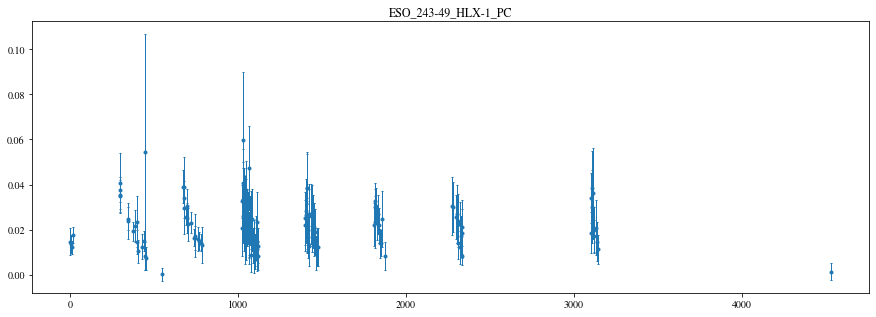

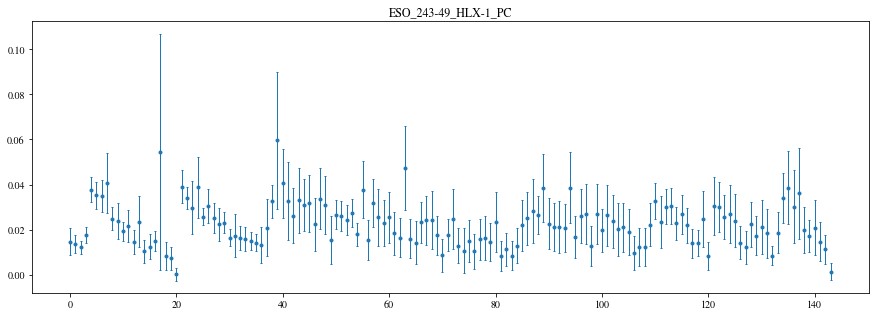

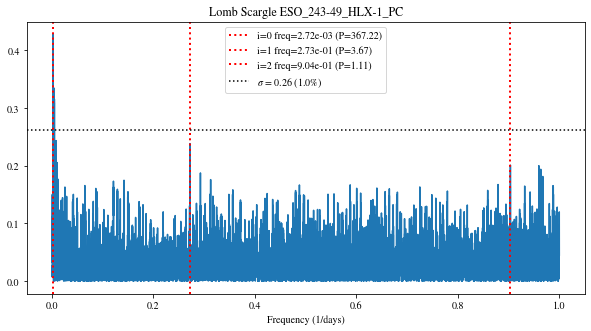

Loading XRT...
simbad_name=ESO_243-49_HLX-1 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/ESO_243-49_HLX-1/USERPROD_45573/lc/hardrat_HARD_PC.csv
df shape=(146, 6) unique_obs=146
XRT FLAG SUMMARY
FLAG_RATE=0 = 2 / 146 (1.37%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00


/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


pow=0.13 freq=4.40e-03 p=227.16 fap=0.05
LS success


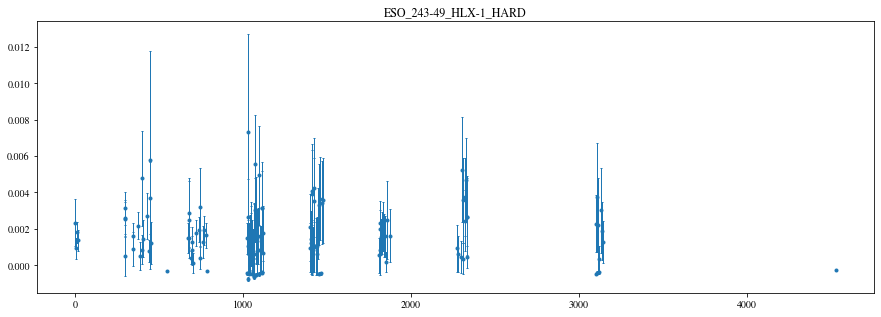

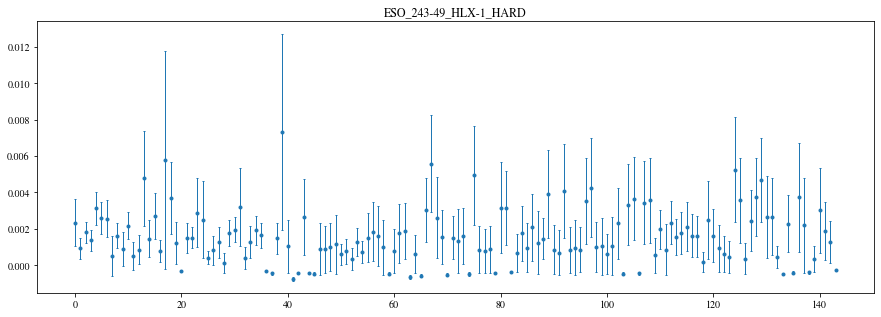

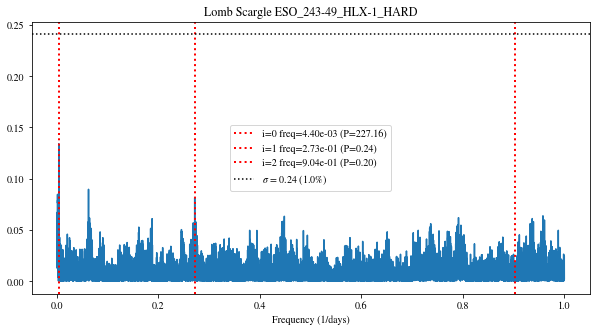

Loading XRT...
simbad_name=ESO_243-49_HLX-1 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/ESO_243-49_HLX-1/USERPROD_45573/lc/hardrat_SOFT_PC.csv
df shape=(146, 6) unique_obs=146
XRT FLAG SUMMARY
FLAG_RATE=0 = 2 / 146 (1.37%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.45 freq=2.72e-03 p=367.22 fap=0.00
pow=0.22 freq=2.73e-01 p=3.67 fap=0.02
pow=0.17 freq=9.60e-01 p=1.04 fap=0.17
LS success


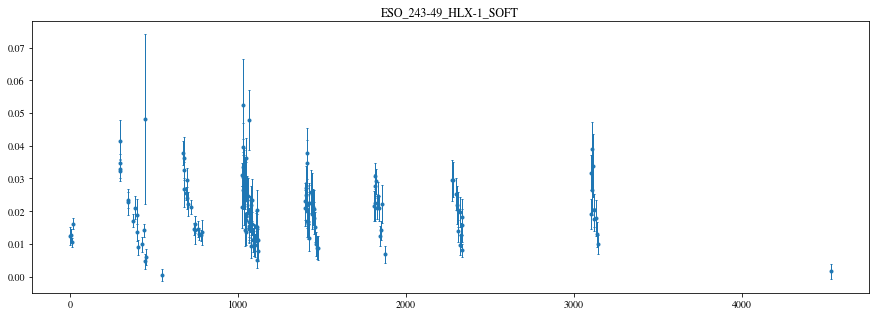

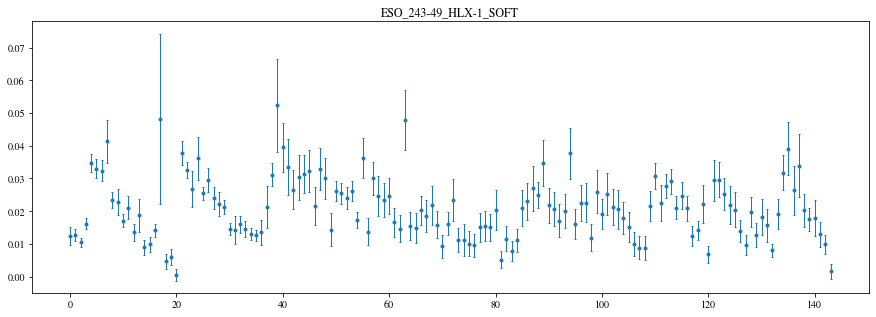

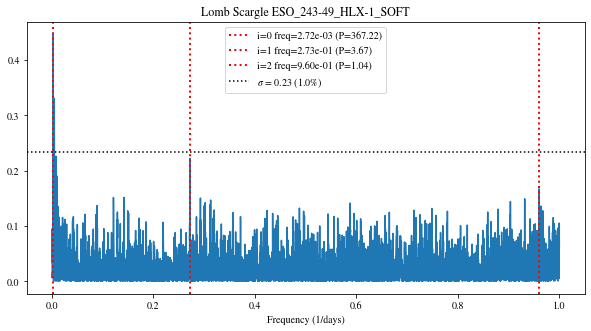

Loading XRT...
simbad_name=NAME_Holmberg_IX_X-1 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_Holmberg_IX_X-1/USERPROD_45574/lc/curve_PC.csv
df shape=(693, 7) unique_obs=693
XRT FLAG SUMMARY
FLAG_RATE=0 = 4 / 693 (0.58%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.32 freq=1.55e-03 p=645.54 fap=0.00
pow=0.04 freq=3.34e-01 p=2.99 fap=0.11
pow=0.04 freq=5.76e-02 p=17.35 fap=0.17
LS success


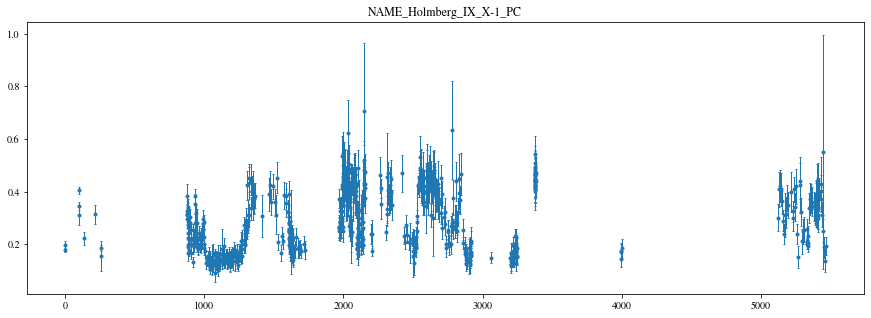

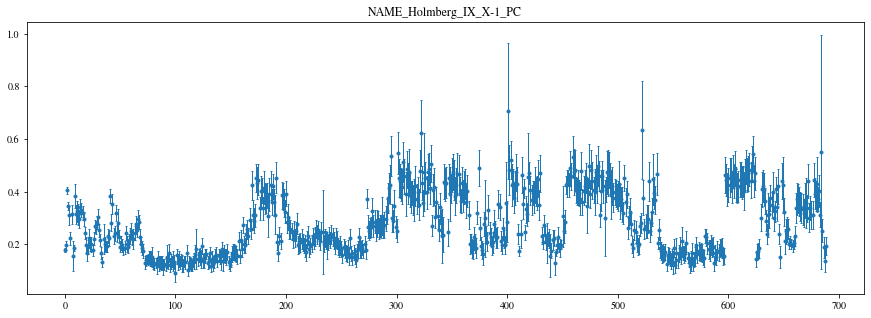

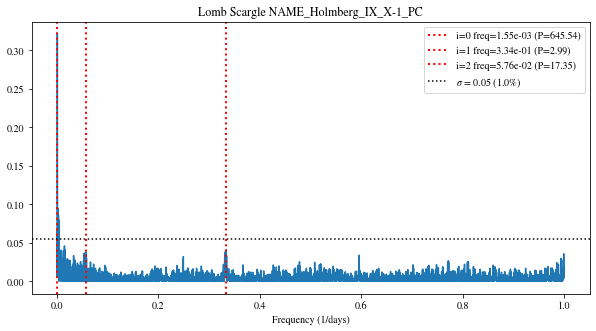

Loading XRT...
simbad_name=NAME_Holmberg_IX_X-1 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_Holmberg_IX_X-1/USERPROD_45574/lc/hardrat_HARD_PC.csv
df shape=(686, 6) unique_obs=686
XRT FLAG SUMMARY
FLAG_RATE=0 = 3 / 686 (0.44%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.28 freq=1.53e-03 p=652.13 fap=0.00
pow=0.04 freq=3.35e-01 p=2.99 fap=0.00
pow=0.03 freq=5.76e-02 p=17.36 fap=0.07
LS success


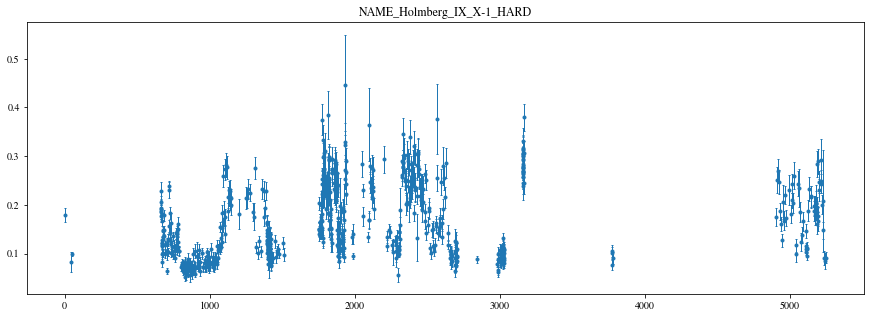

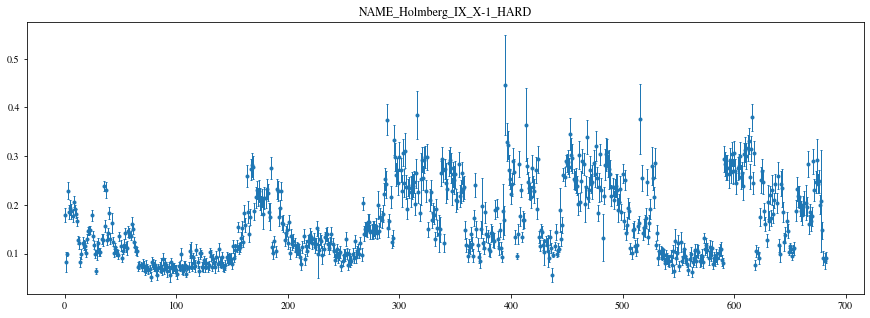

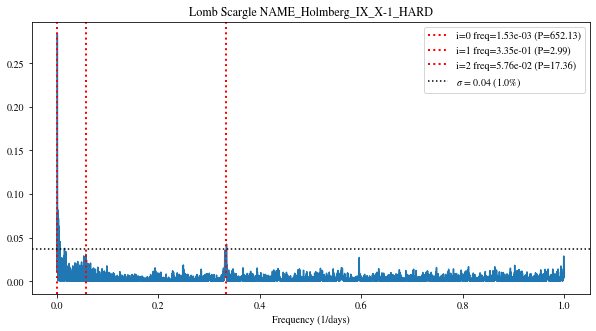

Loading XRT...
simbad_name=NAME_Holmberg_IX_X-1 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_Holmberg_IX_X-1/USERPROD_45574/lc/hardrat_SOFT_PC.csv
df shape=(686, 6) unique_obs=686
XRT FLAG SUMMARY
FLAG_RATE=0 = 3 / 686 (0.44%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.31 freq=1.57e-03 p=636.32 fap=0.00
pow=0.04 freq=3.35e-01 p=2.99 fap=0.00
pow=0.03 freq=5.96e-01 p=1.68 fap=0.13
LS success


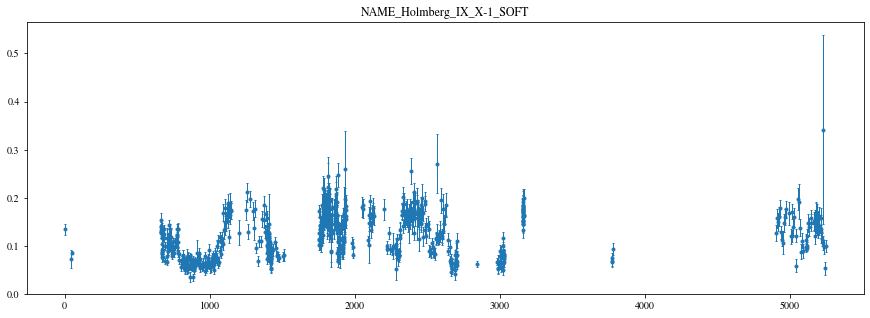

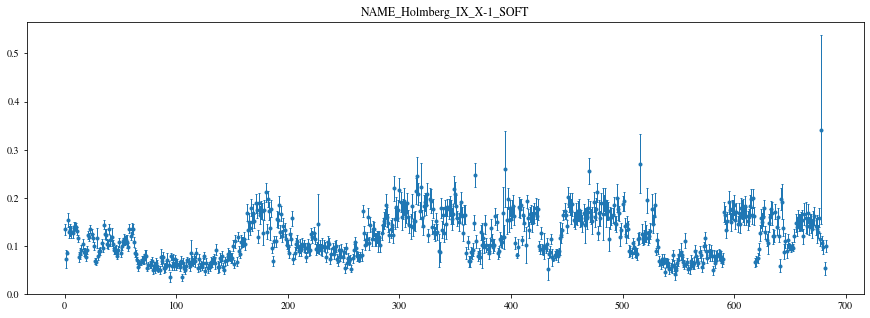

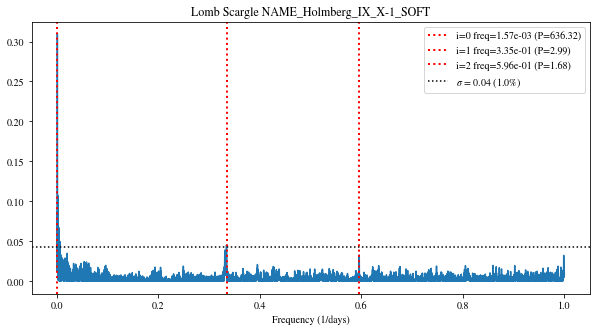

Loading XRT...
simbad_name=Holmberg_II_X-1 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/Holmberg_II_X-1/USERPROD_45575/lc/curve_PC.csv
df shape=(227, 7) unique_obs=227
XRT FLAG SUMMARY
FLAG_RATE=0 = 7 / 227 (3.08%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.54 freq=2.51e-03 p=397.72 fap=0.00
pow=0.30 freq=3.44e-02 p=29.05 fap=0.00
pow=0.24 freq=5.14e-01 p=1.95 fap=0.03
LS success


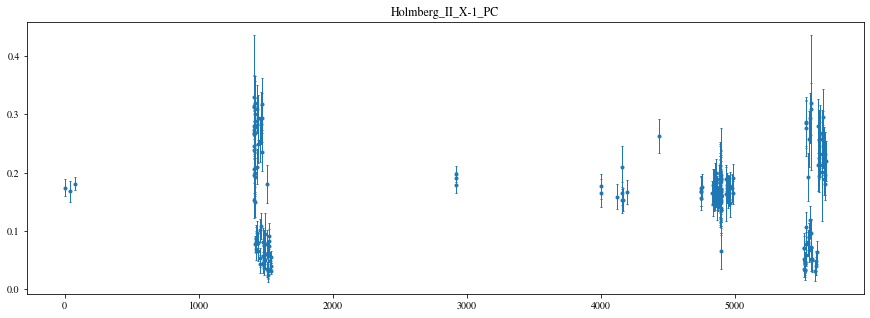

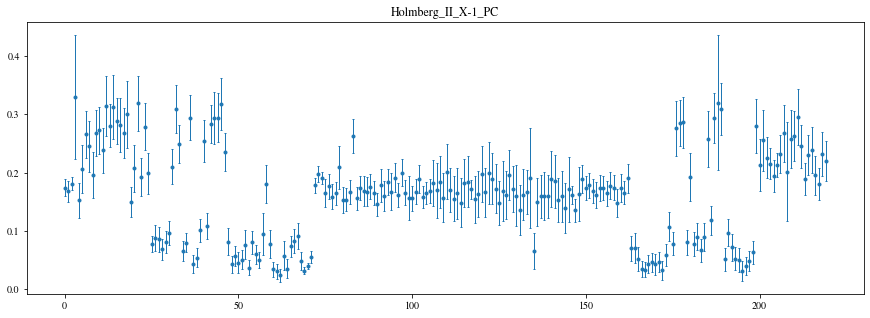

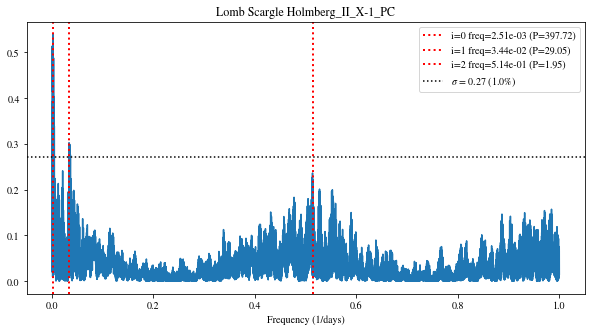

Loading XRT...
simbad_name=Holmberg_II_X-1 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/Holmberg_II_X-1/USERPROD_45575/lc/hardrat_HARD_PC.csv
df shape=(227, 6) unique_obs=227
XRT FLAG SUMMARY
FLAG_RATE=0 = 7 / 227 (3.08%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.68 freq=1.04e-03 p=965.98 fap=0.00
pow=0.39 freq=3.44e-02 p=29.05 fap=0.00
pow=0.30 freq=5.15e-01 p=1.94 fap=0.01
LS success


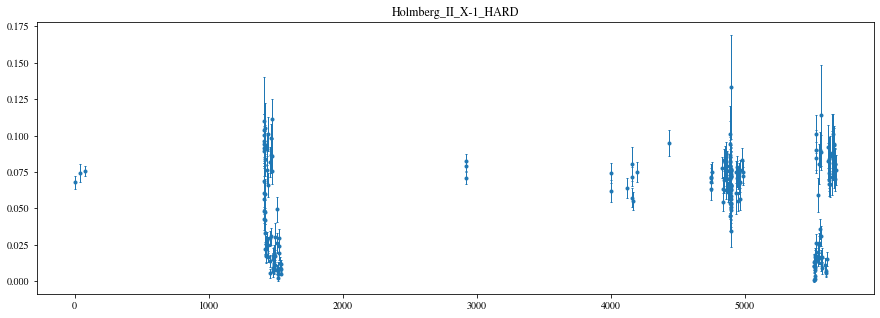

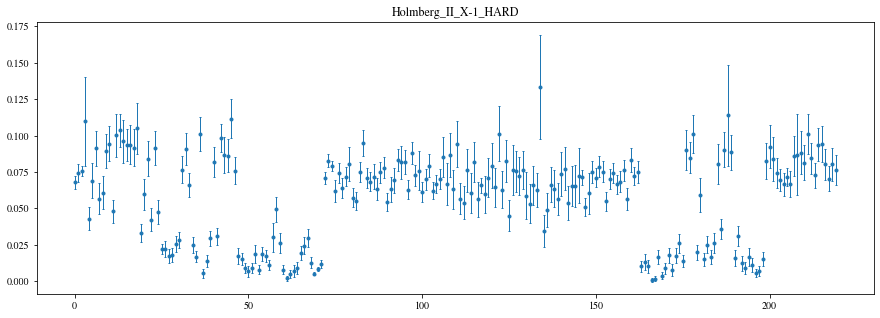

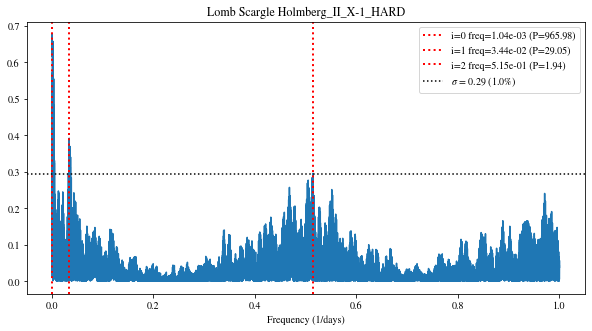

Loading XRT...
simbad_name=Holmberg_II_X-1 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/Holmberg_II_X-1/USERPROD_45575/lc/hardrat_SOFT_PC.csv
df shape=(227, 6) unique_obs=227
XRT FLAG SUMMARY
FLAG_RATE=0 = 7 / 227 (3.08%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.41 freq=2.51e-03 p=397.72 fap=0.00
pow=0.25 freq=3.59e-02 p=27.86 fap=0.01
pow=0.20 freq=5.14e-01 p=1.95 fap=0.04
LS success


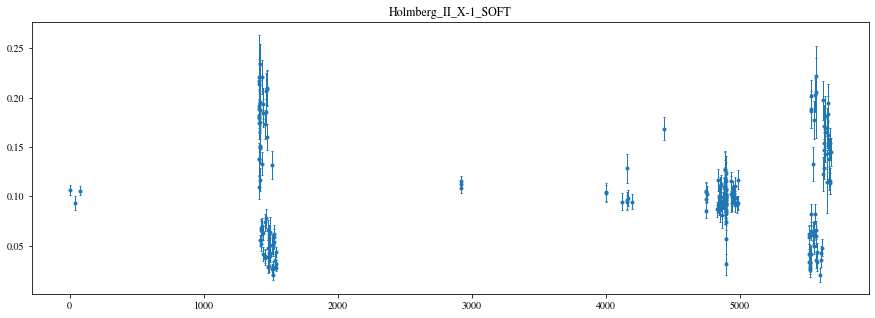

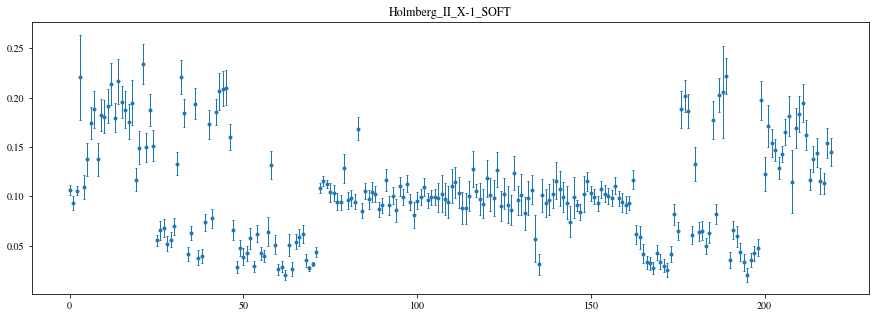

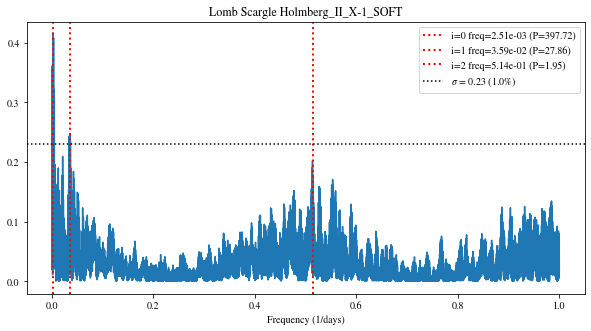

Loading XRT...
simbad_name=M31_ULX-1 curve=PC pandas=False
Could not load M31_ULX-1 PC
Loading XRT...
simbad_name=M31_ULX-1 curve=HARD pandas=False
Could not load M31_ULX-1 HARD
Loading XRT...
simbad_name=M31_ULX-1 curve=SOFT pandas=False
Could not load M31_ULX-1 SOFT
Loading XRT...
simbad_name=[LM2005]_NGC_598_ULX1 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_598_ULX1/USERPROD_45577/lc/curve_PC.csv
df shape=(27, 7) unique_obs=27
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 27 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00


/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


pow=0.73 freq=1.25e-01 p=7.99 fap=0.01
pow=0.65 freq=4.47e-01 p=2.23 fap=0.04
pow=0.64 freq=4.89e-01 p=2.05 fap=0.05
LS success


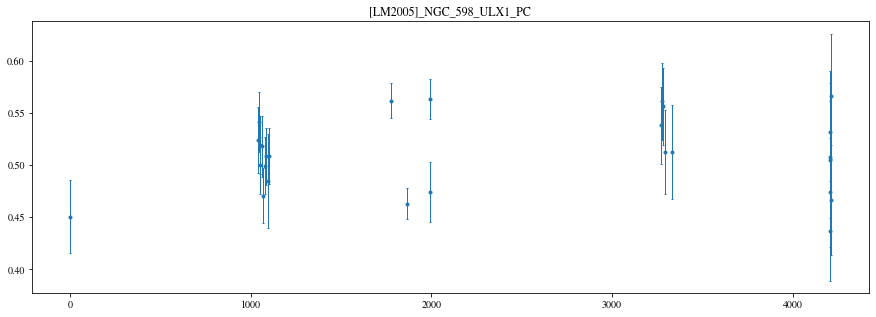

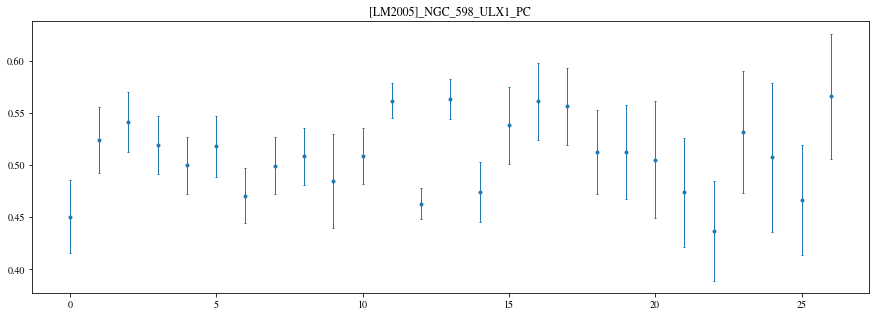

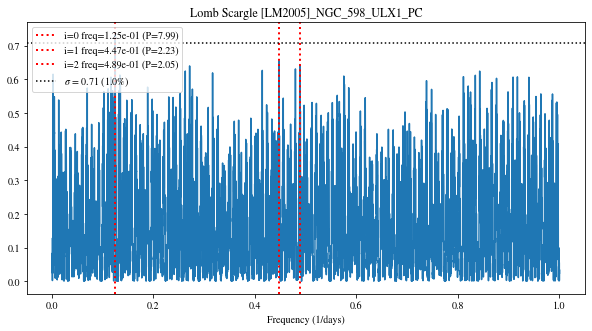

Loading XRT...
simbad_name=[LM2005]_NGC_598_ULX1 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_598_ULX1/USERPROD_45577/lc/hardrat_HARD_PC.csv
df shape=(27, 6) unique_obs=27
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 27 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.74 freq=5.76e-01 p=1.74 fap=0.00
pow=0.71 freq=1.25e-01 p=7.99 fap=0.01
pow=0.65 freq=8.11e-01 p=1.23 fap=0.04
LS success


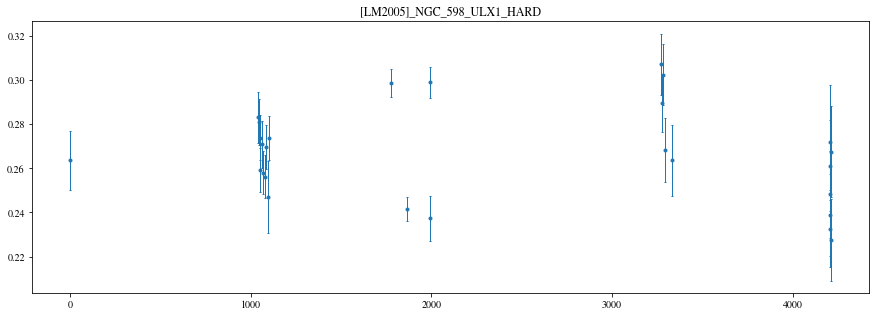

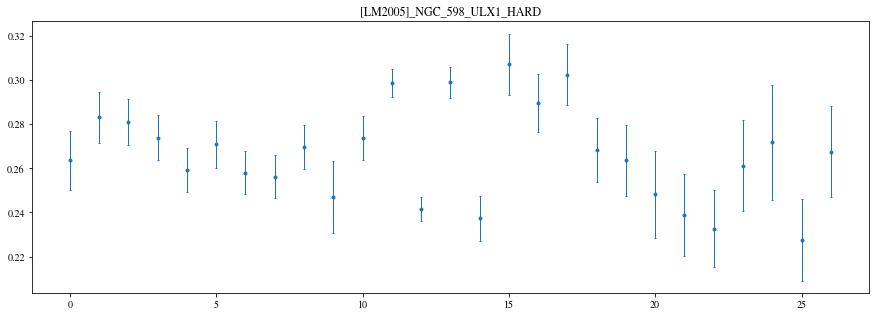

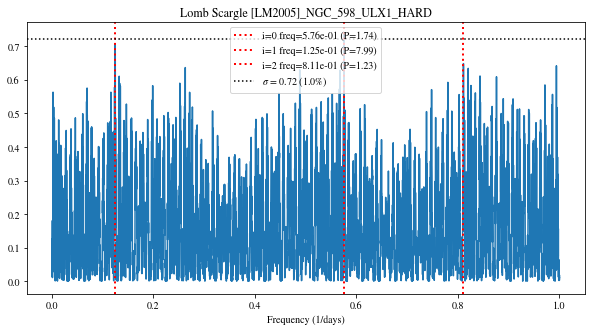

Loading XRT...
simbad_name=[LM2005]_NGC_598_ULX1 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_598_ULX1/USERPROD_45577/lc/hardrat_SOFT_PC.csv
df shape=(27, 6) unique_obs=27
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 27 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.60 freq=8.43e-01 p=1.19 fap=0.05
pow=0.60 freq=3.68e-01 p=2.72 fap=0.04
pow=0.57 freq=9.40e-01 p=1.06 fap=0.07
LS success


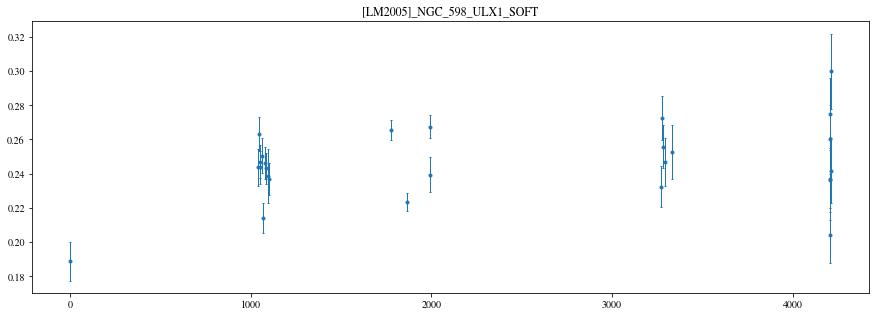

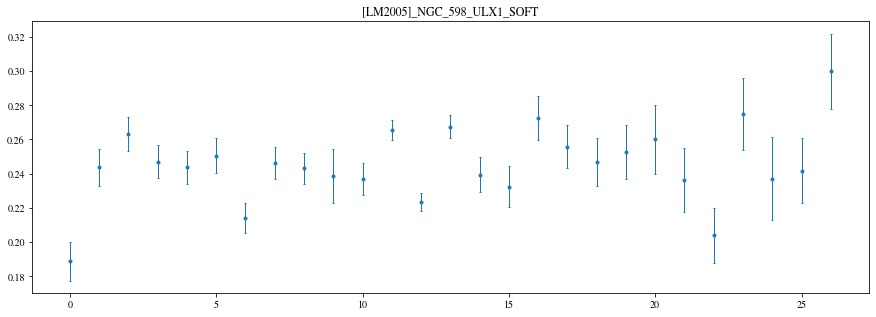

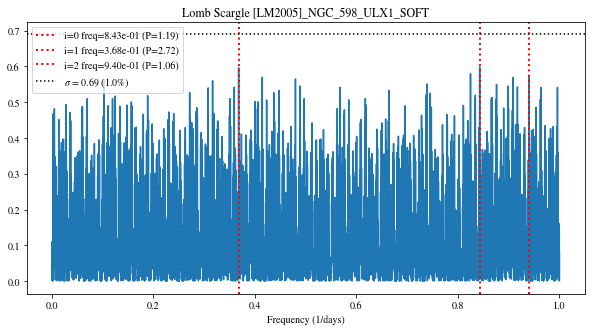

Loading XRT...
simbad_name=RX_J133001+47137 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/RX_J133001+47137/USERPROD_45578/lc/curve_PC.csv
df shape=(168, 7) unique_obs=168
XRT FLAG SUMMARY
FLAG_RATE=0 = 8 / 168 (4.76%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00


/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


pow=0.32 freq=2.27e-02 p=44.07 fap=0.00
pow=0.24 freq=7.96e-01 p=1.26 fap=0.07
pow=0.23 freq=1.00e+00 p=1.00 fap=0.11
LS success


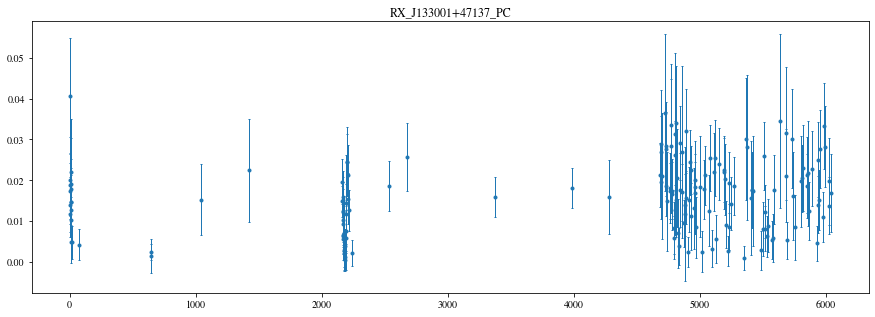

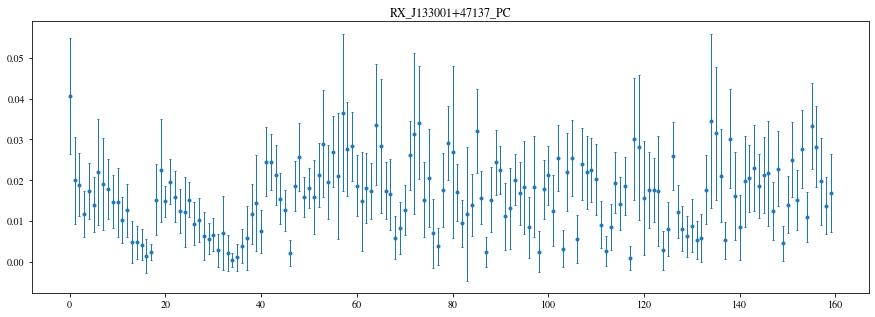

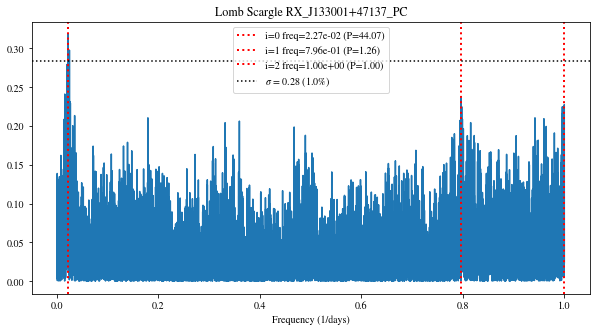

Loading XRT...
simbad_name=RX_J133001+47137 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/RX_J133001+47137/USERPROD_45578/lc/hardrat_HARD_PC.csv
df shape=(108, 6) unique_obs=108
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 108 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
No peaks found
LS failed


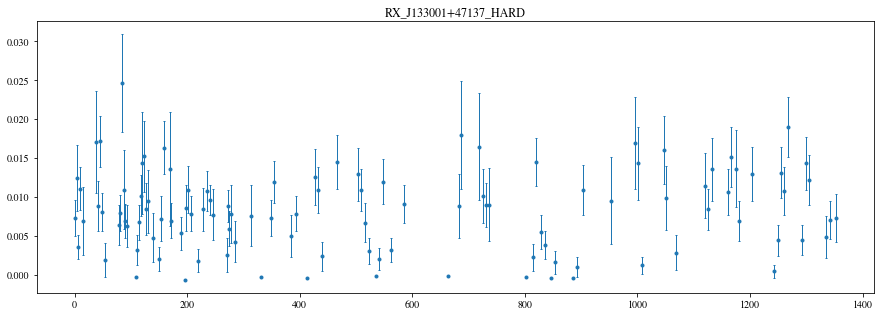

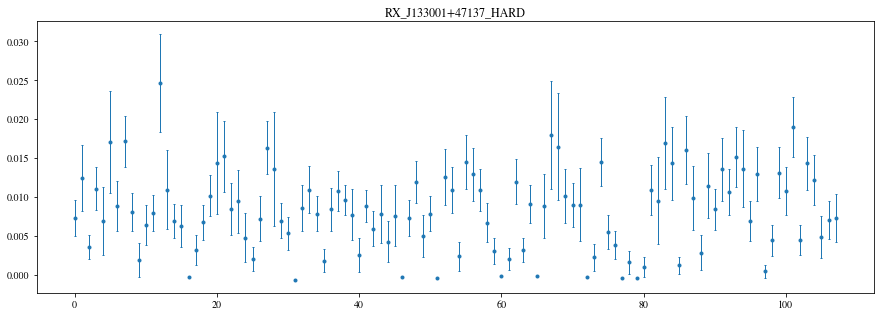

Loading XRT...
simbad_name=RX_J133001+47137 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/RX_J133001+47137/USERPROD_45578/lc/hardrat_SOFT_PC.csv
df shape=(108, 6) unique_obs=108
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 108 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.68 freq=2.61e-02 p=38.25 fap=0.22
pow=0.66 freq=3.33e-01 p=3.00 fap=0.33
pow=0.63 freq=3.60e-01 p=2.78 fap=0.46
LS success


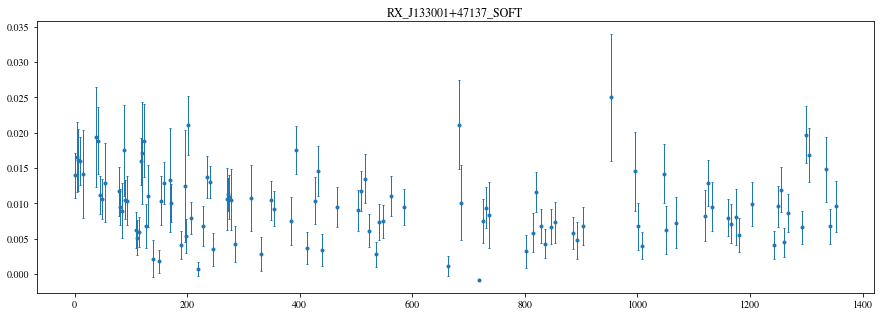

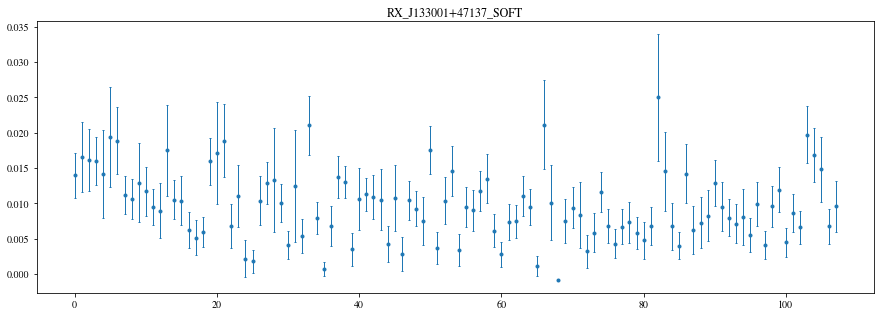

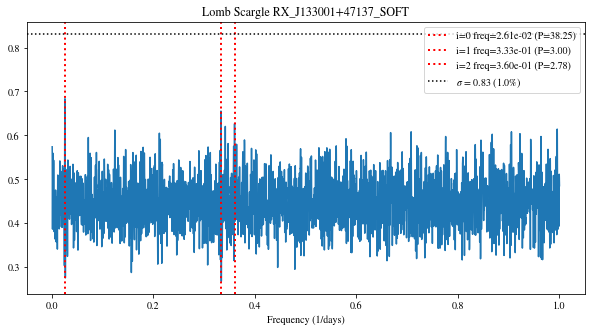

Loading XRT...
simbad_name=[LM2005]_NGC_3031_ULX1 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_3031_ULX1/USERPROD_45588/lc/curve_PC.csv
df shape=(611, 7) unique_obs=611
XRT FLAG SUMMARY
FLAG_RATE=0 = 3 / 611 (0.49%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.18 freq=1.48e-03 p=677.86 fap=0.00
pow=0.06 freq=4.72e-02 p=21.19 fap=0.03
pow=0.05 freq=9.86e-01 p=1.01 fap=0.20
LS success


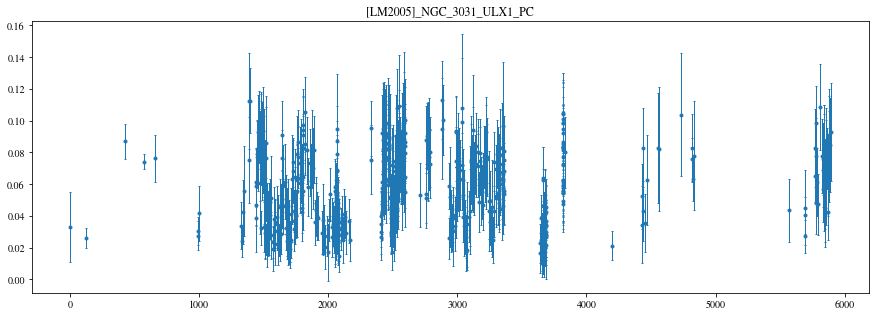

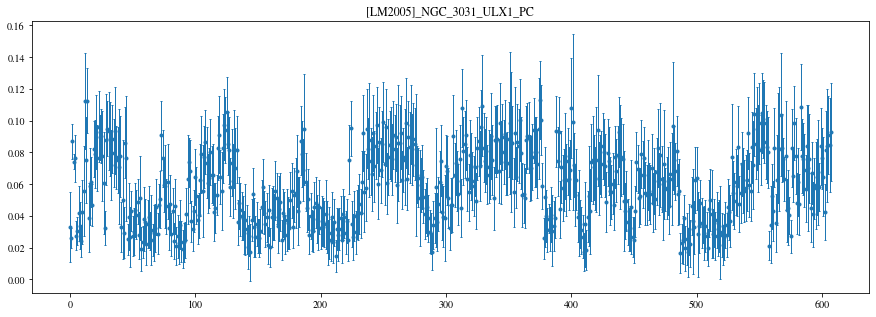

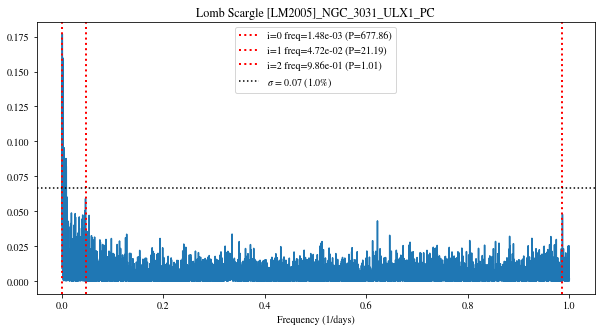

Loading XRT...
simbad_name=[LM2005]_NGC_3031_ULX1 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_3031_ULX1/USERPROD_45588/lc/hardrat_HARD_PC.csv
df shape=(607, 6) unique_obs=607
XRT FLAG SUMMARY
FLAG_RATE=0 = 3 / 607 (0.49%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.17 freq=1.99e-03 p=501.68 fap=0.00
pow=0.04 freq=4.72e-02 p=21.17 fap=0.17
pow=0.03 freq=4.16e-01 p=2.40 fap=0.81
LS success


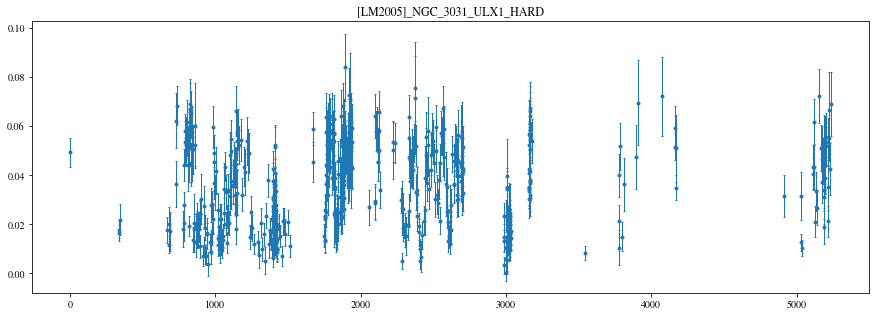

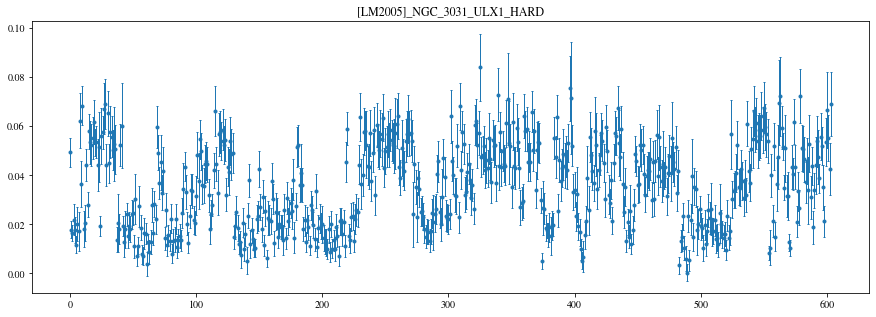

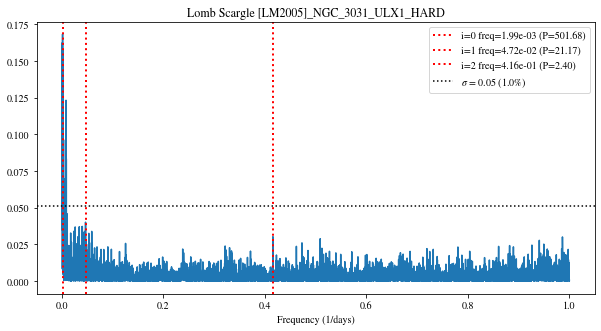

Loading XRT...
simbad_name=[LM2005]_NGC_3031_ULX1 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_3031_ULX1/USERPROD_45588/lc/hardrat_SOFT_PC.csv
df shape=(607, 6) unique_obs=607
XRT FLAG SUMMARY
FLAG_RATE=0 = 3 / 607 (0.49%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.12 freq=3.02e-03 p=330.60 fap=0.00
pow=0.05 freq=3.94e-02 p=25.38 fap=0.10
pow=0.04 freq=6.22e-01 p=1.61 fap=0.22
LS success


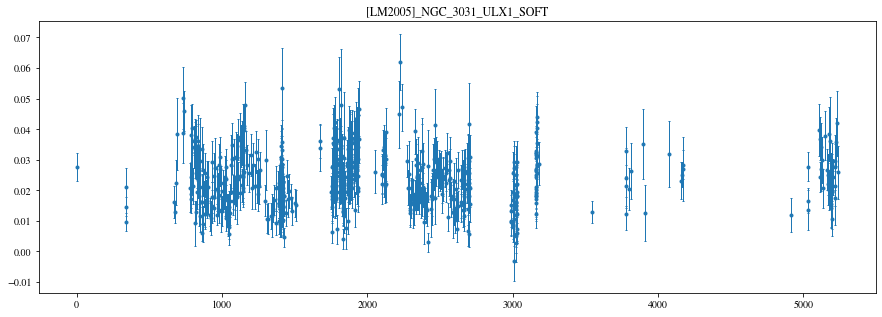

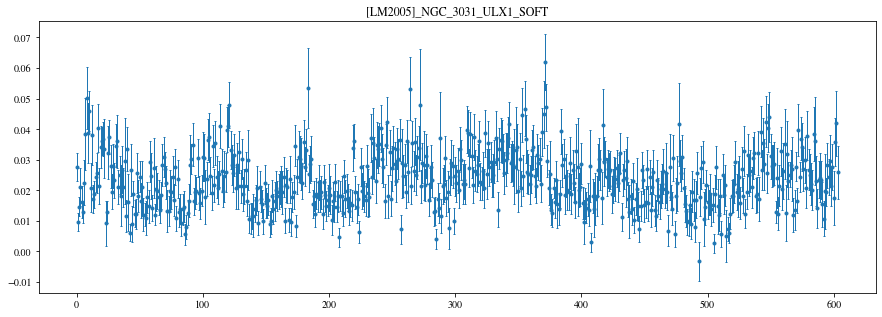

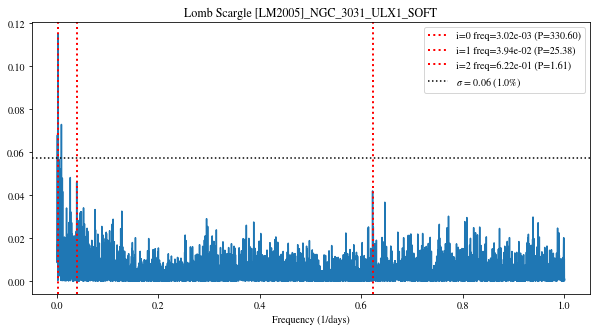

Loading XRT...
simbad_name=M82_X-2 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/M82_X-2/USERPROD_45600/lc/curve_PC.csv
df shape=(423, 7) unique_obs=423
XRT FLAG SUMMARY
FLAG_RATE=0 = 8 / 423 (1.89%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.24 freq=9.86e-01 p=1.01 fap=0.44
LS success


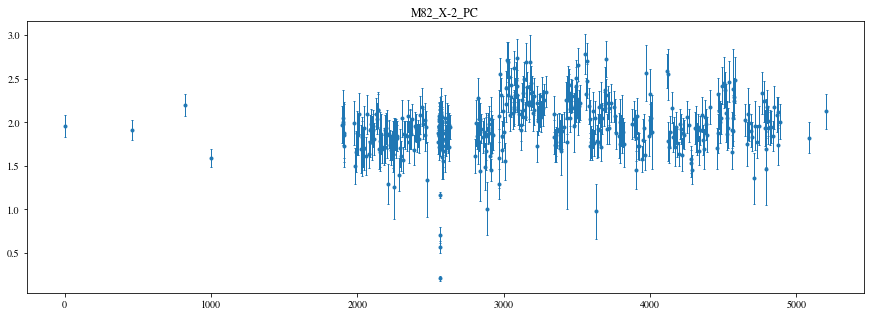

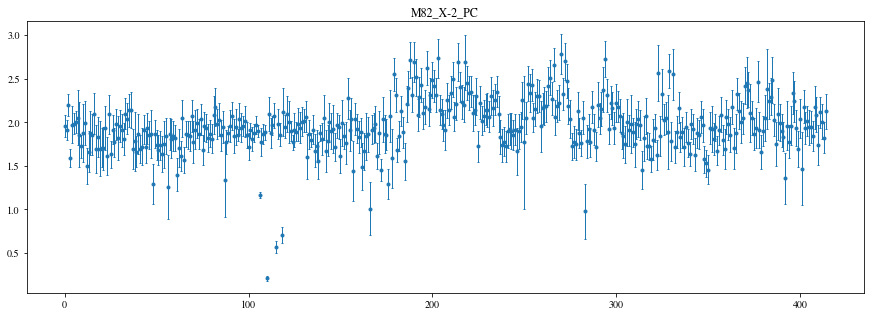

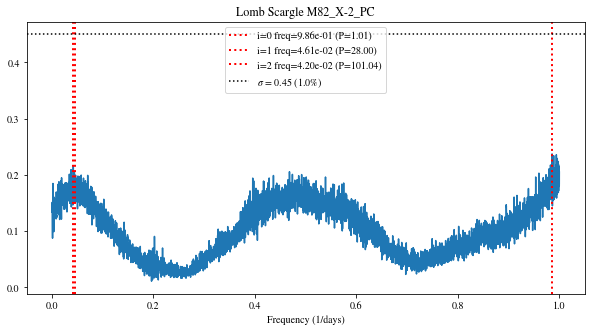

Loading XRT...
simbad_name=M82_X-2 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/M82_X-2/USERPROD_45600/lc/hardrat_HARD_PC.csv
df shape=(423, 6) unique_obs=423
XRT FLAG SUMMARY
FLAG_RATE=0 = 8 / 423 (1.89%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.19 freq=9.96e-01 p=1.00 fap=0.42
pow=0.17 freq=2.77e-03 p=361.11 fap=0.49
pow=0.17 freq=4.49e-02 p=22.28 fap=0.53
LS success


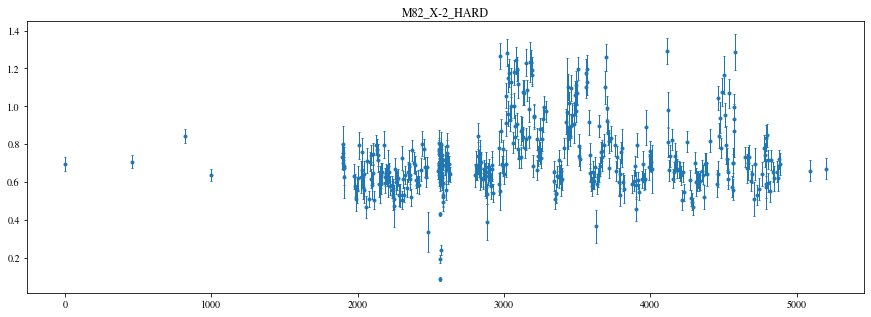

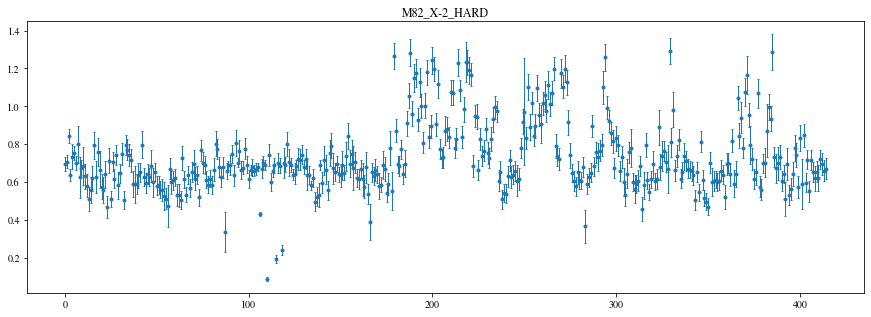

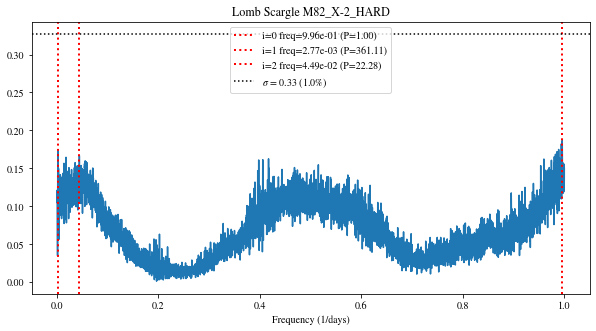

Loading XRT...
simbad_name=M82_X-2 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/M82_X-2/USERPROD_45600/lc/hardrat_SOFT_PC.csv
df shape=(423, 6) unique_obs=423
XRT FLAG SUMMARY
FLAG_RATE=0 = 8 / 423 (1.89%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.25 freq=9.86e-01 p=1.01 fap=0.42
pow=0.22 freq=3.83e-02 p=26.10 fap=0.55
pow=0.22 freq=4.87e-01 p=2.05 fap=0.56
LS success


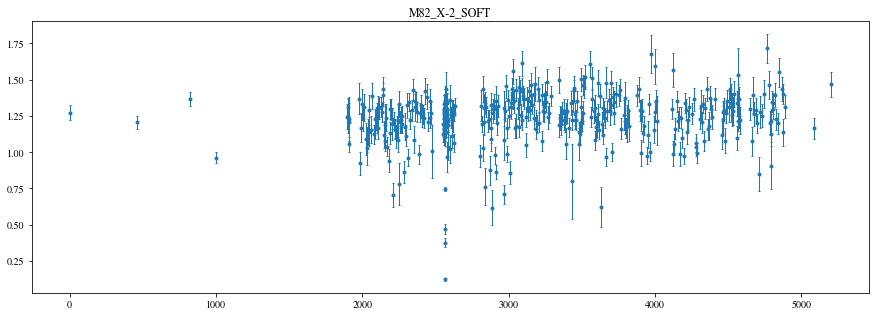

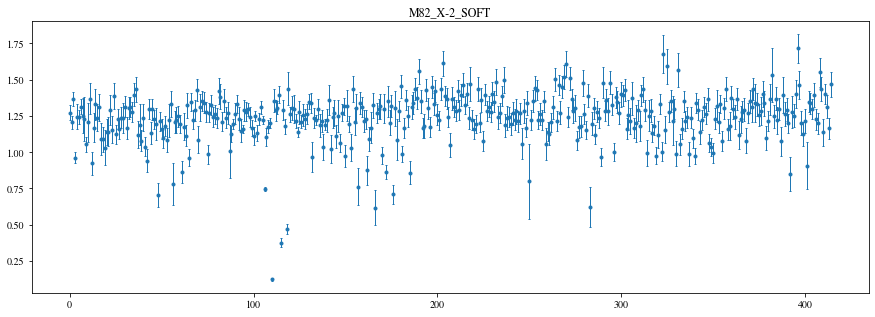

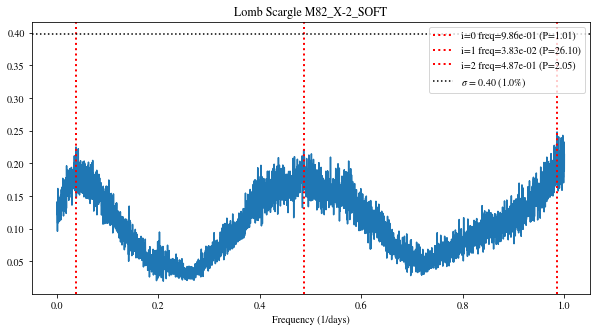

Loading XRT...
simbad_name=[LM2005]_NGC_1042_ULX1 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_1042_ULX1/USERPROD_45607/lc/curve_PC.csv
df shape=(8, 7) unique_obs=8
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 8 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00


/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


pow=0.98 freq=7.15e-01 p=1.40 fap=0.01
pow=0.97 freq=5.14e-01 p=1.94 fap=0.03
pow=0.96 freq=1.02e-01 p=9.76 fap=0.05
LS success


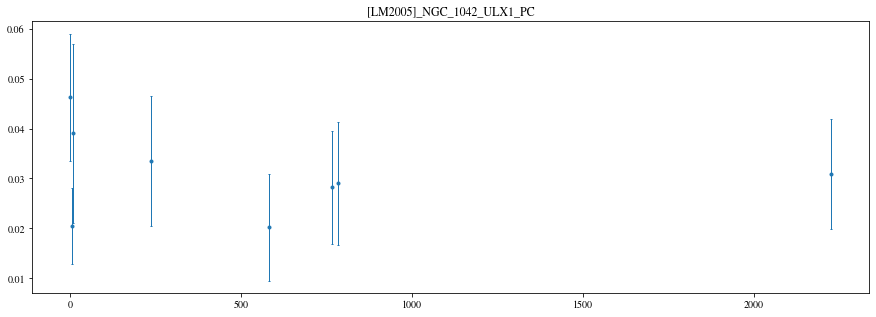

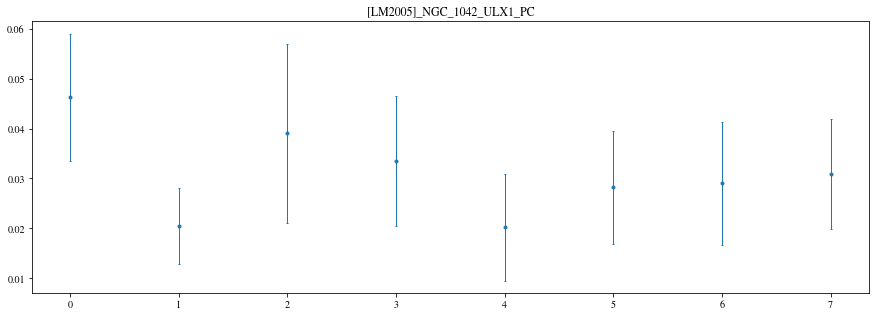

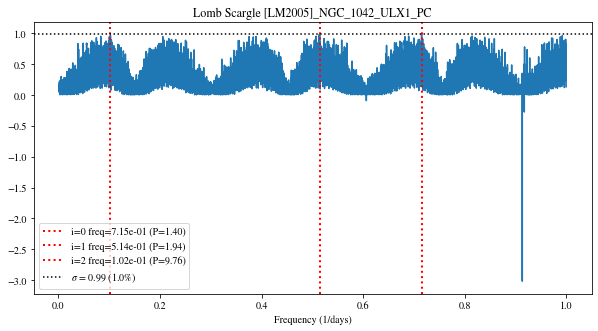

Loading XRT...
simbad_name=[LM2005]_NGC_1042_ULX1 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_1042_ULX1/USERPROD_45607/lc/hardrat_HARD_PC.csv
df shape=(8, 6) unique_obs=8
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 8 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=2.33 freq=9.23e-01 p=1.08 fap=0.00
pow=1.01 freq=9.52e-01 p=1.05 fap=0.00
pow=1.00 freq=8.22e-01 p=1.22 fap=0.00
LS success


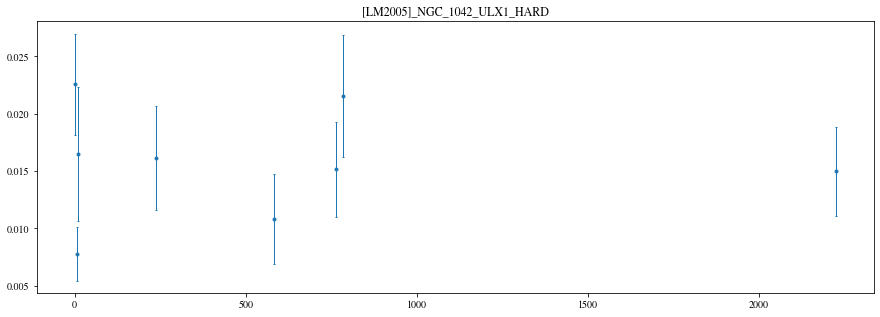

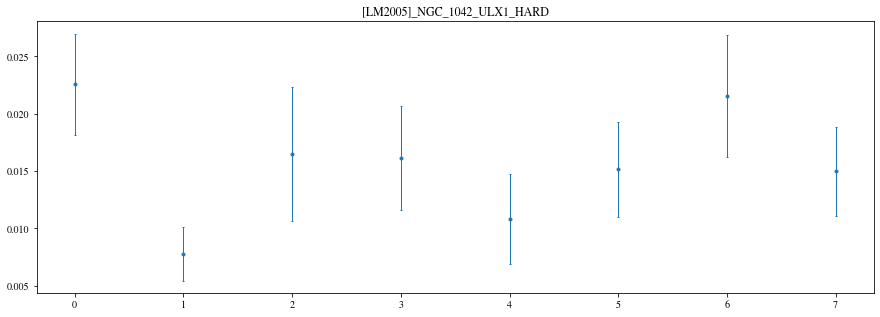

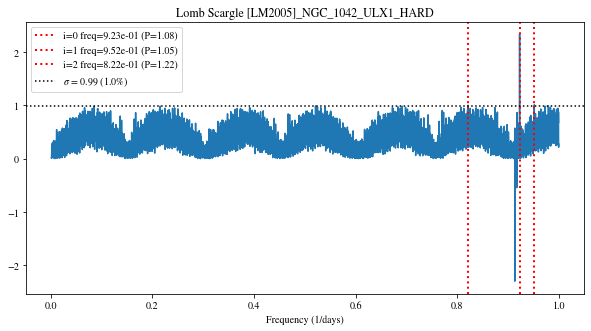

Loading XRT...
simbad_name=[LM2005]_NGC_1042_ULX1 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_1042_ULX1/USERPROD_45607/lc/hardrat_SOFT_PC.csv
df shape=(8, 6) unique_obs=8
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 8 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=1.09 freq=9.57e-01 p=1.04 fap=0.00
pow=1.09 freq=8.58e-01 p=1.16 fap=0.00
pow=1.00 freq=7.06e-01 p=1.42 fap=0.00
LS success


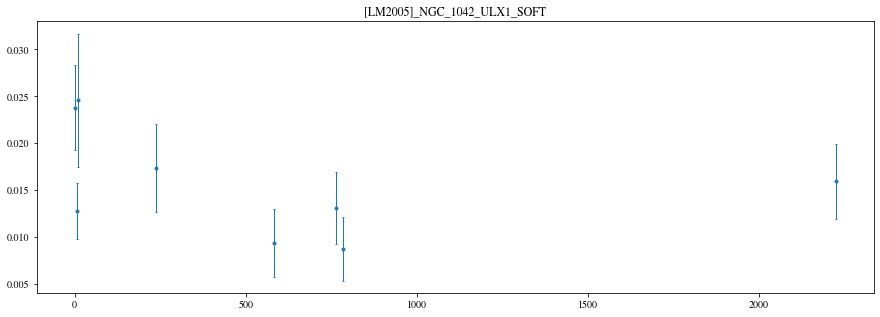

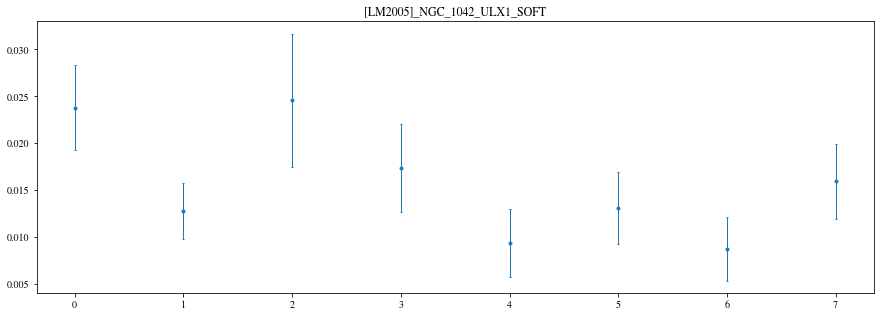

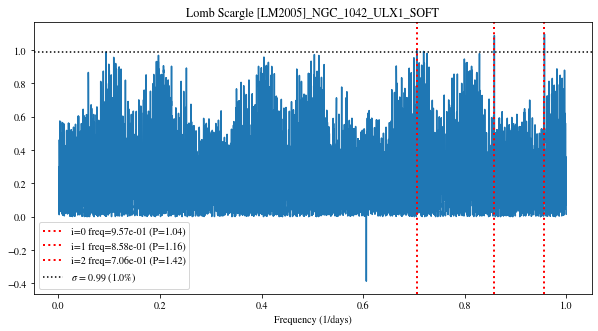

Loading XRT...
simbad_name=NAME_NGC_1313_X-1 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_NGC_1313_X-1/USERPROD_45603/lc/curve_PC.csv
df shape=(498, 7) unique_obs=498
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 498 (0.20%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.06 freq=1.36e-03 p=736.60 fap=0.00
pow=0.02 freq=1.46e-01 p=6.85 fap=0.17
pow=0.02 freq=8.92e-01 p=1.12 fap=0.20
LS success


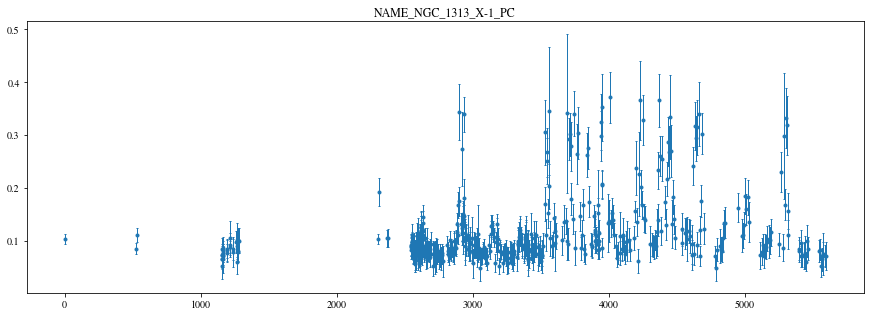

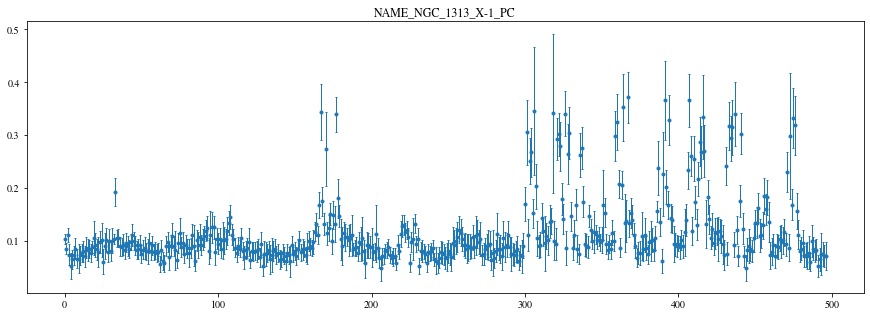

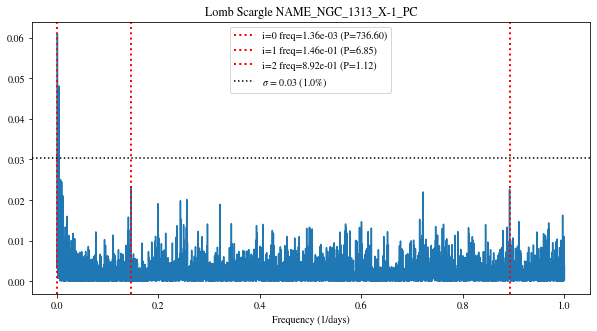

Loading XRT...
simbad_name=NAME_NGC_1313_X-1 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_NGC_1313_X-1/USERPROD_45603/lc/hardrat_HARD_PC.csv
df shape=(498, 6) unique_obs=498
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 498 (0.20%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.05 freq=1.36e-03 p=736.60 fap=0.00
pow=0.02 freq=2.44e-01 p=4.10 fap=0.14
pow=0.02 freq=5.58e-01 p=1.79 fap=0.20
LS success


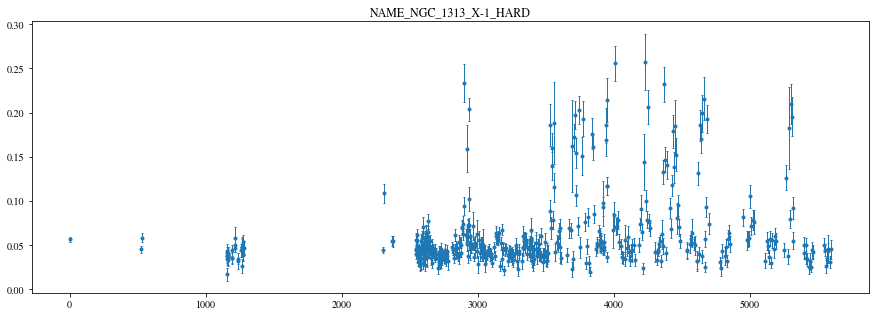

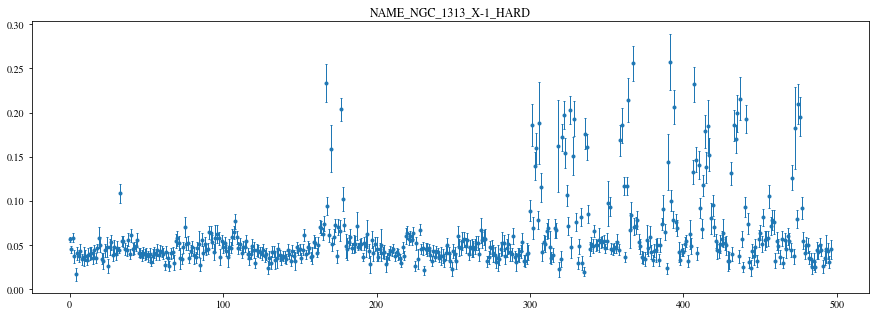

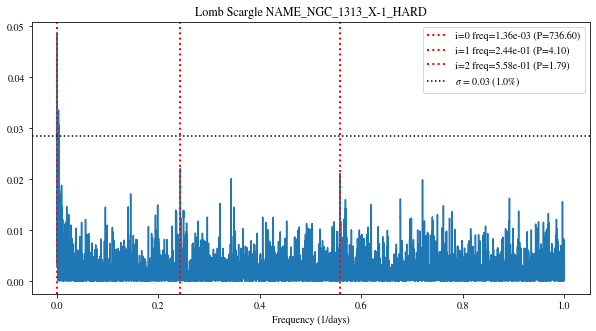

Loading XRT...
simbad_name=NAME_NGC_1313_X-1 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_NGC_1313_X-1/USERPROD_45603/lc/hardrat_SOFT_PC.csv
df shape=(498, 6) unique_obs=498
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 498 (0.20%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.07 freq=4.72e-03 p=211.92 fap=0.00
pow=0.04 freq=7.22e-01 p=1.39 fap=0.04
pow=0.03 freq=5.20e-01 p=1.92 fap=0.36
LS success


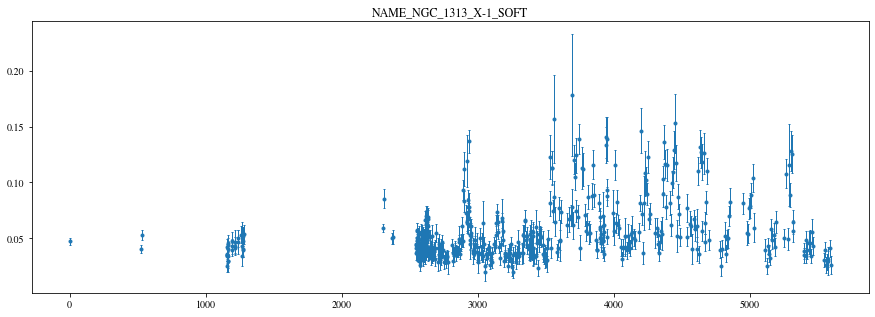

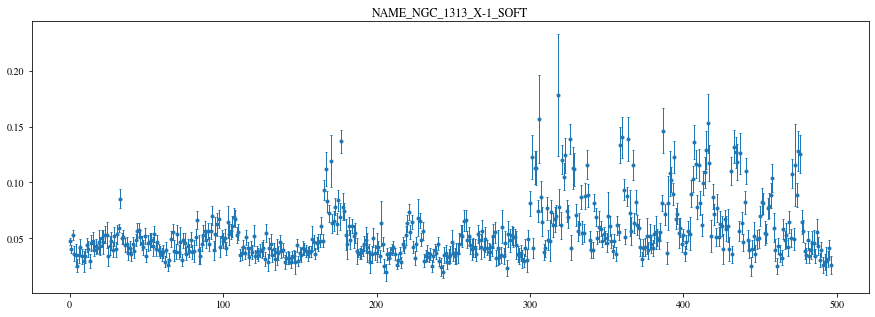

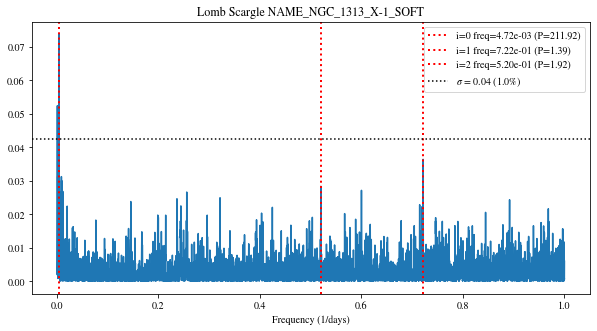

Loading XRT...
simbad_name=NAME_NGC_1313_X-2 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_NGC_1313_X-2/USERPROD_45605/lc/curve_PC.csv
df shape=(452, 7) unique_obs=452
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 452 (0.22%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.12 freq=6.76e-03 p=147.99 fap=0.00
pow=0.04 freq=9.90e-01 p=1.01 fap=0.28
pow=0.04 freq=5.02e-01 p=1.99 fap=0.48
LS success


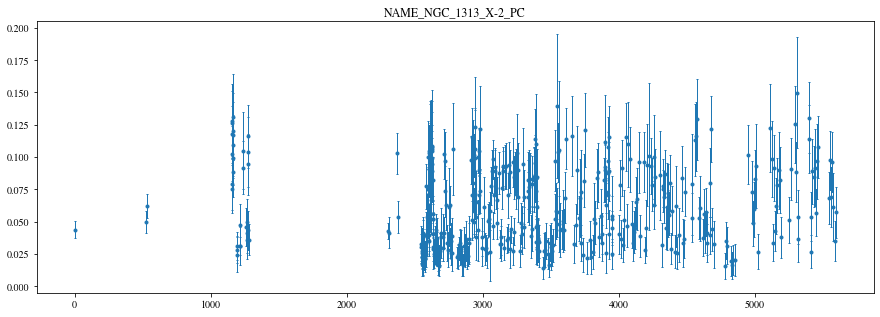

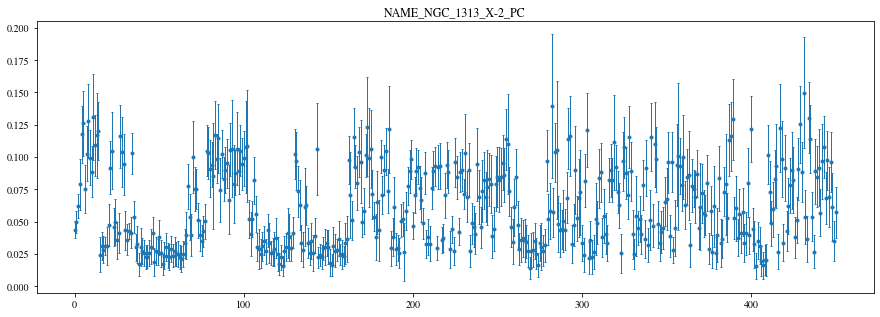

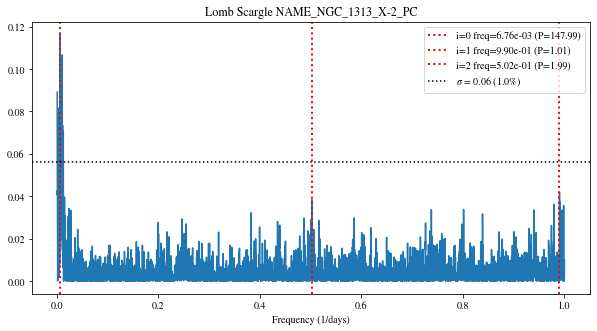

Loading XRT...
simbad_name=NAME_NGC_1313_X-2 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_NGC_1313_X-2/USERPROD_45605/lc/hardrat_HARD_PC.csv
df shape=(452, 6) unique_obs=452
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 452 (0.22%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.10 freq=1.10e-02 p=91.10 fap=0.00
pow=0.05 freq=9.98e-01 p=1.00 fap=0.06
pow=0.04 freq=5.02e-01 p=1.99 fap=0.27
LS success


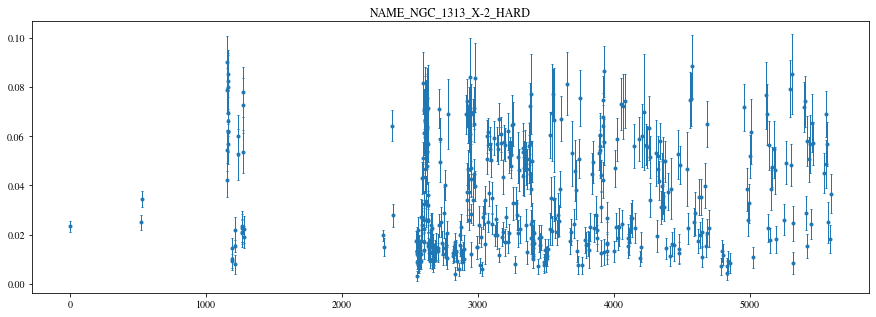

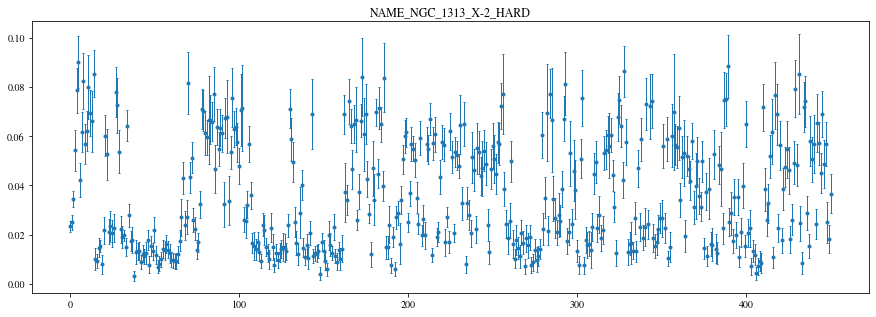

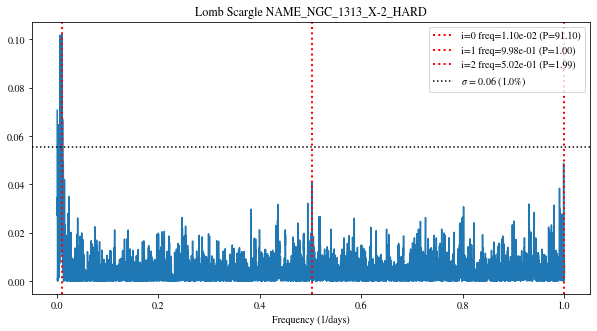

Loading XRT...
simbad_name=NAME_NGC_1313_X-2 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_NGC_1313_X-2/USERPROD_45605/lc/hardrat_SOFT_PC.csv
df shape=(452, 6) unique_obs=452
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 452 (0.22%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.12 freq=6.72e-03 p=148.78 fap=0.00
pow=0.05 freq=4.87e-01 p=2.05 fap=0.10
pow=0.04 freq=9.95e-01 p=1.00 fap=0.47
LS success


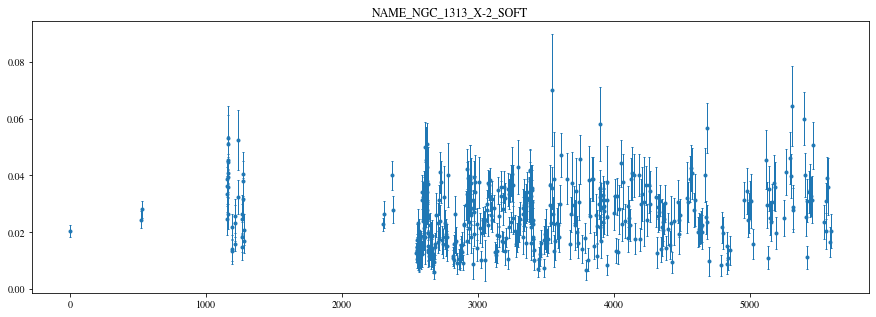

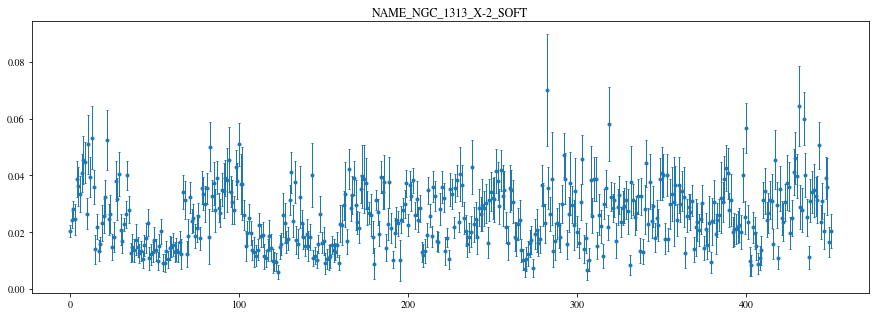

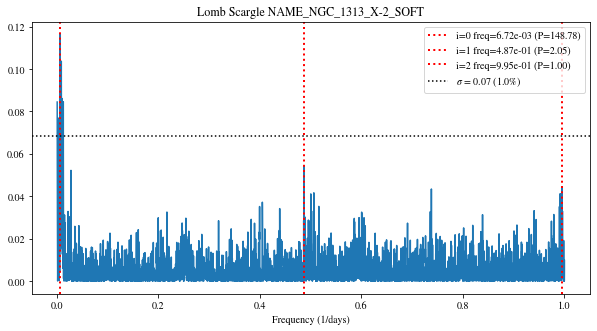

Loading XRT...
simbad_name=[LM2005]_NGC_247_ULX1 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_247_ULX1/USERPROD_45606/lc/curve_PC.csv
df shape=(117, 7) unique_obs=117
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 117 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00


/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


pow=0.15 freq=5.62e-03 p=177.94 fap=0.03
pow=0.12 freq=1.39e-01 p=7.19 fap=0.18
pow=0.10 freq=9.83e-01 p=1.02 fap=0.41
LS success


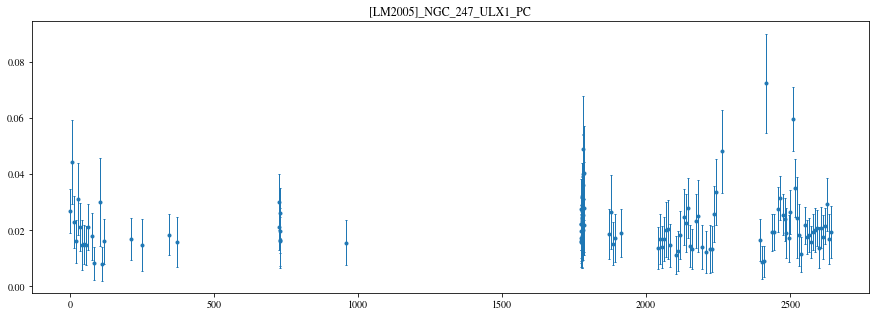

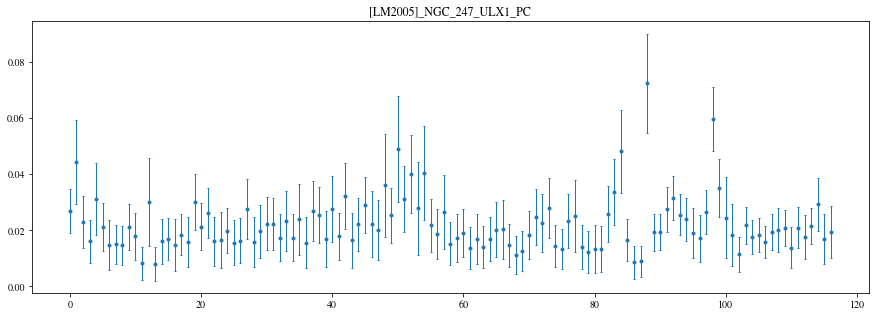

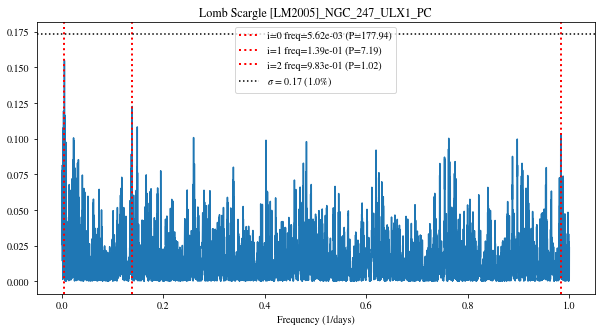

Loading XRT...
simbad_name=[LM2005]_NGC_247_ULX1 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_247_ULX1/USERPROD_45606/lc/hardrat_HARD_PC.csv
df shape=(117, 6) unique_obs=117
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 117 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.07 freq=6.32e-02 p=15.83 fap=0.10
pow=0.05 freq=1.89e-01 p=5.28 fap=0.29
pow=0.05 freq=2.24e-01 p=4.47 fap=0.37
LS success


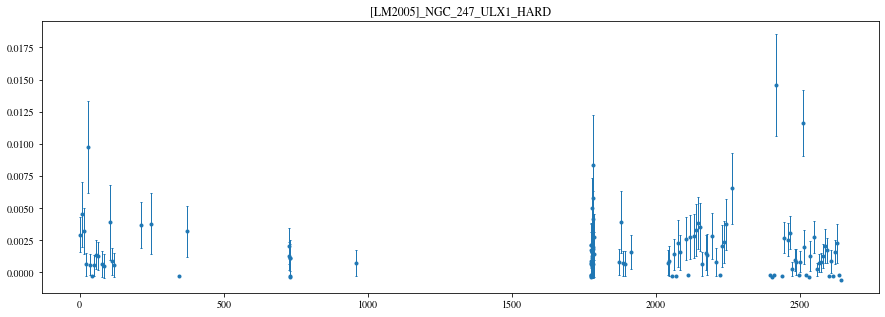

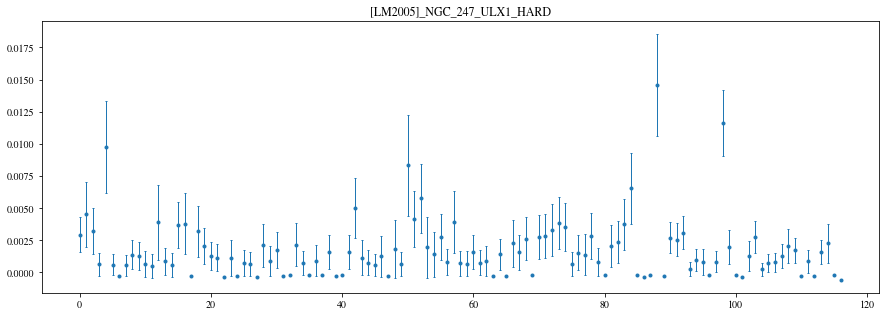

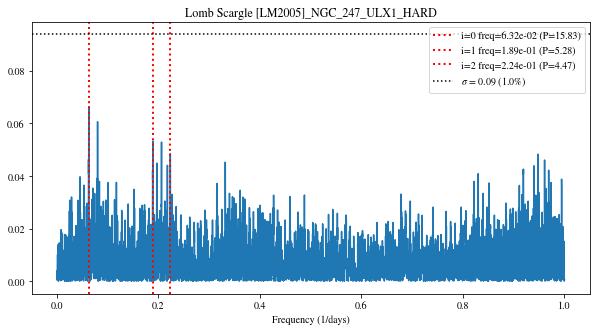

Loading XRT...
simbad_name=[LM2005]_NGC_247_ULX1 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_247_ULX1/USERPROD_45606/lc/hardrat_SOFT_PC.csv
df shape=(117, 6) unique_obs=117
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 117 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.16 freq=5.62e-03 p=177.94 fap=0.03
pow=0.15 freq=1.39e-01 p=7.19 fap=0.09
pow=0.13 freq=9.83e-01 p=1.02 fap=0.24
LS success


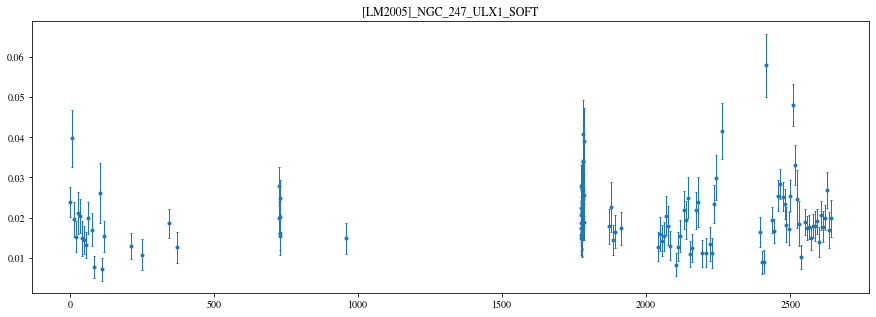

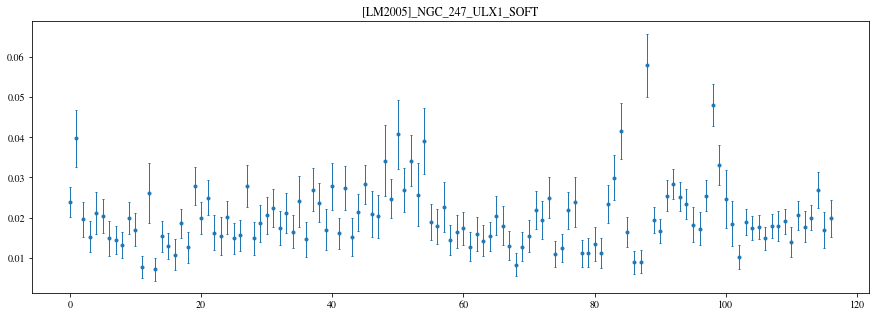

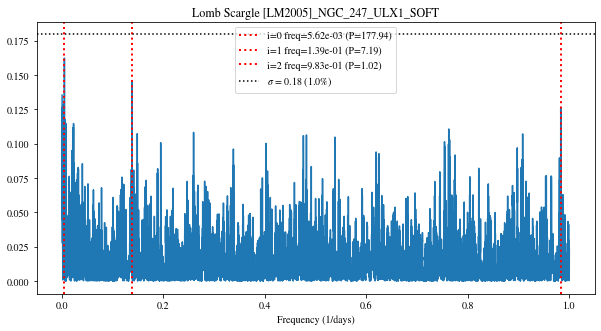

Loading XRT...
simbad_name=[LB2005]_NGC_253_X2 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LB2005]_NGC_253_X2/USERPROD_50700/lc/curve_PC.csv
df shape=(14, 7) unique_obs=14
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 14 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.74 freq=6.09e-01 p=1.64 fap=0.03
pow=0.68 freq=1.77e-02 p=56.41 fap=0.07
pow=0.68 freq=4.20e-01 p=2.38 fap=0.08
LS success


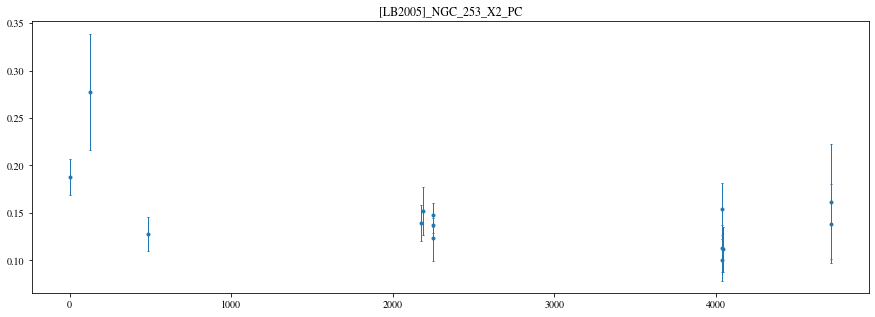

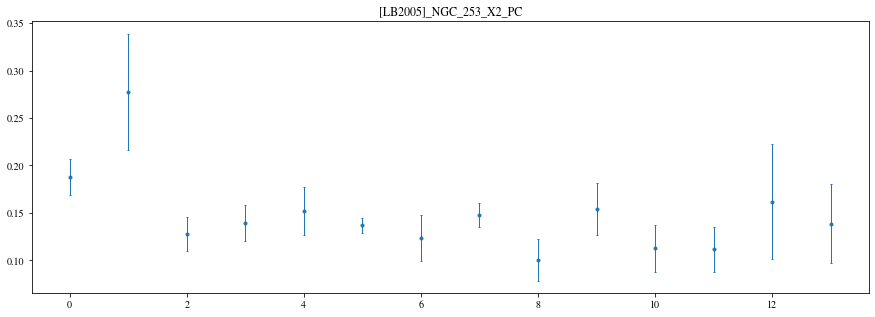

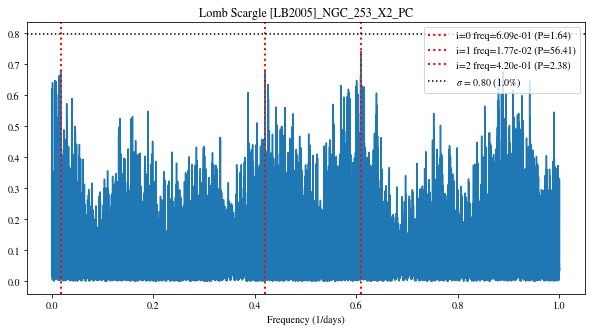

Loading XRT...
simbad_name=[LB2005]_NGC_253_X2 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LB2005]_NGC_253_X2/USERPROD_50700/lc/hardrat_HARD_PC.csv
df shape=(14, 6) unique_obs=14
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 14 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.78 freq=6.12e-01 p=1.63 fap=0.01
pow=0.71 freq=3.87e-01 p=2.59 fap=0.04
pow=0.69 freq=8.89e-01 p=1.12 fap=0.06
LS success


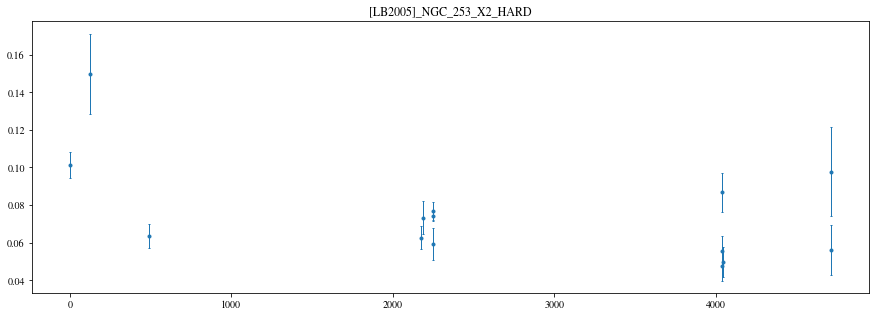

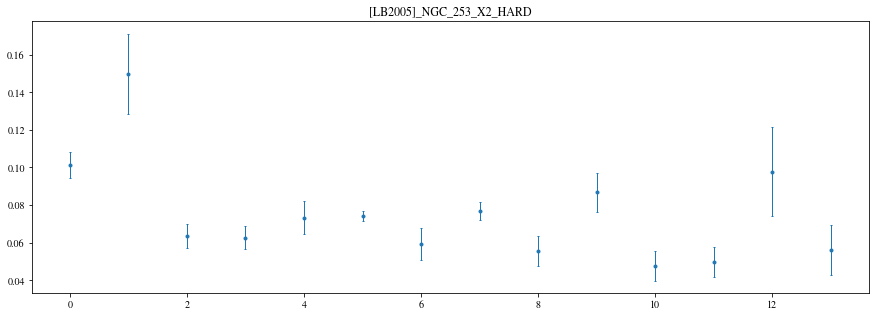

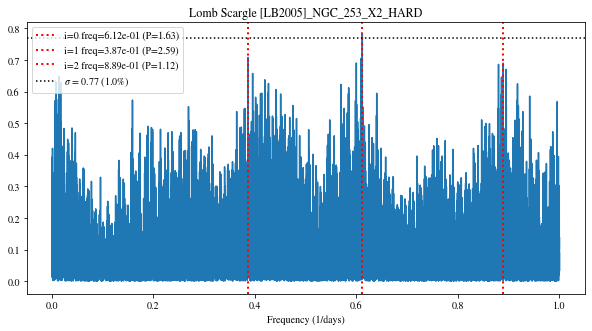

Loading XRT...
simbad_name=[LB2005]_NGC_253_X2 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LB2005]_NGC_253_X2/USERPROD_50700/lc/hardrat_SOFT_PC.csv
df shape=(14, 6) unique_obs=14
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 14 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.72 freq=5.54e-01 p=1.80 fap=0.07
pow=0.70 freq=6.15e-01 p=1.63 fap=0.09
pow=0.69 freq=2.95e-02 p=33.86 fap=0.09
LS success


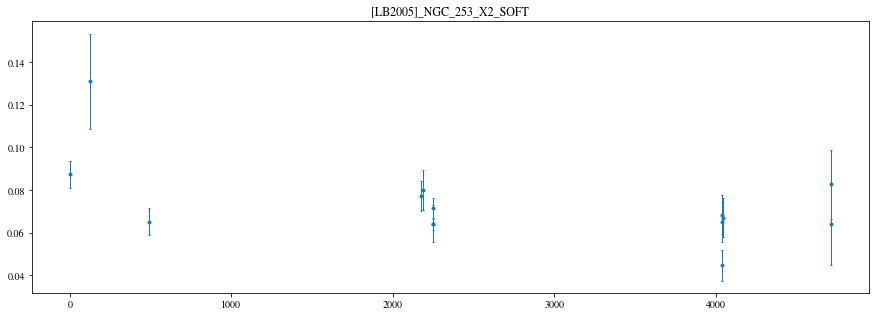

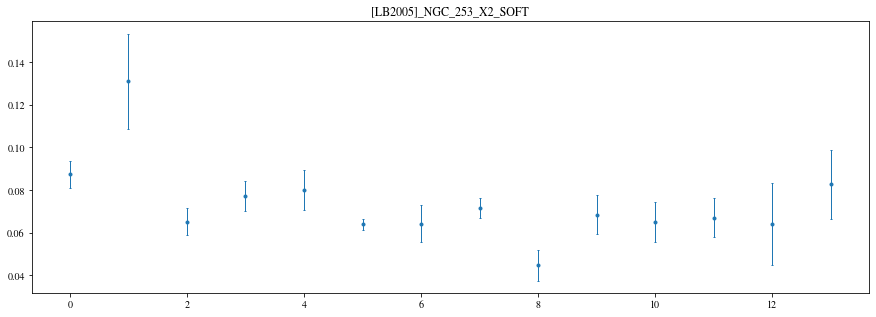

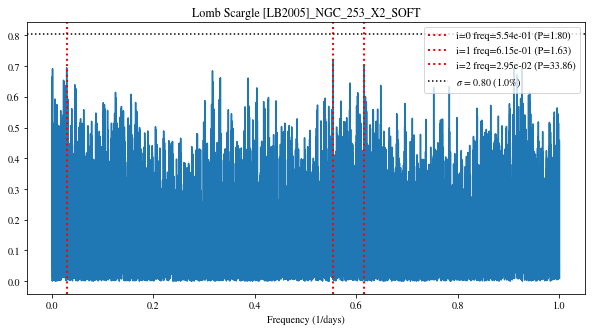

Loading XRT...
simbad_name=[LB2005]_NGC_253_X9 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LB2005]_NGC_253_X9/USERPROD_50701/lc/curve_PC.csv
df shape=(10, 7) unique_obs=10
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 10 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00


/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


pow=0.93 freq=7.76e-01 p=1.29 fap=0.00
pow=0.90 freq=8.18e-01 p=1.22 fap=0.01
pow=0.89 freq=6.46e-01 p=1.55 fap=0.01
LS success


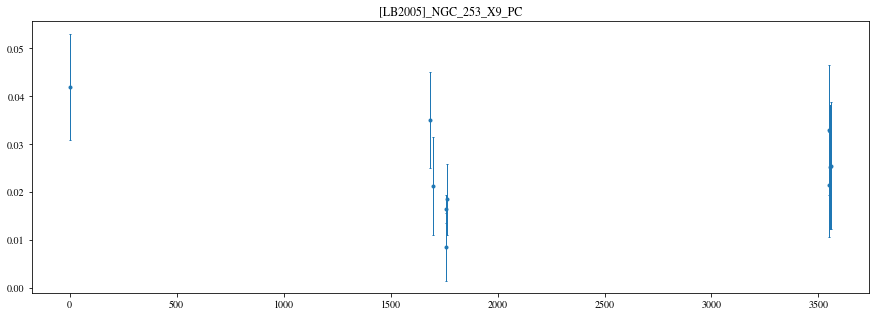

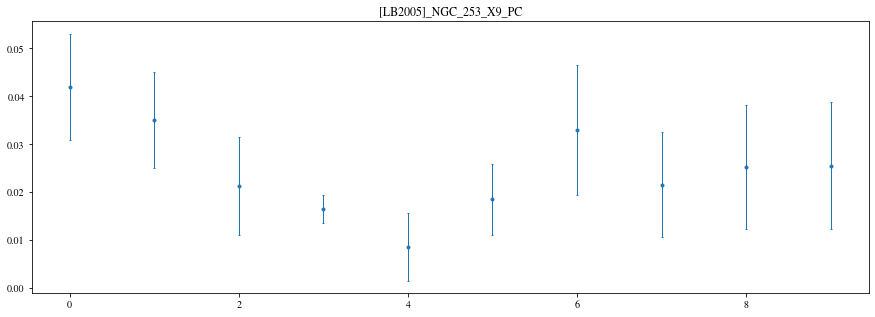

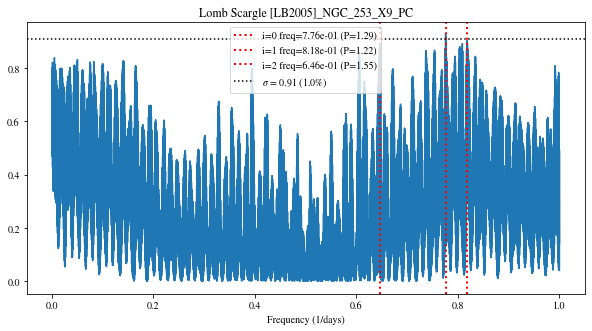

Loading XRT...
simbad_name=[LB2005]_NGC_253_X9 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LB2005]_NGC_253_X9/USERPROD_50701/lc/hardrat_HARD_PC.csv
df shape=(10, 6) unique_obs=10
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 10 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.90 freq=8.04e-01 p=1.24 fap=0.01
pow=0.89 freq=1.43e-01 p=6.97 fap=0.01
pow=0.84 freq=8.36e-01 p=1.20 fap=0.02
LS success


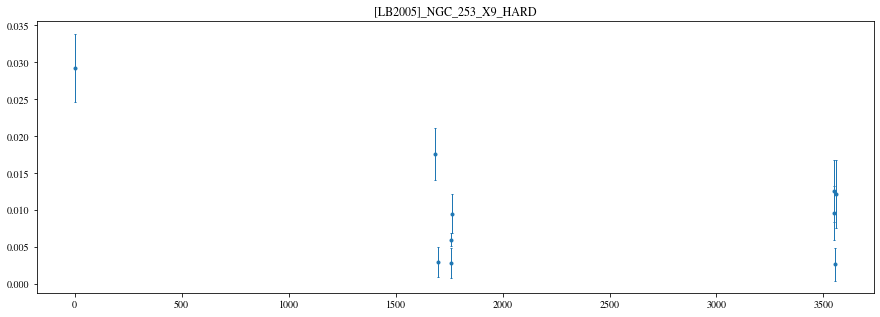

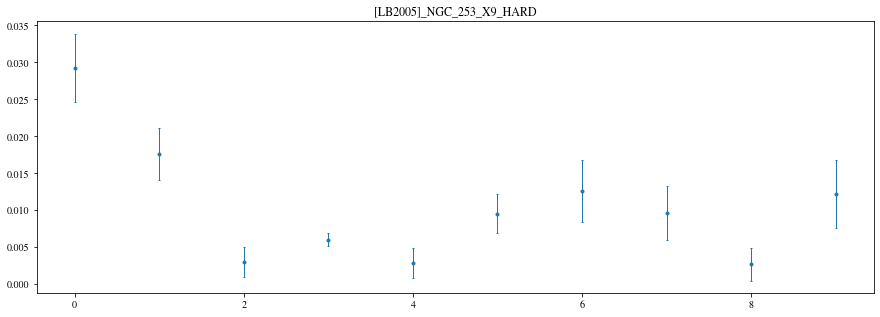

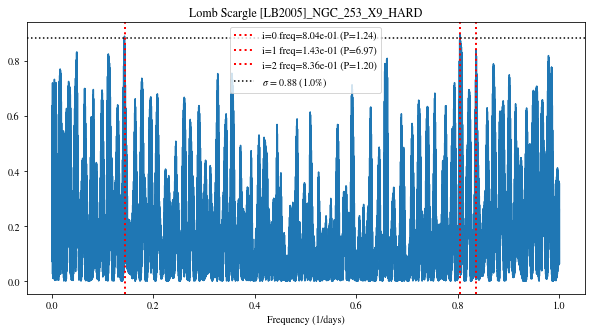

Loading XRT...
simbad_name=[LB2005]_NGC_253_X9 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LB2005]_NGC_253_X9/USERPROD_50701/lc/hardrat_SOFT_PC.csv
df shape=(10, 6) unique_obs=10
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 10 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.87 freq=6.03e-01 p=1.66 fap=0.02
pow=0.86 freq=6.33e-01 p=1.58 fap=0.01
pow=0.82 freq=6.69e-01 p=1.49 fap=0.03
LS success


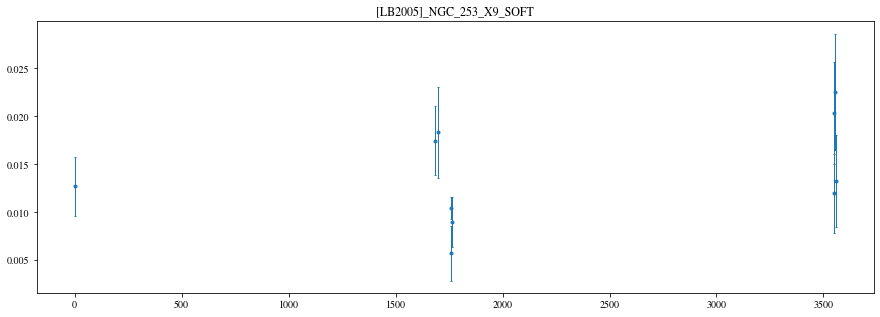

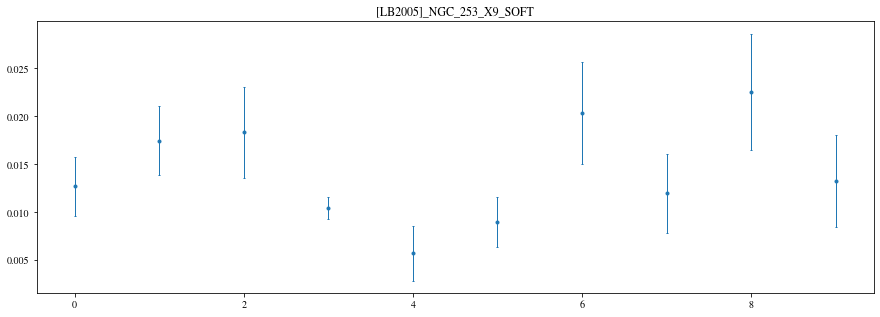

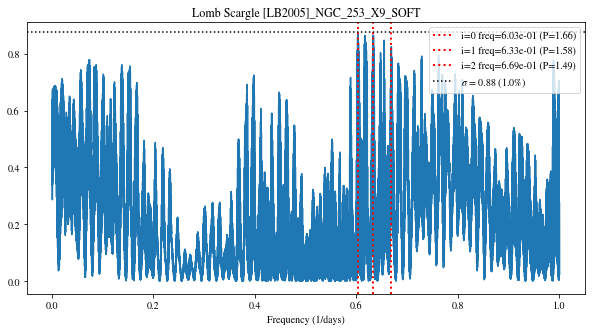

Loading XRT...
simbad_name=NAME_NGC_300_ULX1 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_NGC_300_ULX1/USERPROD_45615/lc/curve_PC.csv
df shape=(71, 7) unique_obs=71
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 71 (1.41%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00


/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


pow=0.31 freq=7.17e-02 p=13.94 fap=0.01
pow=0.30 freq=7.32e-01 p=1.37 fap=0.01
pow=0.26 freq=2.57e-01 p=3.90 fap=0.04
LS success


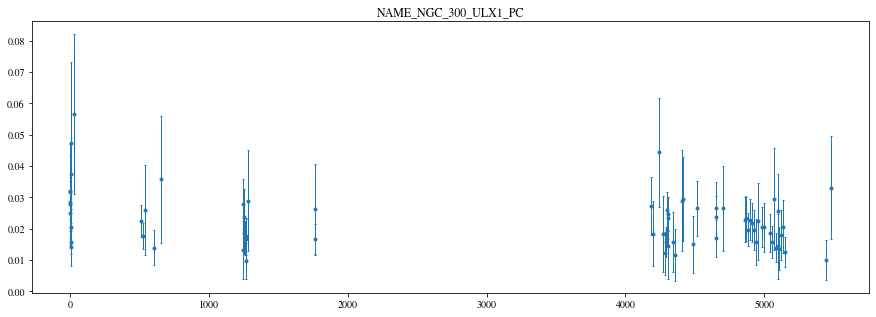

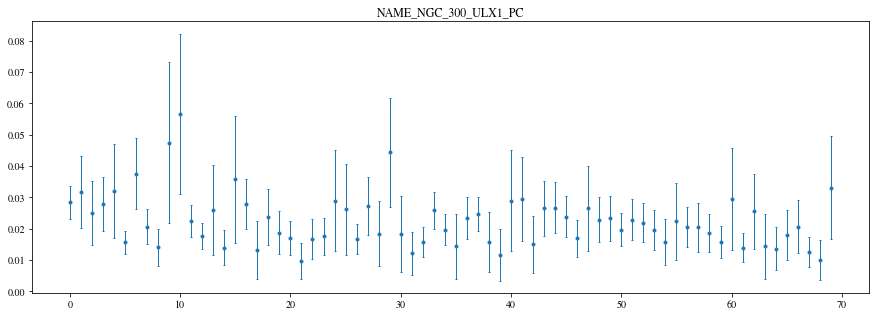

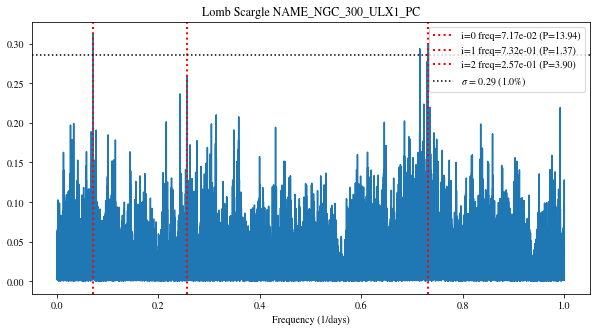

Loading XRT...
simbad_name=NAME_NGC_300_ULX1 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_NGC_300_ULX1/USERPROD_45615/lc/hardrat_HARD_PC.csv
df shape=(71, 6) unique_obs=71
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 71 (1.41%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.29 freq=5.20e-01 p=1.92 fap=0.04
pow=0.28 freq=7.29e-01 p=1.37 fap=0.06
pow=0.26 freq=2.35e-01 p=4.25 fap=0.12
LS success


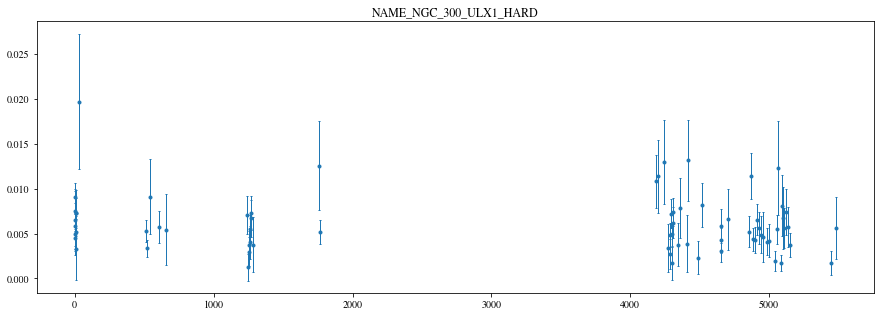

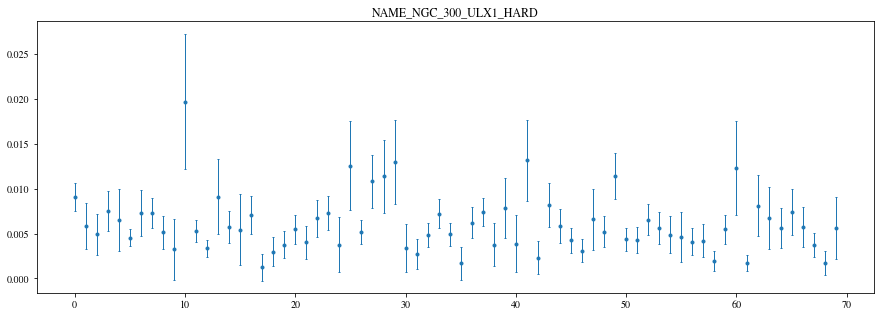

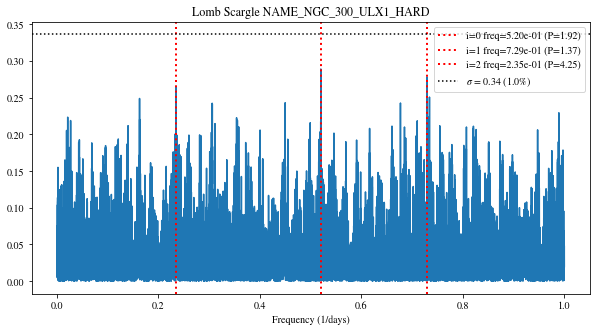

Loading XRT...
simbad_name=NAME_NGC_300_ULX1 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_NGC_300_ULX1/USERPROD_45615/lc/hardrat_SOFT_PC.csv
df shape=(71, 6) unique_obs=71
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 71 (1.41%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.28 freq=7.35e-01 p=1.36 fap=0.02
pow=0.26 freq=2.88e-02 p=34.70 fap=0.04
pow=0.24 freq=2.43e-01 p=4.12 fap=0.09
LS success


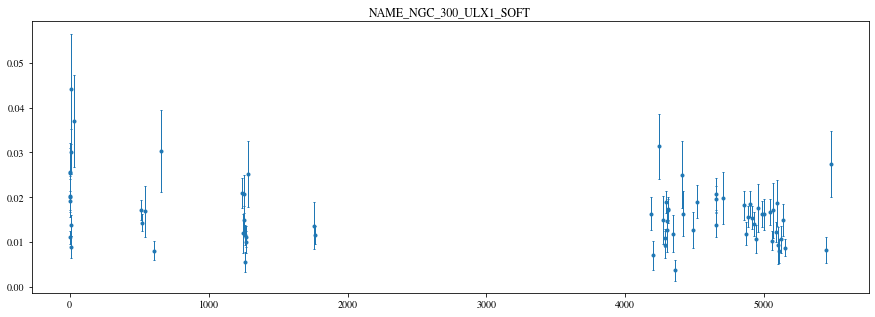

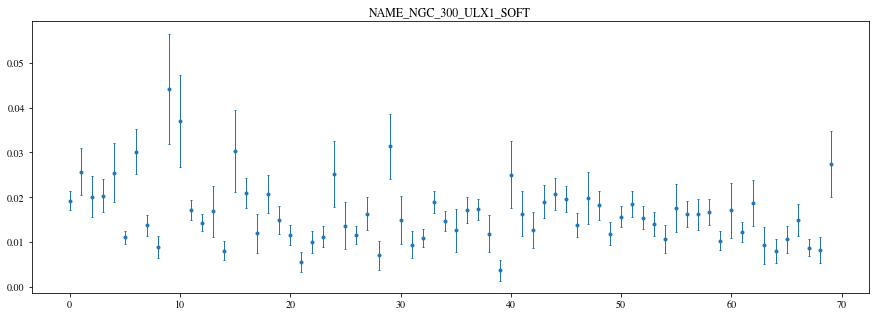

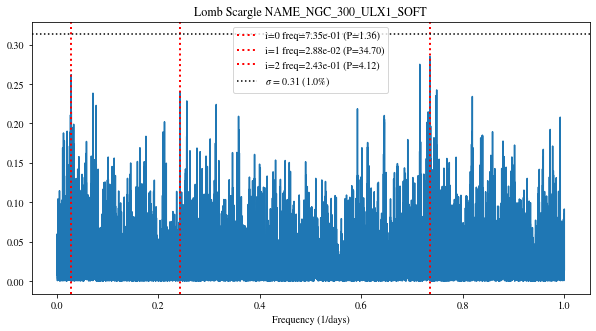

Loading XRT...
simbad_name=[LM2005]_NGC_4395_ULX1 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_4395_ULX1/USERPROD_45623/lc/curve_PC.csv
df shape=(143, 7) unique_obs=143
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 143 (0.70%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.19 freq=1.41e-01 p=7.08 fap=0.00
pow=0.14 freq=2.74e-03 p=364.76 fap=0.04
pow=0.12 freq=8.66e-01 p=1.16 fap=0.10
LS success


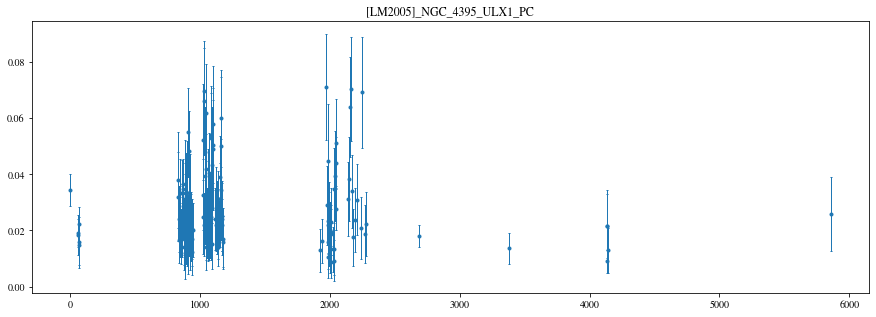

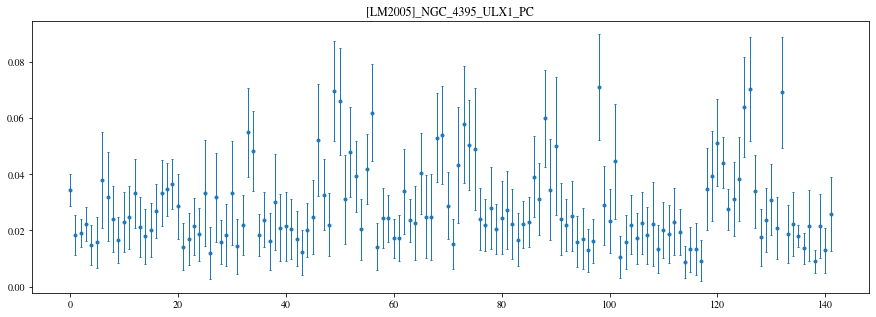

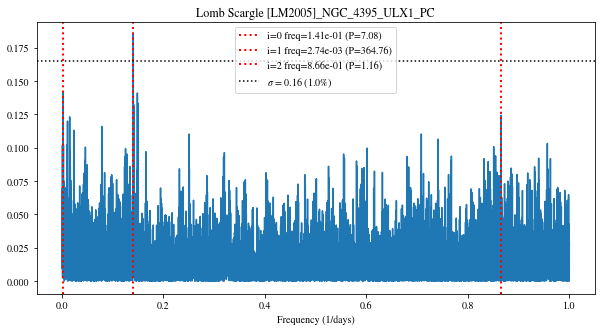

Loading XRT...
simbad_name=[LM2005]_NGC_4395_ULX1 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_4395_ULX1/USERPROD_45623/lc/hardrat_HARD_PC.csv
df shape=(143, 6) unique_obs=143
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 143 (0.70%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
No peaks found
LS failed


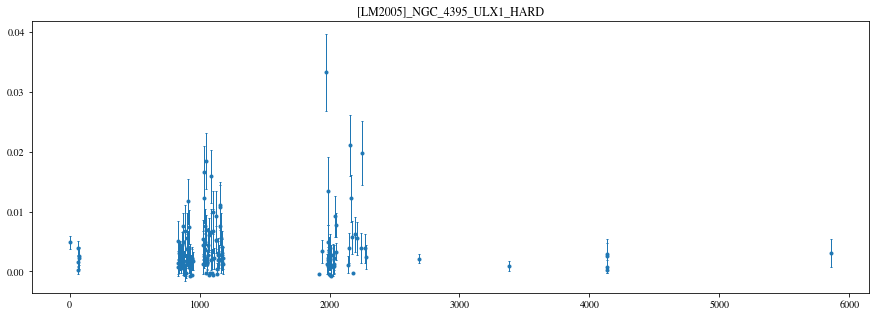

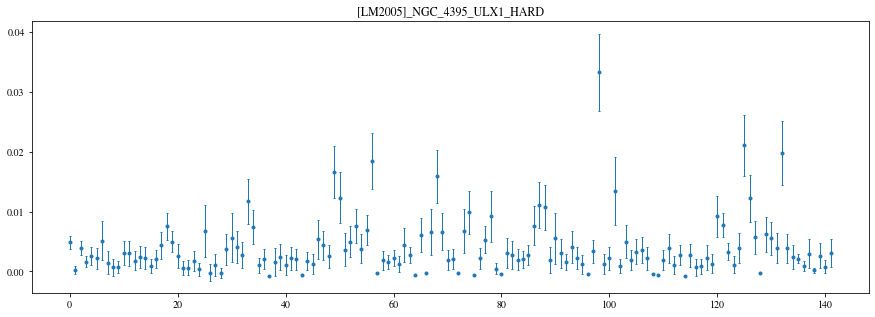

Loading XRT...
simbad_name=[LM2005]_NGC_4395_ULX1 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_4395_ULX1/USERPROD_45623/lc/hardrat_SOFT_PC.csv
df shape=(143, 6) unique_obs=143
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 143 (0.70%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.19 freq=1.41e-01 p=7.08 fap=0.00
pow=0.15 freq=2.74e-03 p=364.76 fap=0.01
pow=0.12 freq=7.91e-02 p=12.64 fap=0.11
LS success


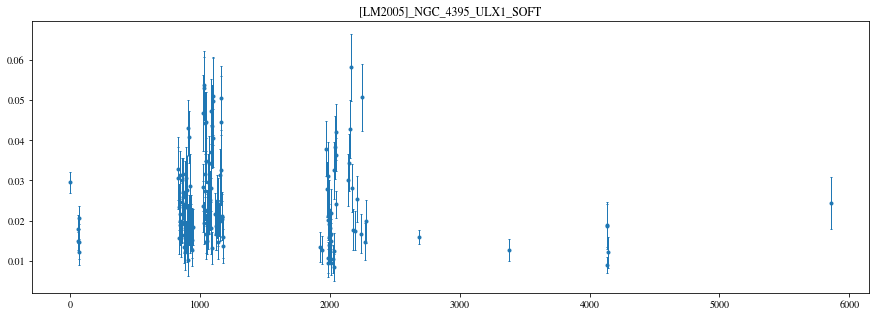

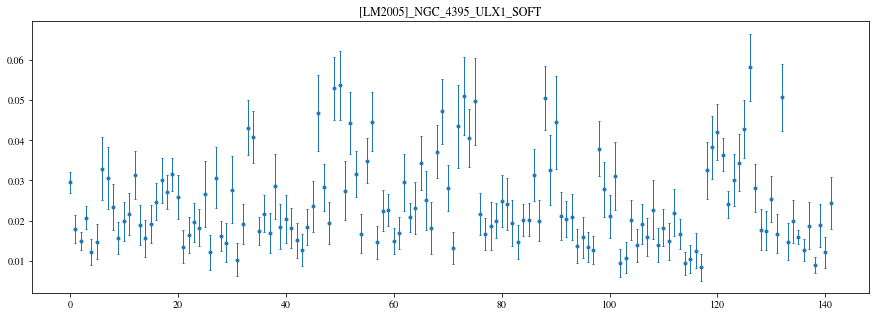

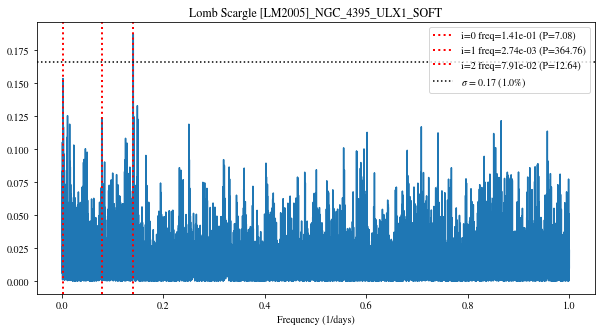

Loading XRT...
simbad_name=[LM2005]_NGC_5204_ULX1 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_5204_ULX1/USERPROD_45624/lc/curve_PC.csv
df shape=(64, 7) unique_obs=64
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 64 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00


/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


pow=0.36 freq=8.04e-01 p=1.24 fap=0.00
pow=0.34 freq=4.85e-03 p=206.16 fap=0.00
pow=0.26 freq=5.11e-01 p=1.96 fap=0.05
LS success


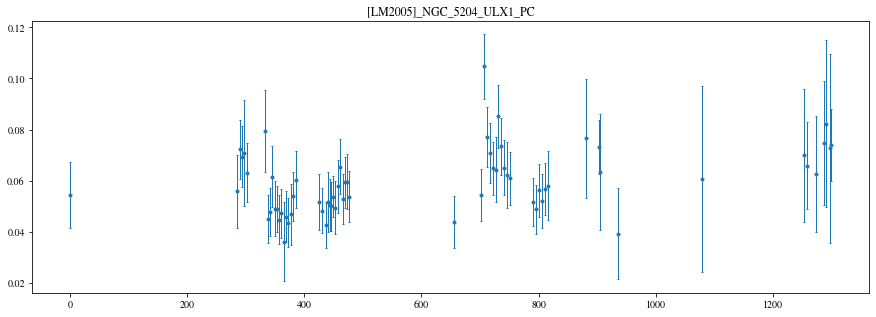

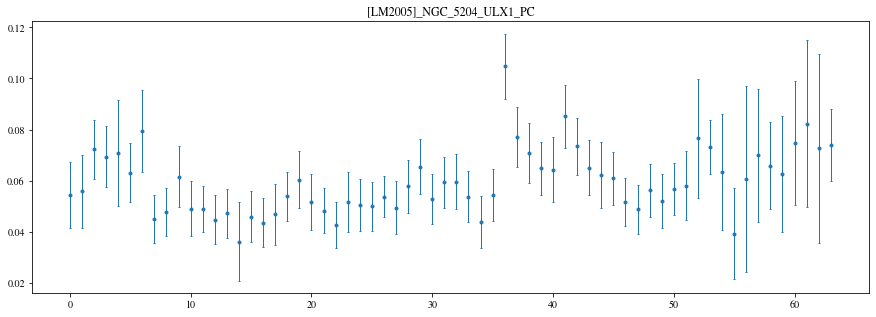

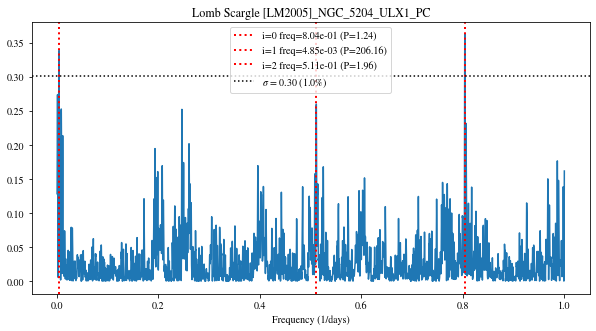

Loading XRT...
simbad_name=[LM2005]_NGC_5204_ULX1 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_5204_ULX1/USERPROD_45624/lc/hardrat_HARD_PC.csv
df shape=(64, 6) unique_obs=64
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 64 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.25 freq=5.55e-01 p=1.80 fap=0.23
pow=0.23 freq=2.47e-01 p=4.05 fap=0.33
pow=0.22 freq=5.11e-01 p=1.96 fap=0.37
LS success


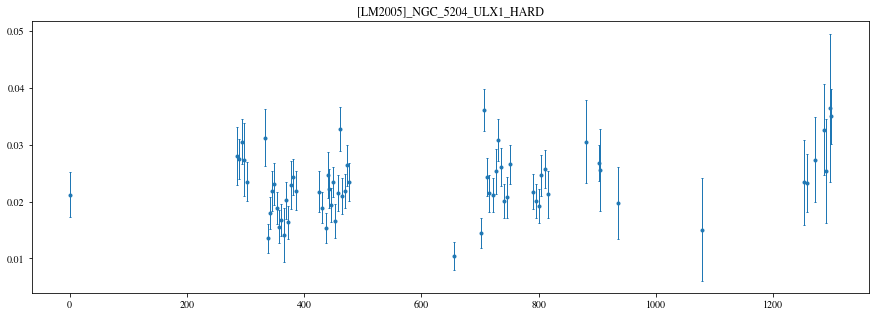

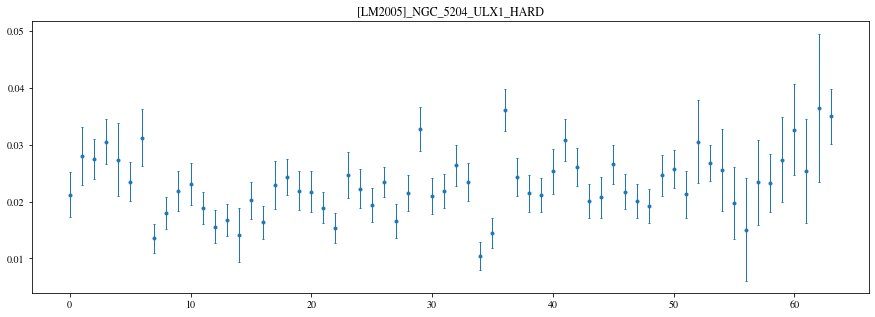

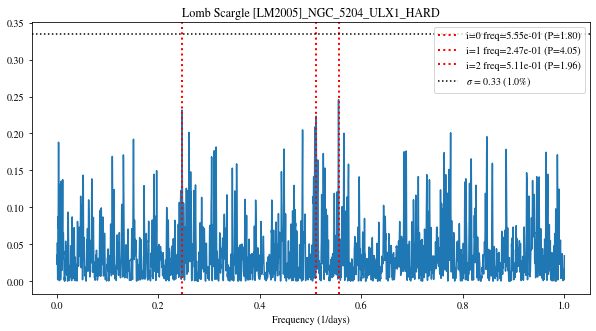

Loading XRT...
simbad_name=[LM2005]_NGC_5204_ULX1 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_5204_ULX1/USERPROD_45624/lc/hardrat_SOFT_PC.csv
df shape=(64, 6) unique_obs=64
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 64 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.40 freq=2.08e-03 p=481.19 fap=0.00
pow=0.40 freq=8.04e-01 p=1.24 fap=0.00
pow=0.24 freq=4.02e-01 p=2.49 fap=0.07
LS success


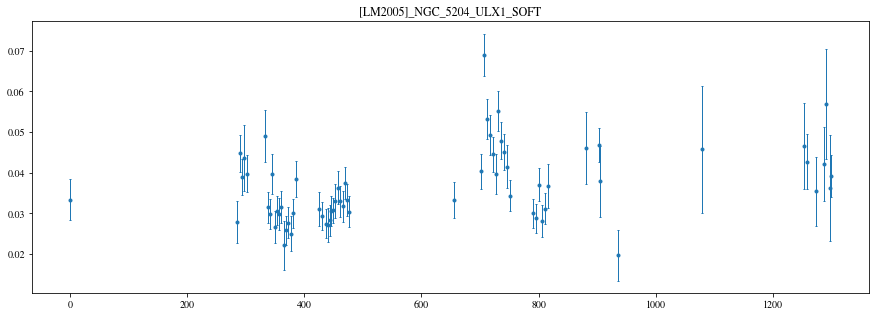

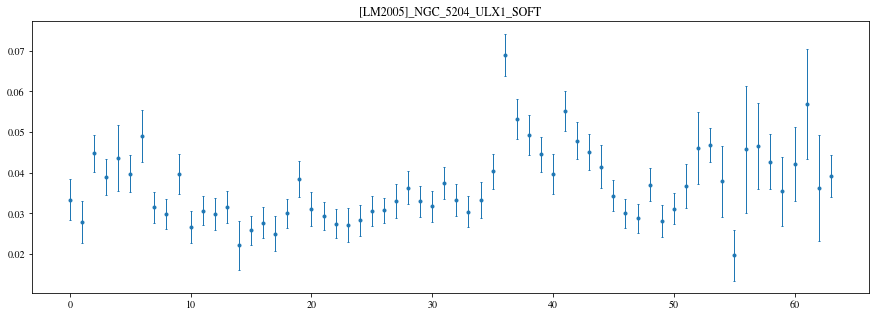

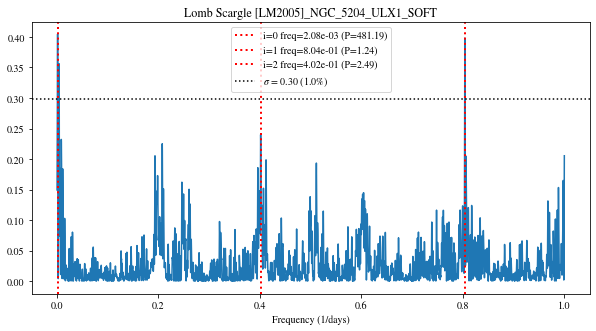

Loading XRT...
simbad_name=[LM2005]_NGC_5408_ULX1 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_5408_ULX1/USERPROD_45627/lc/curve_PC.csv
df shape=(479, 7) unique_obs=479
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 479 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00


/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


pow=0.09 freq=1.34e-01 p=7.46 fap=0.01
pow=0.08 freq=5.23e-03 p=191.21 fap=0.08
pow=0.07 freq=9.66e-01 p=1.04 fap=0.26
LS success


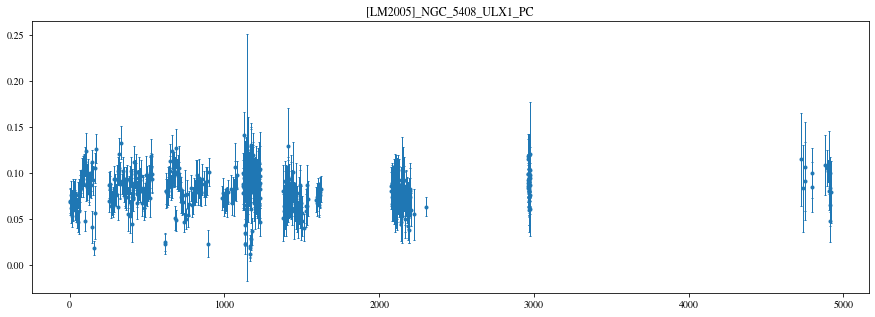

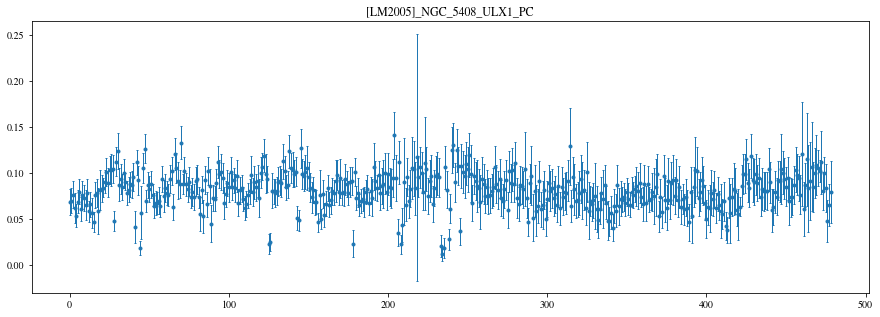

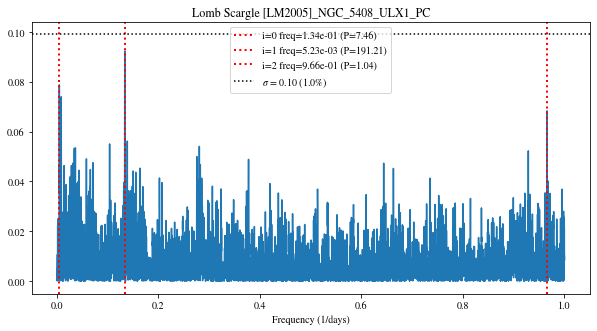

Loading XRT...
simbad_name=[LM2005]_NGC_5408_ULX1 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_5408_ULX1/USERPROD_45627/lc/hardrat_HARD_PC.csv
df shape=(479, 6) unique_obs=479
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 479 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.06 freq=5.47e-03 p=182.69 fap=0.61
pow=0.06 freq=1.35e-01 p=7.40 fap=0.66
pow=0.06 freq=5.33e-01 p=1.88 fap=0.75
LS success


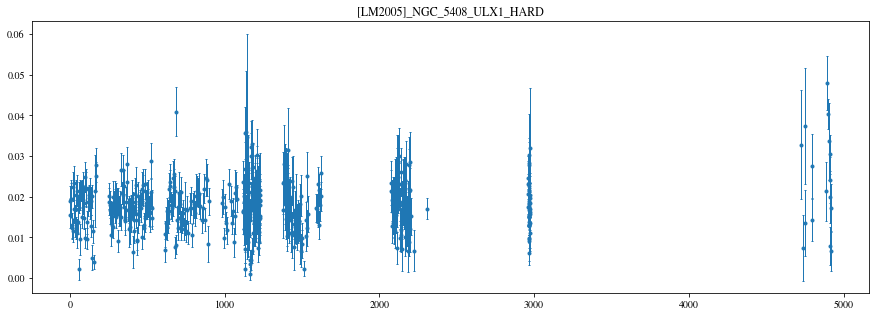

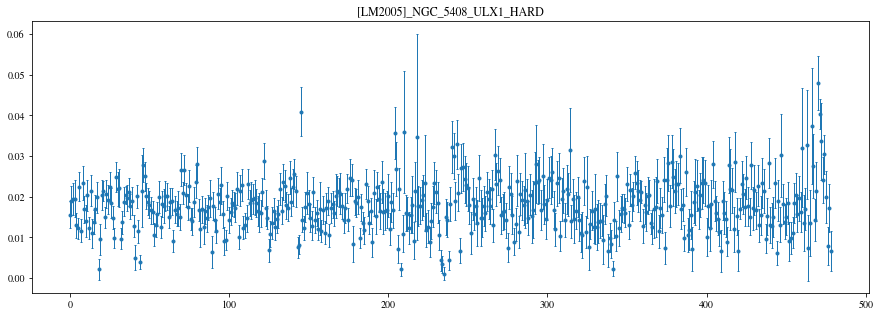

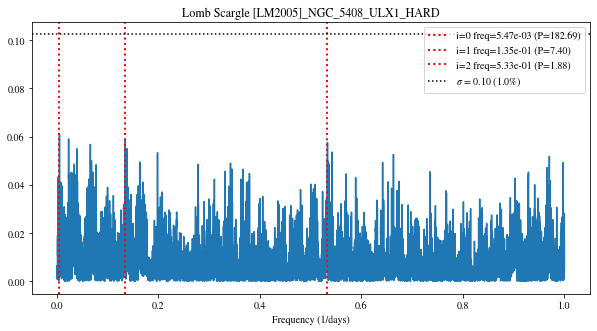

Loading XRT...
simbad_name=[LM2005]_NGC_5408_ULX1 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_5408_ULX1/USERPROD_45627/lc/hardrat_SOFT_PC.csv
df shape=(479, 6) unique_obs=479
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 479 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.09 freq=1.34e-01 p=7.46 fap=0.03
pow=0.08 freq=5.19e-03 p=192.71 fap=0.06
pow=0.07 freq=9.66e-01 p=1.04 fap=0.28
LS success


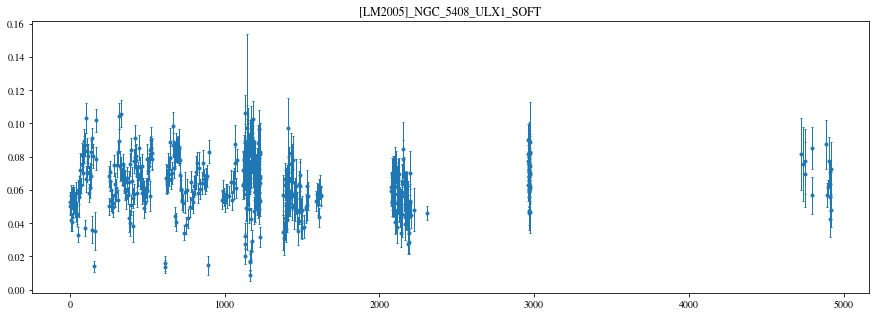

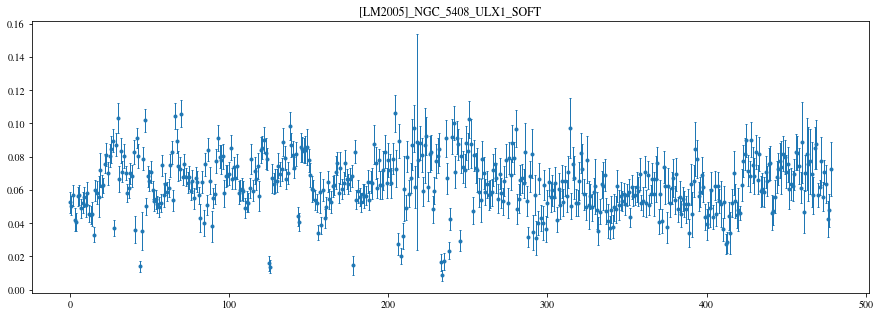

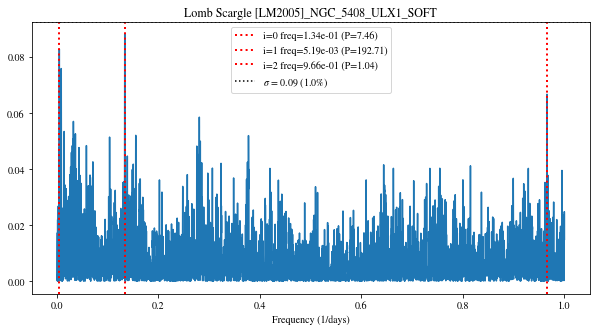

Loading XRT...
simbad_name=[SRW2006b]_NGC_55_ULX curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[SRW2006b]_NGC_55_ULX/USERPROD_45628/lc/curve_PC.csv
df shape=(166, 7) unique_obs=166
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 166 (0.60%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.09 freq=3.33e-01 p=3.00 fap=0.41
pow=0.09 freq=6.07e-01 p=1.65 fap=0.48
pow=0.09 freq=3.34e-02 p=29.90 fap=0.50
LS success


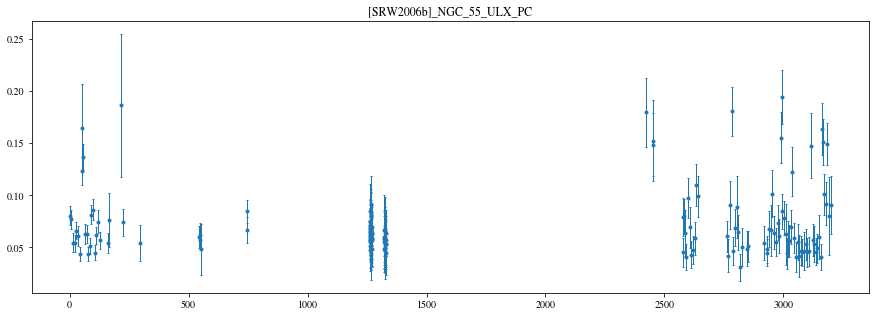

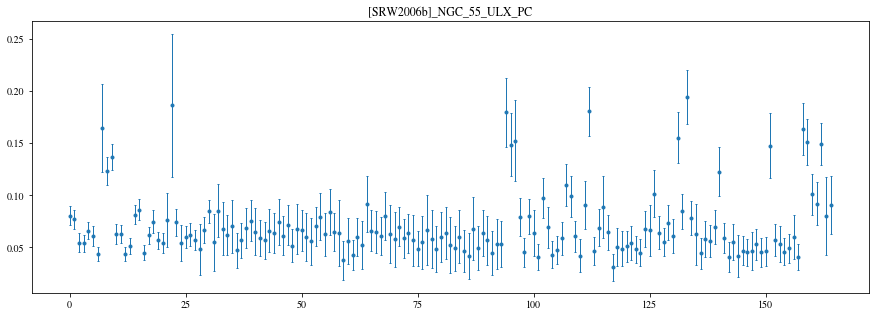

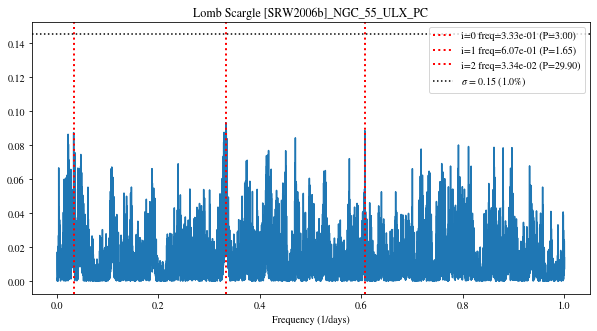

Loading XRT...
simbad_name=[SRW2006b]_NGC_55_ULX curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[SRW2006b]_NGC_55_ULX/USERPROD_45628/lc/hardrat_HARD_PC.csv
df shape=(166, 6) unique_obs=166
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 166 (0.60%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.10 freq=8.11e-01 p=1.23 fap=0.09
pow=0.10 freq=7.58e-01 p=1.32 fap=0.15
pow=0.08 freq=1.48e-02 p=67.77 fap=0.36
LS success


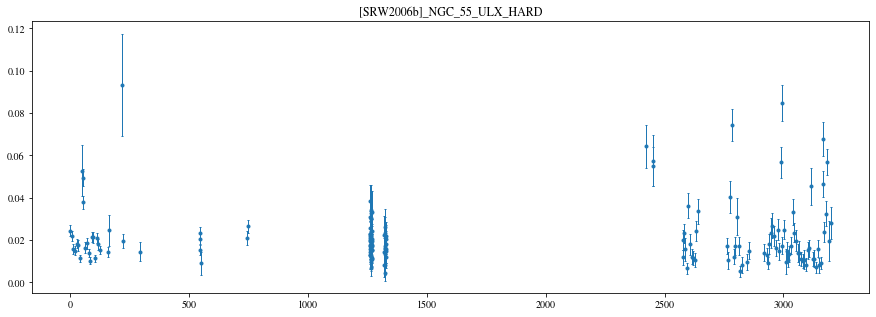

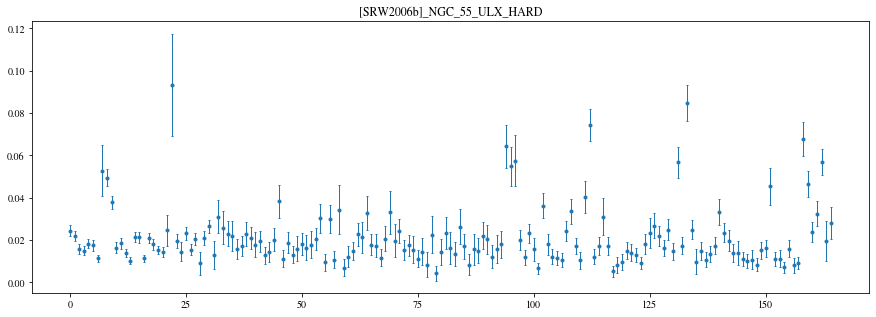

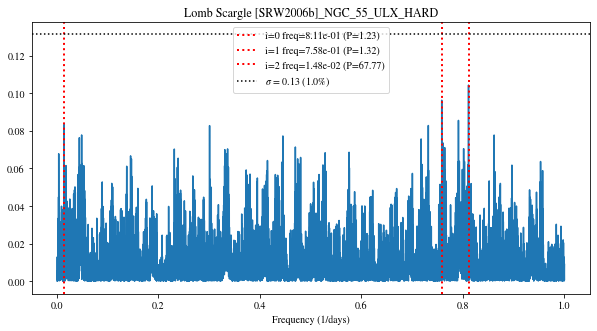

Loading XRT...
simbad_name=[SRW2006b]_NGC_55_ULX curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[SRW2006b]_NGC_55_ULX/USERPROD_45628/lc/hardrat_SOFT_PC.csv
df shape=(166, 6) unique_obs=166
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 166 (0.60%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.11 freq=2.24e-02 p=44.55 fap=0.27
pow=0.10 freq=6.07e-01 p=1.65 fap=0.33
pow=0.10 freq=4.51e-01 p=2.22 fap=0.35
LS success


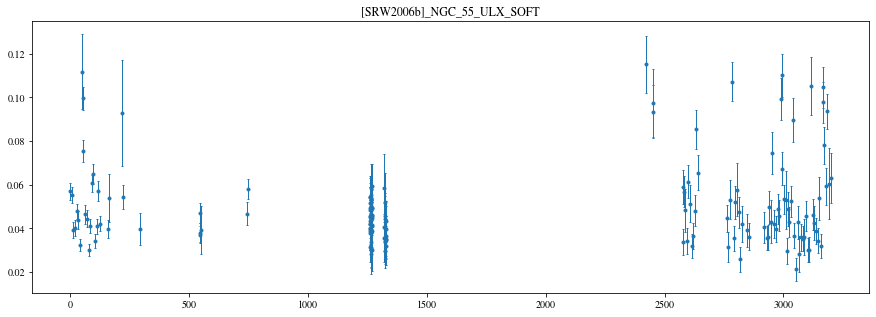

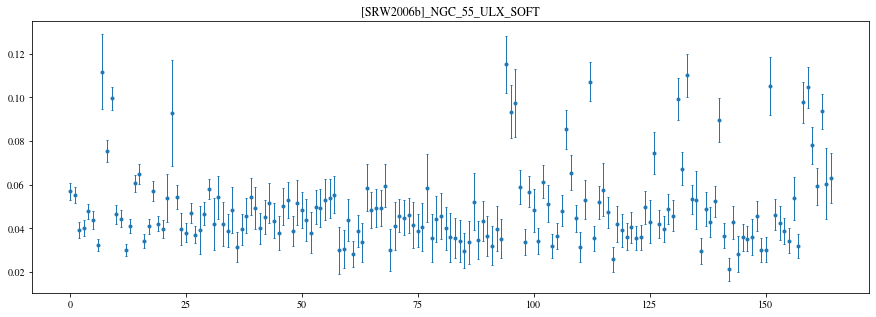

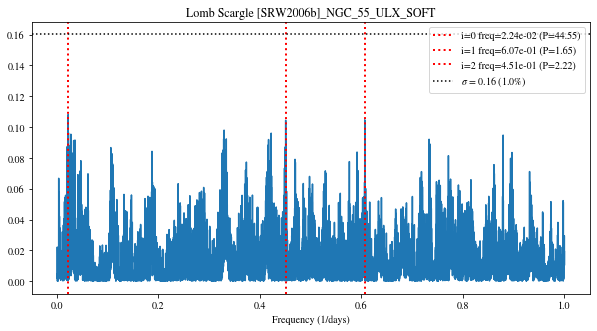

Loading XRT...
simbad_name=[SST2011]_J141939.39+564137.8 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[SST2011]_J141939.39+564137.8/USERPROD_45629/lc/curve_PC.csv
df shape=(2, 7) unique_obs=2
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 2 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
No peaks found
LS failed


/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


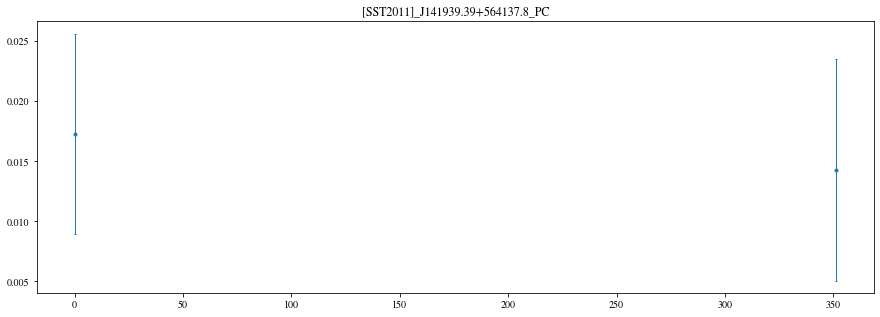

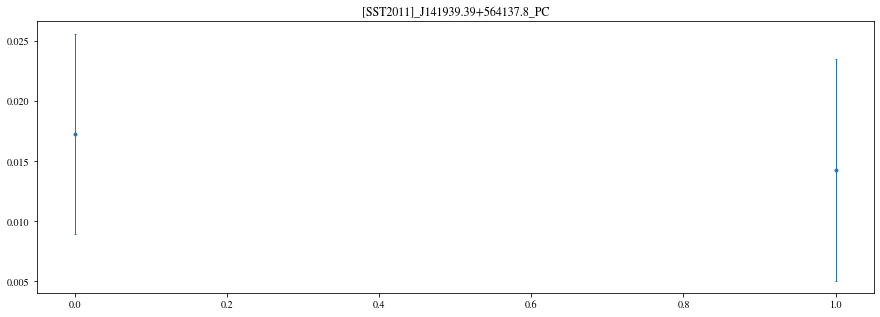

Loading XRT...
simbad_name=[SST2011]_J141939.39+564137.8 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[SST2011]_J141939.39+564137.8/USERPROD_45629/lc/hardrat_HARD_PC.csv
df shape=(2, 6) unique_obs=2
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 2 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
No peaks found
LS failed


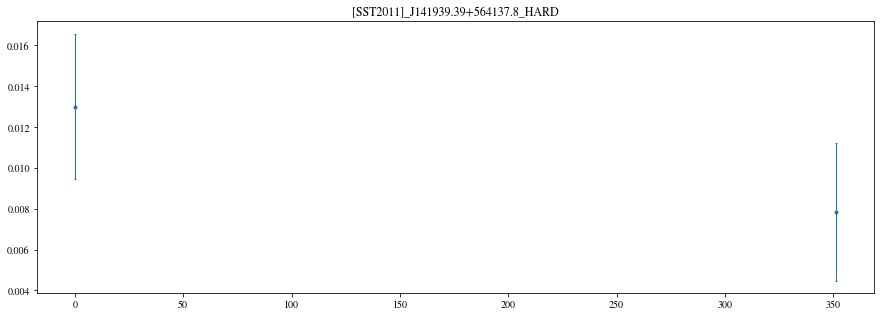

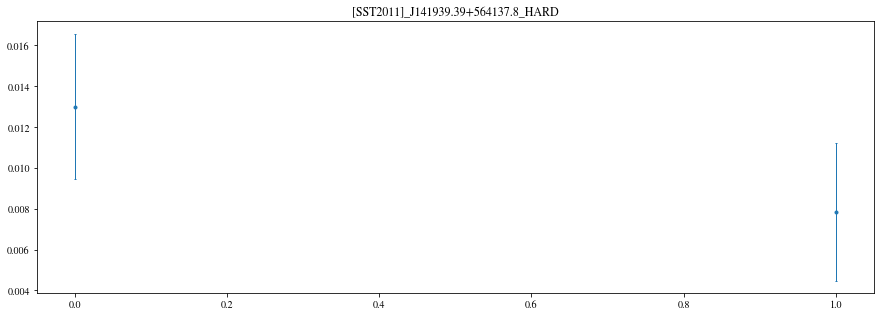

Loading XRT...
simbad_name=[SST2011]_J141939.39+564137.8 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[SST2011]_J141939.39+564137.8/USERPROD_45629/lc/hardrat_SOFT_PC.csv
df shape=(2, 6) unique_obs=2
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 2 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
No peaks found
LS failed


/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


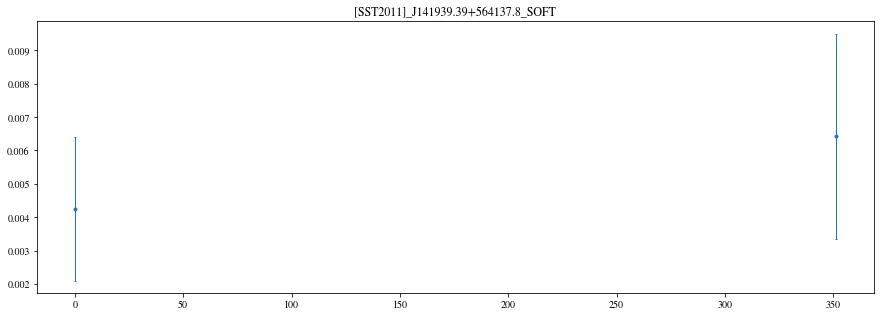

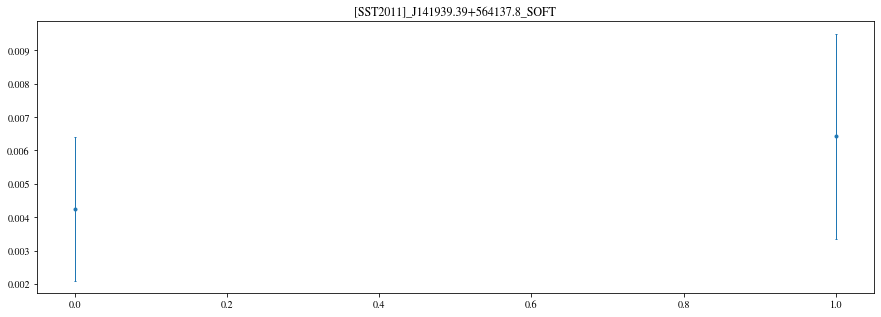

Loading XRT...
simbad_name=NAME_NGC_5907_ULX curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_NGC_5907_ULX/USERPROD_45630/lc/curve_PC.csv
df shape=(72, 7) unique_obs=72
XRT FLAG SUMMARY
FLAG_RATE=0 = 2 / 72 (2.78%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00


/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


pow=0.34 freq=2.85e-01 p=3.51 fap=0.06
pow=0.32 freq=5.02e-01 p=1.99 fap=0.10
pow=0.31 freq=3.66e-01 p=2.73 fap=0.14
LS success


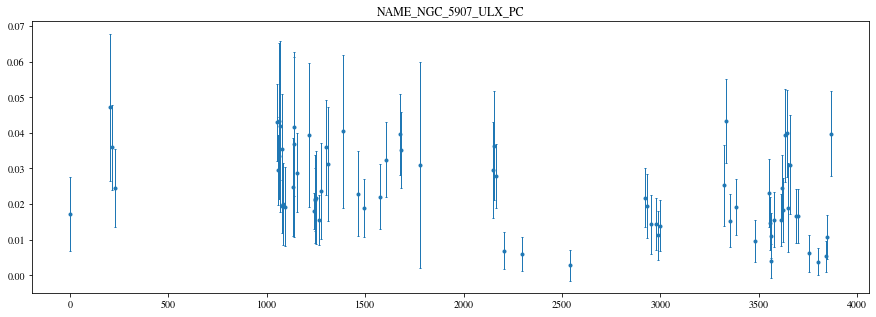

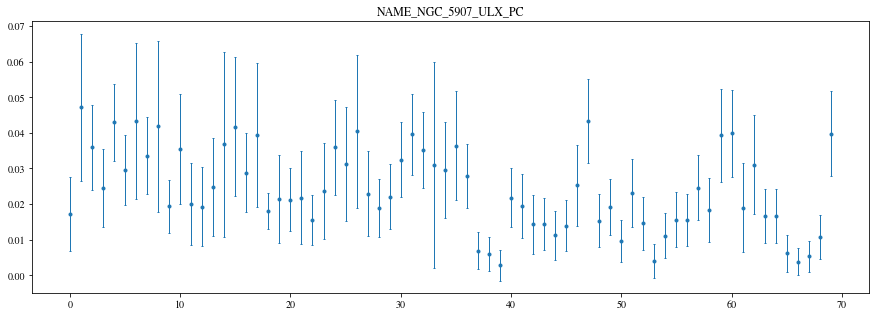

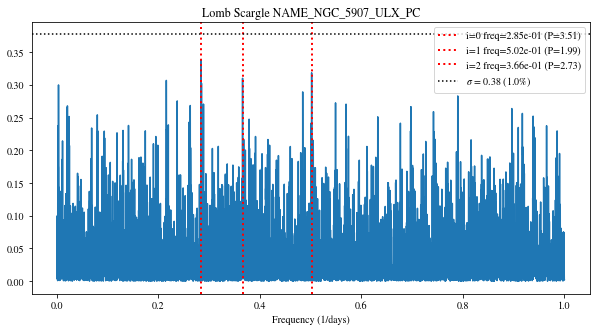

Loading XRT...
simbad_name=NAME_NGC_5907_ULX curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_NGC_5907_ULX/USERPROD_45630/lc/hardrat_HARD_PC.csv
df shape=(72, 6) unique_obs=72
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 72 (1.39%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=3026.01 freq=7.09e-01 p=1.41 fap=0.00
pow=2035.15 freq=8.27e-01 p=1.21 fap=0.01
pow=720.82 freq=7.46e-01 p=1.34 fap=0.01
LS success


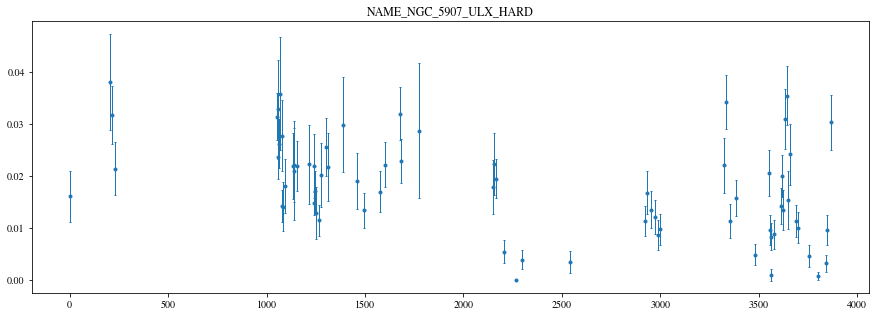

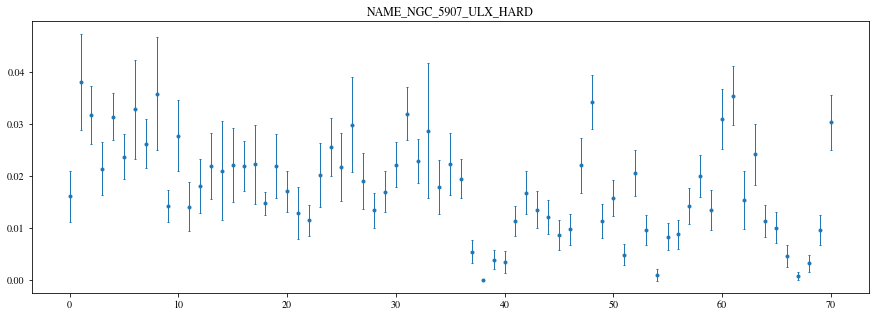

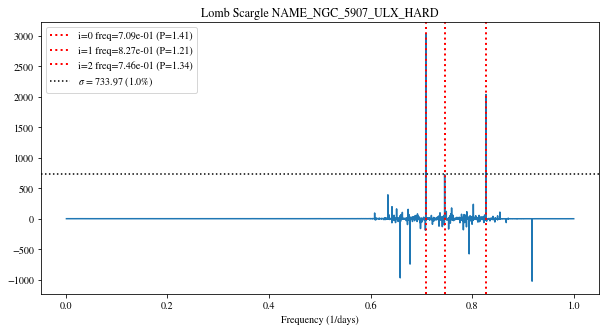

Loading XRT...
simbad_name=NAME_NGC_5907_ULX curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_NGC_5907_ULX/USERPROD_45630/lc/hardrat_SOFT_PC.csv
df shape=(72, 6) unique_obs=72
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 72 (1.39%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=347.13 freq=9.52e-01 p=1.05 fap=0.00
pow=113.61 freq=9.85e-01 p=1.02 fap=0.00
pow=7.87 freq=9.12e-01 p=1.10 fap=0.00
LS success


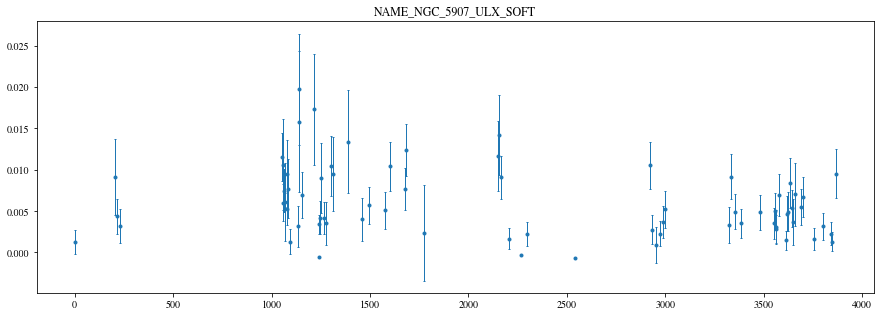

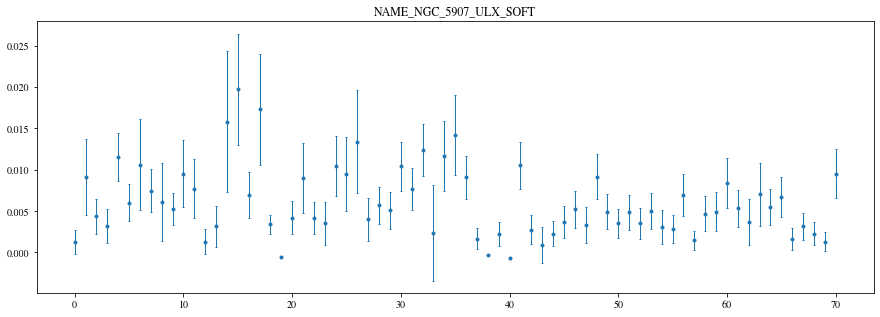

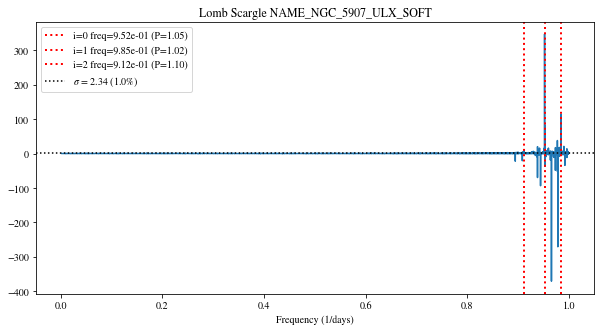

Loading XRT...
simbad_name=[LB2005]_NGC_6946_ULX1 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LB2005]_NGC_6946_ULX1/USERPROD_45634/lc/curve_PC.csv
df shape=(2, 7) unique_obs=2
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 2 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 0.99


/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


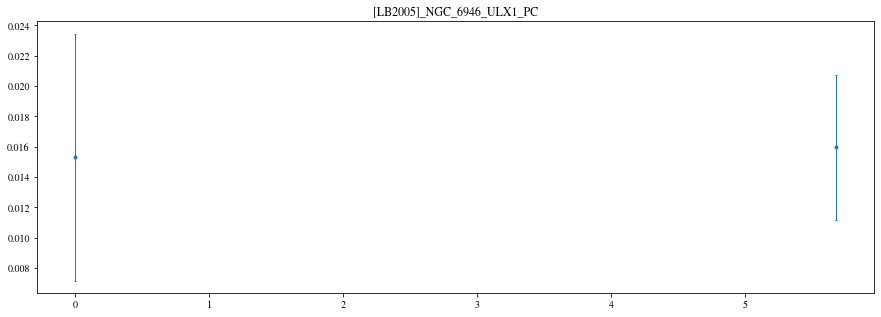

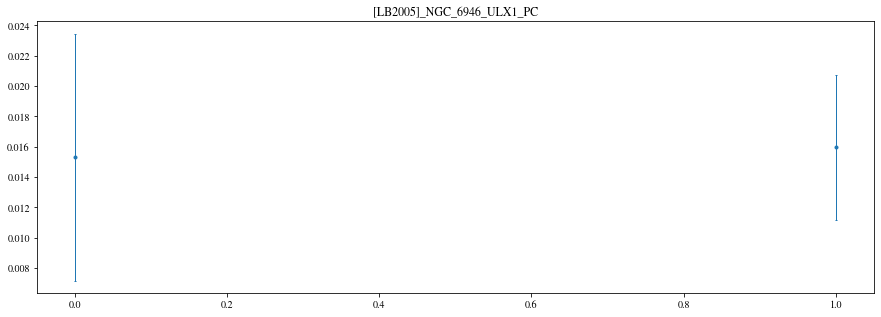

Loading XRT...
simbad_name=[LB2005]_NGC_6946_ULX1 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LB2005]_NGC_6946_ULX1/USERPROD_45634/lc/hardrat_HARD_PC.csv
df shape=(2, 6) unique_obs=2
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 2 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 0.99


/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


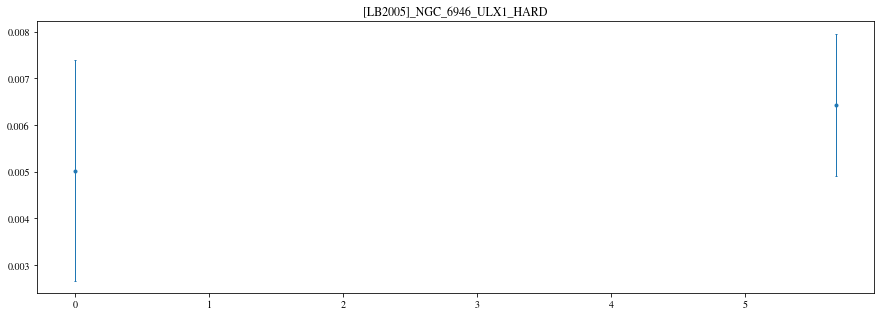

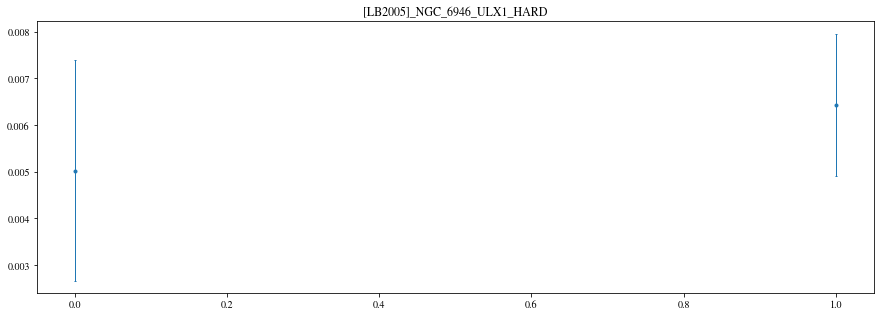

Loading XRT...
simbad_name=[LB2005]_NGC_6946_ULX1 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LB2005]_NGC_6946_ULX1/USERPROD_45634/lc/hardrat_SOFT_PC.csv
df shape=(2, 6) unique_obs=2
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 2 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 0.99


/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


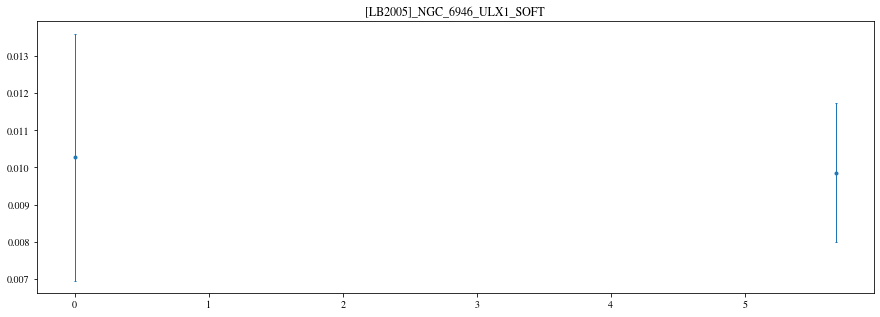

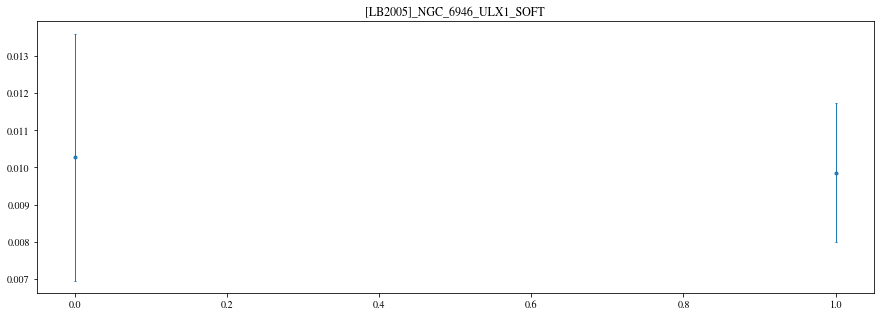

Loading XRT...
simbad_name=[LB2005]_NGC_6946_ULX3 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LB2005]_NGC_6946_ULX3/USERPROD_53328/lc/curve_PC.csv
df shape=(108, 7) unique_obs=108
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 108 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.25 freq=8.25e-01 p=1.21 fap=0.00
pow=0.24 freq=1.55e-02 p=64.50 fap=0.00
pow=0.20 freq=8.59e-01 p=1.16 fap=0.02
LS success


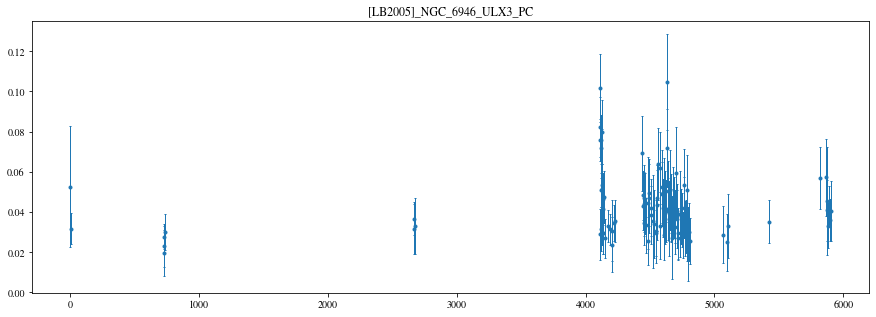

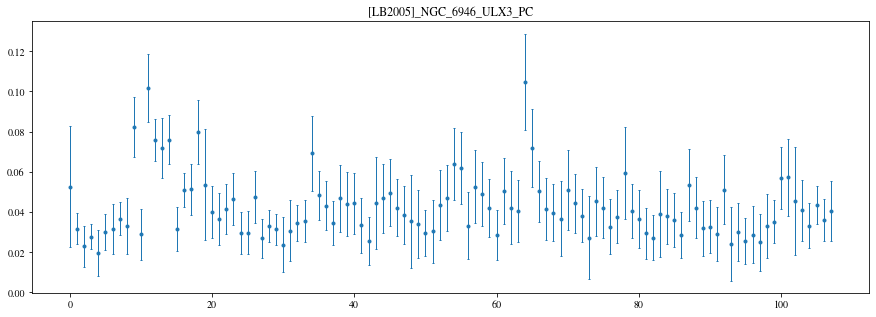

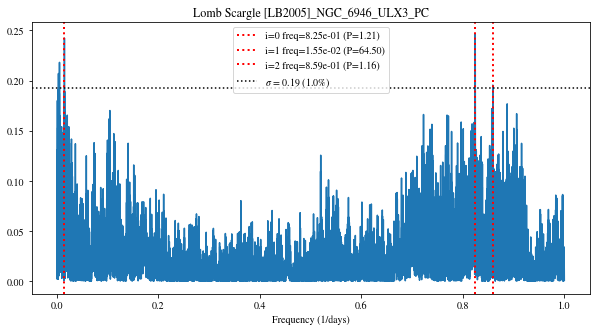

Loading XRT...
simbad_name=[LB2005]_NGC_6946_ULX3 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LB2005]_NGC_6946_ULX3/USERPROD_53328/lc/hardrat_HARD_PC.csv
df shape=(108, 6) unique_obs=108
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 108 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.24 freq=1.55e-02 p=64.50 fap=0.00
pow=0.20 freq=8.79e-01 p=1.14 fap=0.00
pow=0.20 freq=5.86e-02 p=17.05 fap=0.00
LS success


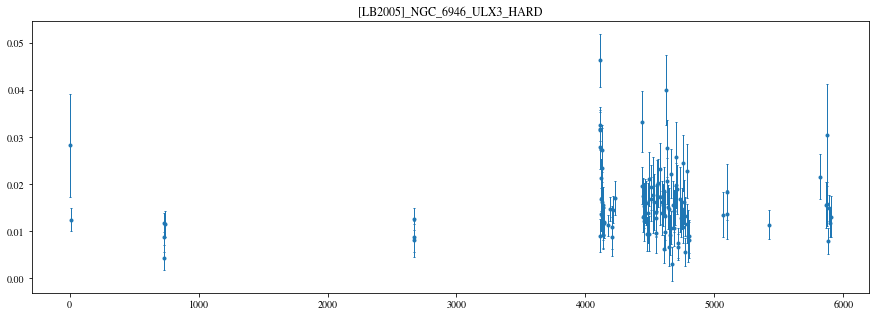

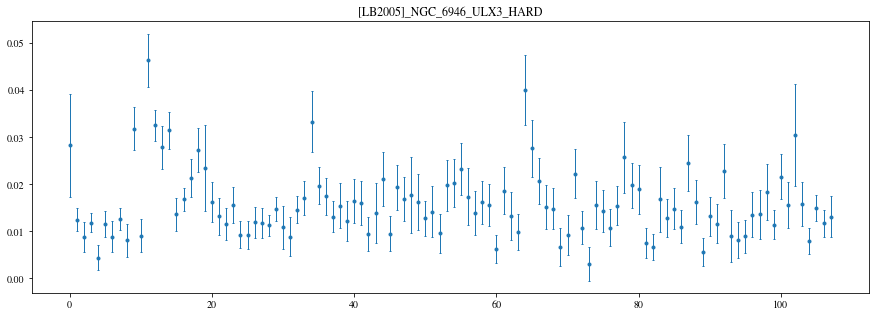

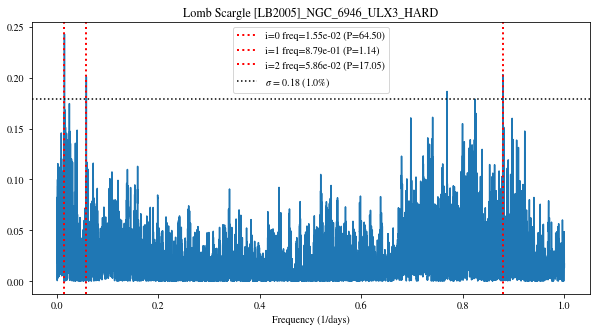

Loading XRT...
simbad_name=[LB2005]_NGC_6946_ULX3 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LB2005]_NGC_6946_ULX3/USERPROD_53328/lc/hardrat_SOFT_PC.csv
df shape=(108, 6) unique_obs=108
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 108 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.27 freq=5.74e-03 p=174.10 fap=0.00
pow=0.22 freq=8.25e-01 p=1.21 fap=0.01
pow=0.21 freq=8.59e-01 p=1.16 fap=0.01
LS success


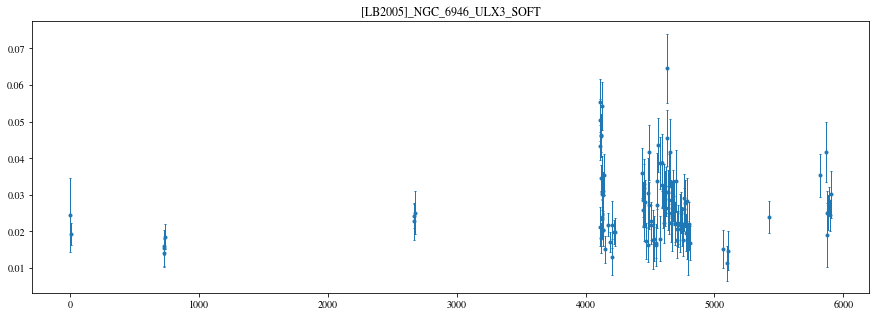

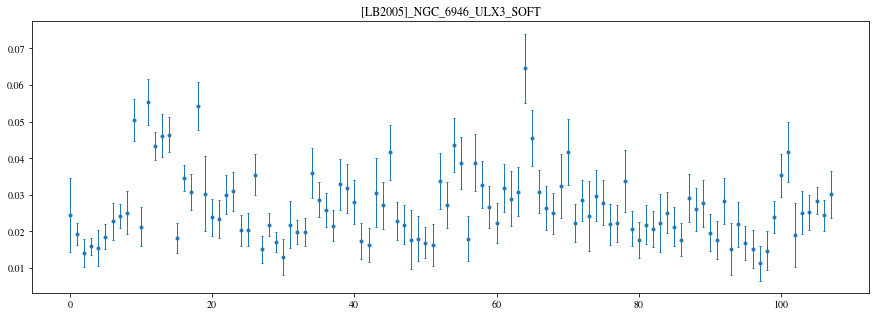

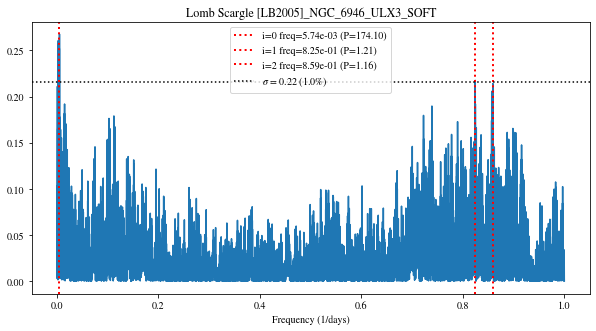

Loading XRT...
simbad_name=NAME_NGC_7090_ULX3 curve=PC pandas=False
Could not load NAME_NGC_7090_ULX3 PC
Loading XRT...
simbad_name=NAME_NGC_7090_ULX3 curve=HARD pandas=False
Could not load NAME_NGC_7090_ULX3 HARD
Loading XRT...
simbad_name=NAME_NGC_7090_ULX3 curve=SOFT pandas=False
Could not load NAME_NGC_7090_ULX3 SOFT
Loading XRT...
simbad_name=NAME_NGC_7793_P13 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_NGC_7793_P13/USERPROD_45636/lc/curve_PC.csv
df shape=(223, 7) unique_obs=223
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 223 (0.45%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.29 freq=5.08e-03 p=196.67 fap=0.00
pow=0.15 freq=5.01e-01 p=2.00 fap=0.02
pow=0.14 freq=8.29e-01 p=1.21 fap=0.04
LS success


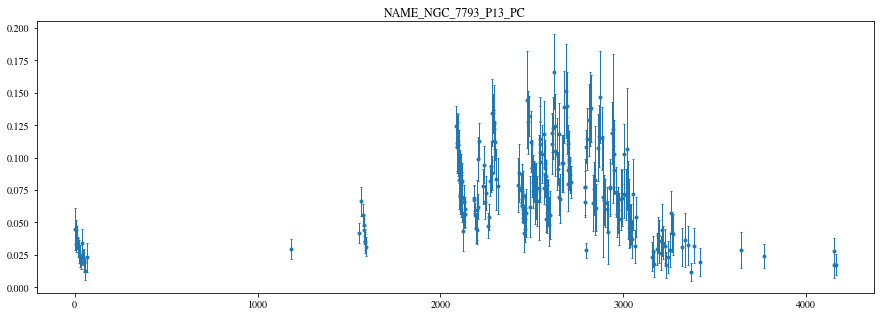

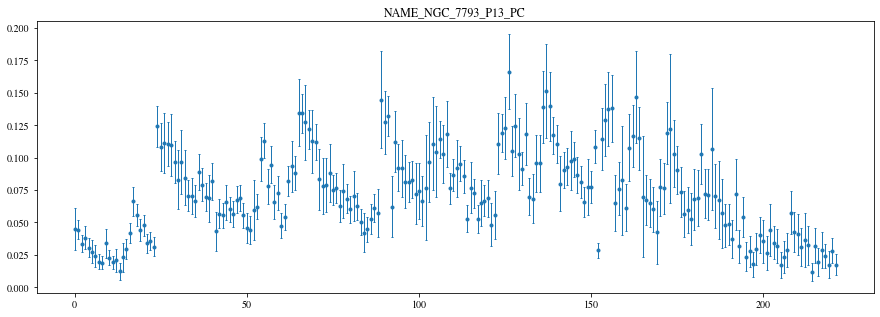

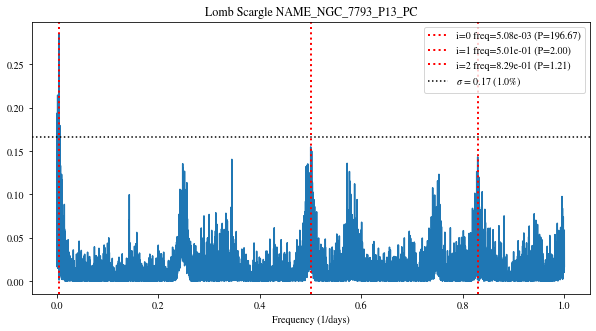

Loading XRT...
simbad_name=NAME_NGC_7793_P13 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_NGC_7793_P13/USERPROD_45636/lc/hardrat_HARD_PC.csv
df shape=(223, 6) unique_obs=223
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 223 (0.45%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.28 freq=5.08e-03 p=196.67 fap=0.00
pow=0.15 freq=4.93e-01 p=2.03 fap=0.02
pow=0.14 freq=5.72e-01 p=1.75 fap=0.05
LS success


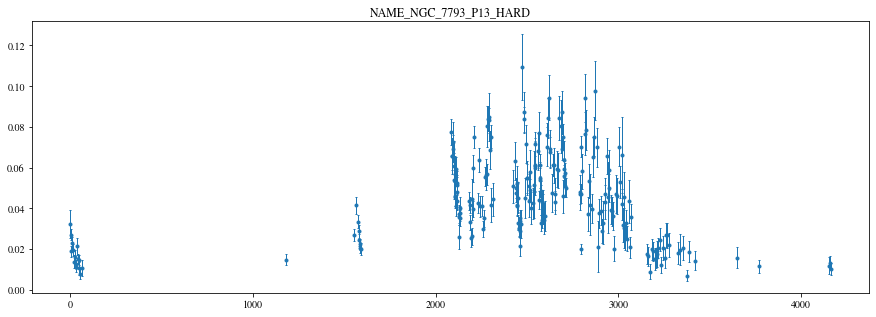

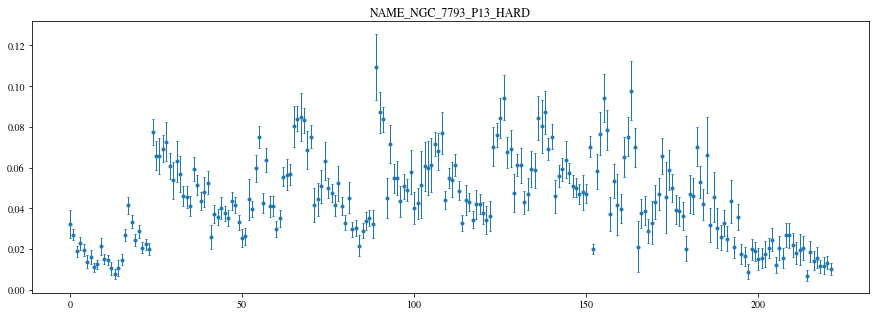

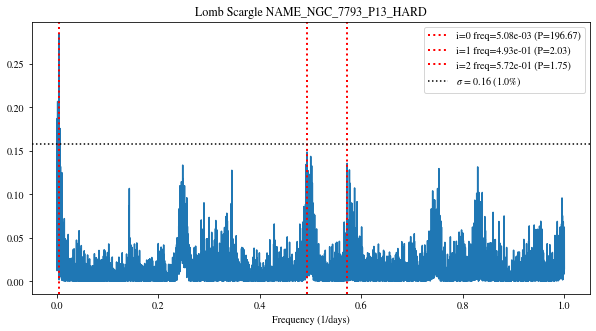

Loading XRT...
simbad_name=NAME_NGC_7793_P13 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_NGC_7793_P13/USERPROD_45636/lc/hardrat_SOFT_PC.csv
df shape=(223, 6) unique_obs=223
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 223 (0.45%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.25 freq=5.08e-03 p=196.67 fap=0.00
pow=0.16 freq=8.29e-01 p=1.21 fap=0.04
pow=0.16 freq=5.02e-01 p=1.99 fap=0.06
LS success


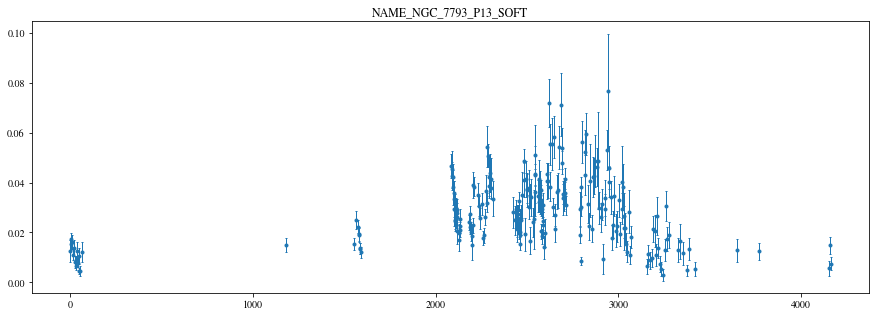

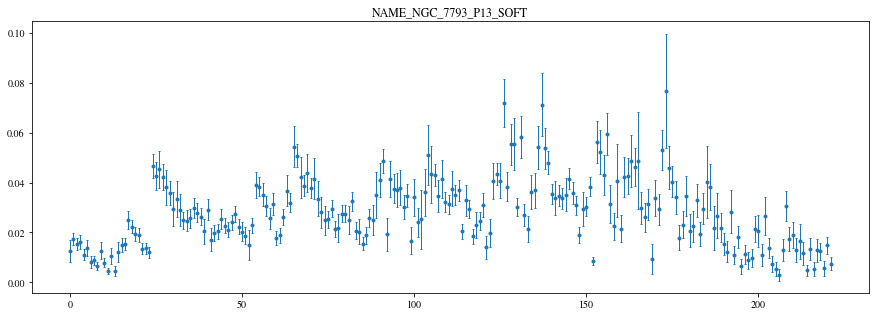

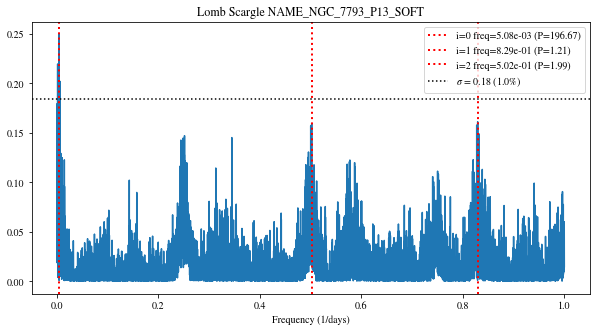

Loading XRT...
simbad_name=NAME_NGC_925_ULX-1 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_NGC_925_ULX-1/USERPROD_45639/lc/curve_PC.csv
df shape=(91, 7) unique_obs=91
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 91 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.44 freq=1.16e-03 p=863.00 fap=0.00
pow=0.20 freq=2.97e-01 p=3.37 fap=0.02
pow=0.16 freq=1.44e-01 p=6.93 fap=0.11
LS success


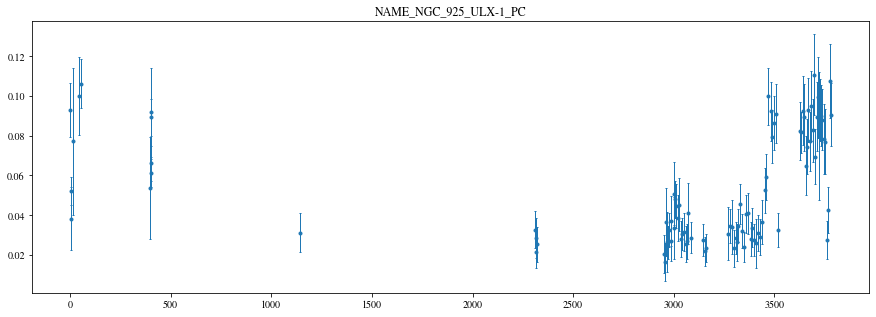

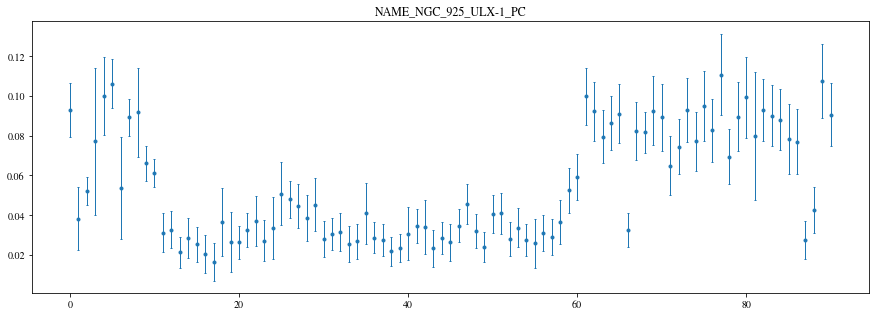

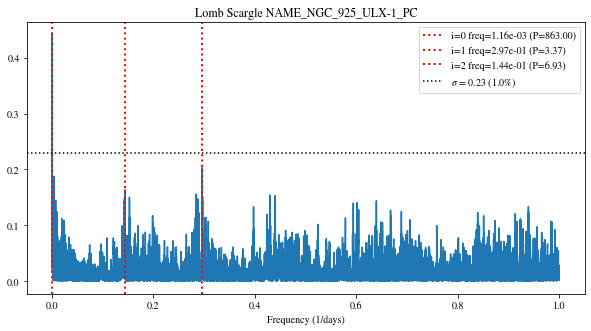

Loading XRT...
simbad_name=NAME_NGC_925_ULX-1 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_NGC_925_ULX-1/USERPROD_45639/lc/hardrat_HARD_PC.csv
df shape=(91, 6) unique_obs=91
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 91 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.44 freq=1.16e-03 p=863.00 fap=0.00
pow=0.22 freq=2.97e-01 p=3.37 fap=0.01
pow=0.16 freq=5.94e-01 p=1.68 fap=0.13
LS success


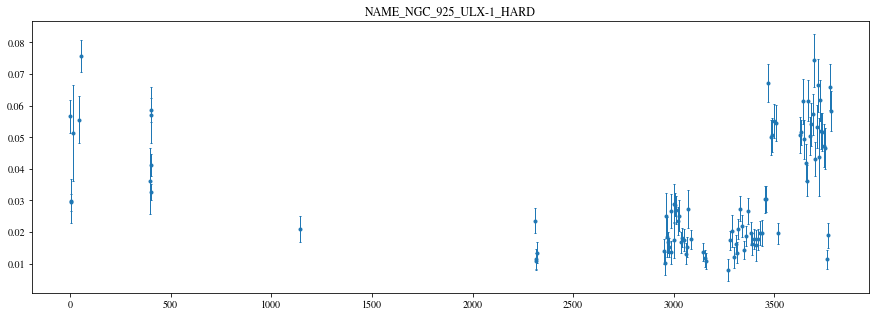

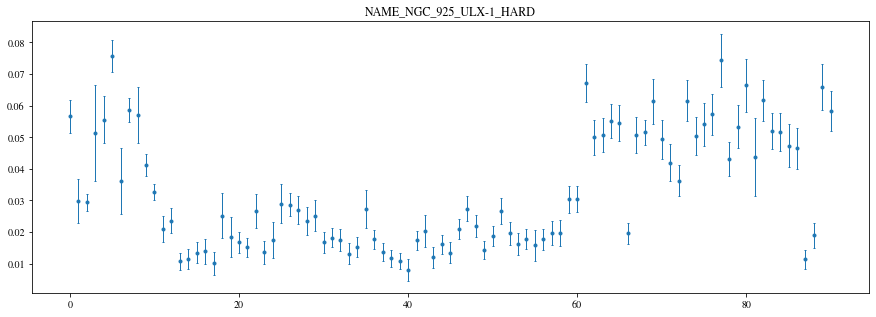

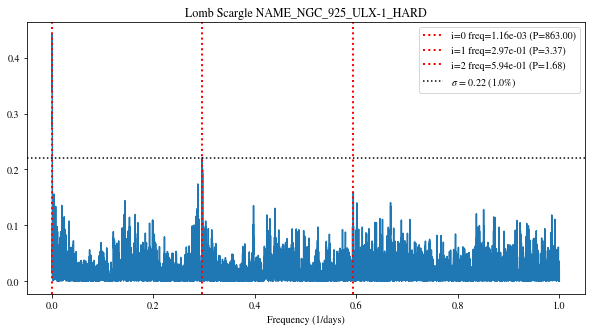

Loading XRT...
simbad_name=NAME_NGC_925_ULX-1 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_NGC_925_ULX-1/USERPROD_45639/lc/hardrat_SOFT_PC.csv
df shape=(91, 6) unique_obs=91
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 91 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.35 freq=1.16e-03 p=863.00 fap=0.00
pow=0.18 freq=6.02e-01 p=1.66 fap=0.13
pow=0.17 freq=4.30e-01 p=2.33 fap=0.16
LS success


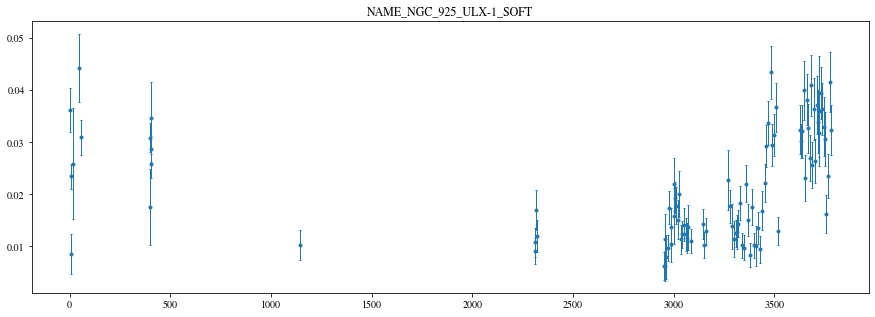

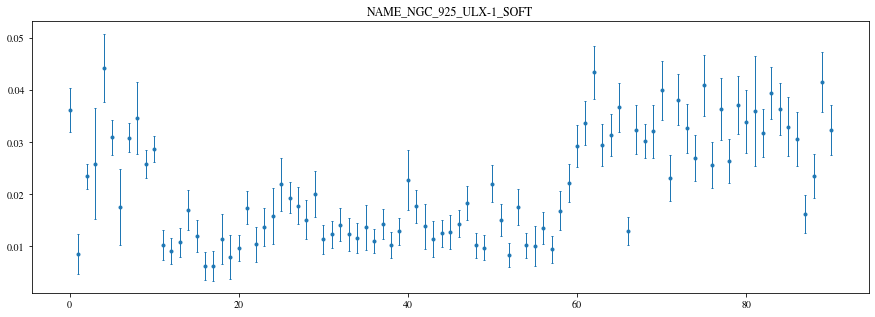

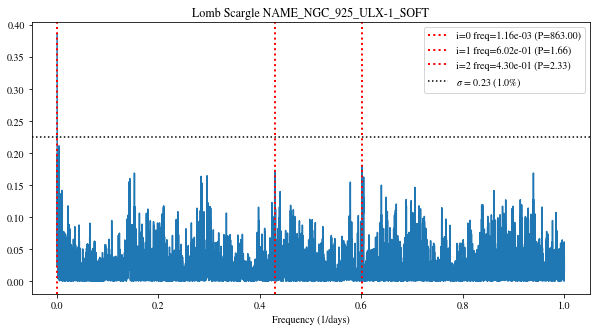

Loading XRT...
simbad_name=NAME_NGC_925_ULX-2 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_NGC_925_ULX-2/USERPROD_45640/lc/curve_PC.csv
df shape=(39, 7) unique_obs=39
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 39 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00


/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


pow=0.43 freq=8.02e-01 p=1.25 fap=0.03
pow=0.41 freq=4.27e-01 p=2.34 fap=0.04
pow=0.40 freq=5.70e-01 p=1.75 fap=0.06
LS success


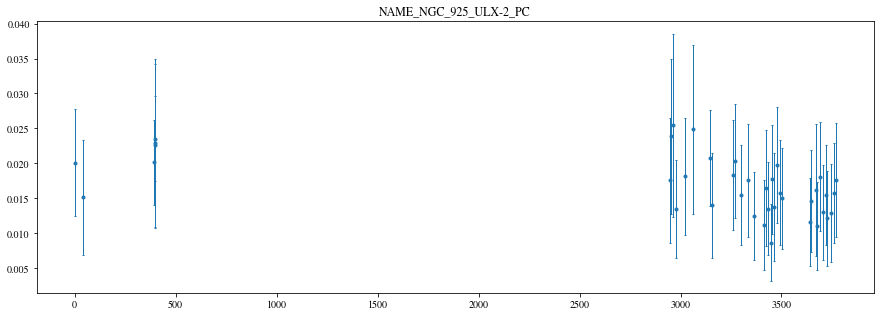

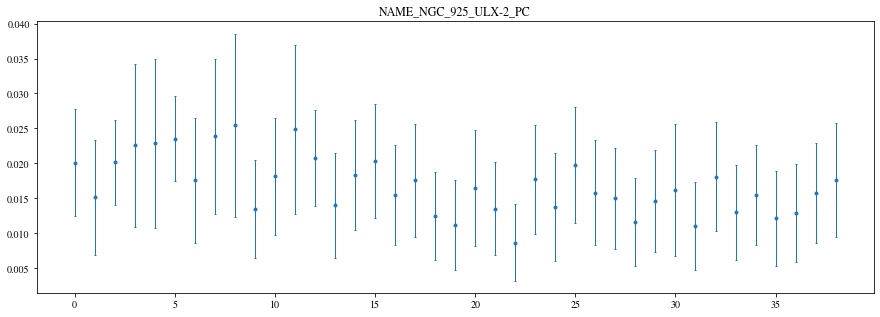

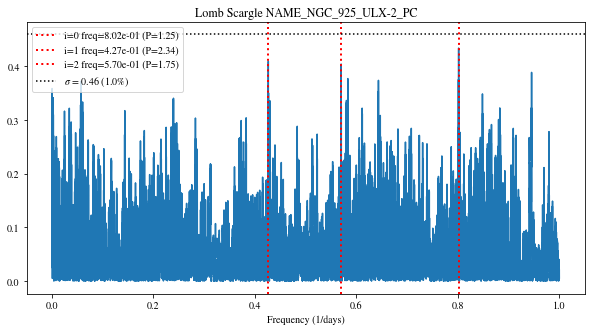

Loading XRT...
simbad_name=NAME_NGC_925_ULX-2 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_NGC_925_ULX-2/USERPROD_45640/lc/hardrat_HARD_PC.csv
df shape=(39, 6) unique_obs=39
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 39 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.49 freq=3.18e-03 p=314.86 fap=0.02
pow=0.48 freq=4.84e-01 p=2.07 fap=0.02
pow=0.47 freq=3.78e-01 p=2.64 fap=0.03
LS success


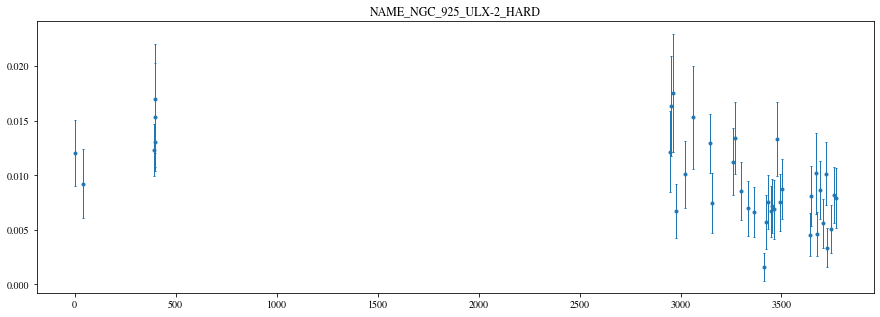

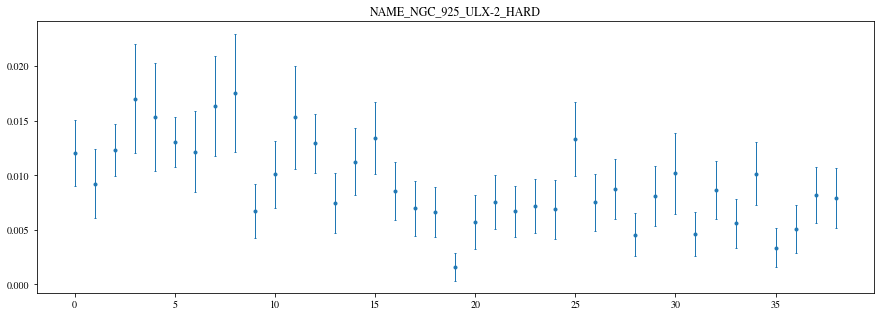

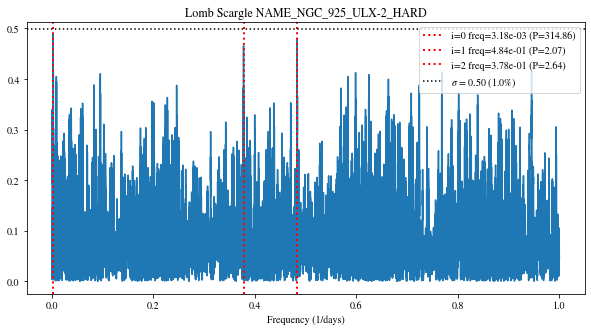

Loading XRT...
simbad_name=NAME_NGC_925_ULX-2 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_NGC_925_ULX-2/USERPROD_45640/lc/hardrat_SOFT_PC.csv
df shape=(39, 6) unique_obs=39
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 39 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00


/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


pow=0.45 freq=2.27e-01 p=4.40 fap=0.05
pow=0.43 freq=8.11e-01 p=1.23 fap=0.08
pow=0.40 freq=1.44e-01 p=6.93 fap=0.17
LS success


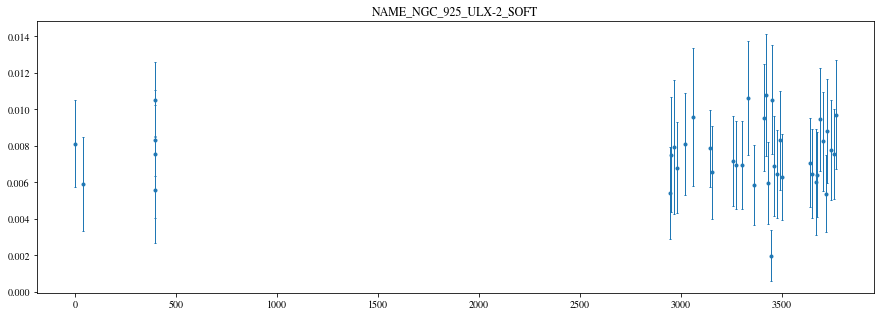

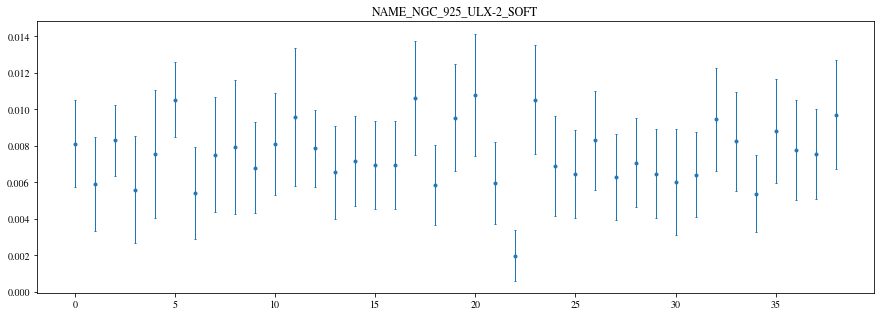

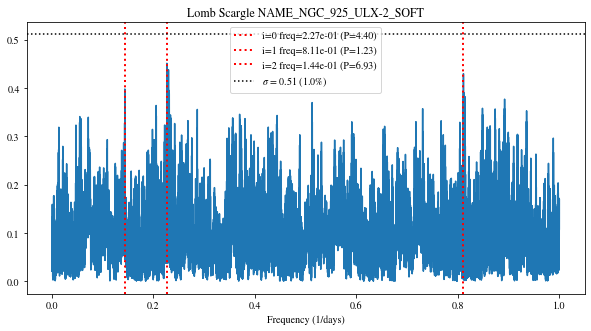

Loading XRT...
simbad_name=SMC_X-3 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/SMC_X-3/USERPROD_47829/lc/curve_PC.csv
df shape=(89, 7) unique_obs=89
XRT FLAG SUMMARY
FLAG_RATE=0 = 2 / 89 (2.25%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.34 freq=1.66e-03 p=600.61 fap=0.00
pow=0.16 freq=4.45e-02 p=22.46 fap=0.19
pow=0.15 freq=5.39e-01 p=1.86 fap=0.28
LS success


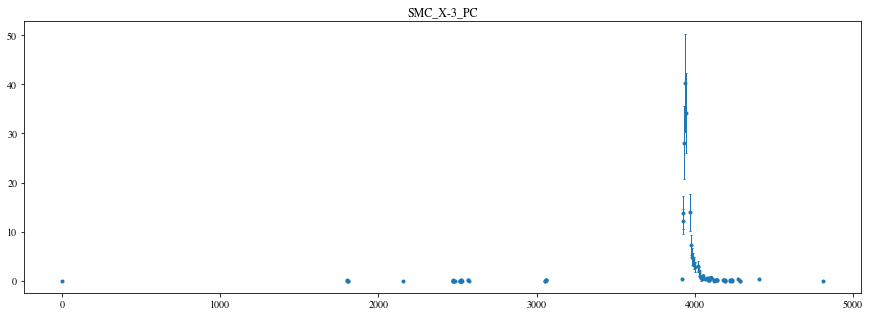

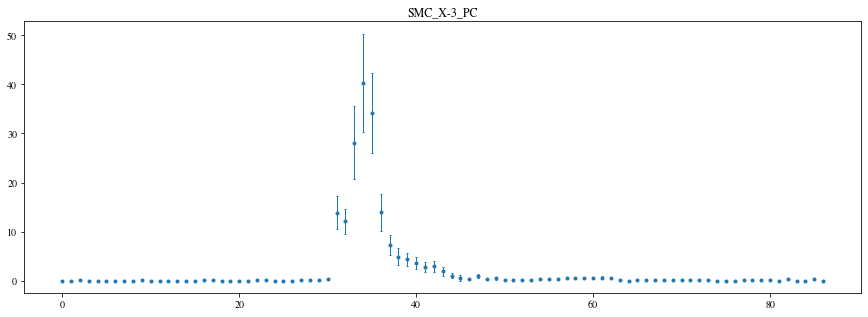

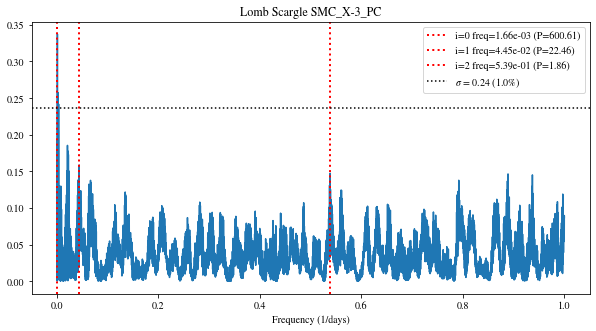

Loading XRT...
simbad_name=SMC_X-3 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/SMC_X-3/USERPROD_47829/lc/hardrat_HARD_PC.csv
df shape=(89, 6) unique_obs=89
XRT FLAG SUMMARY
FLAG_RATE=0 = 2 / 89 (2.25%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.36 freq=1.66e-03 p=600.61 fap=0.00
pow=0.22 freq=4.45e-02 p=22.49 fap=0.18
pow=0.21 freq=8.89e-01 p=1.12 fap=0.24
LS success


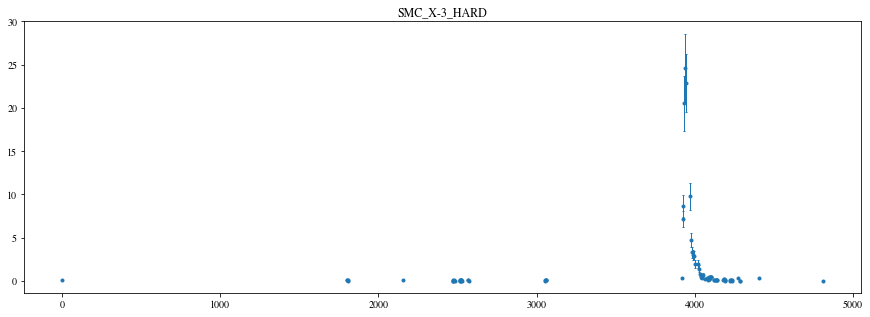

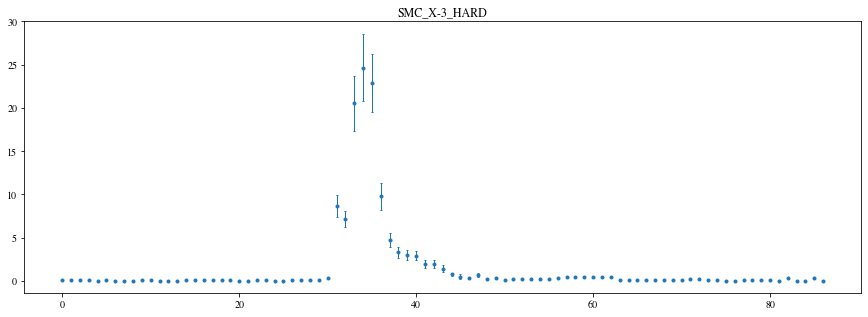

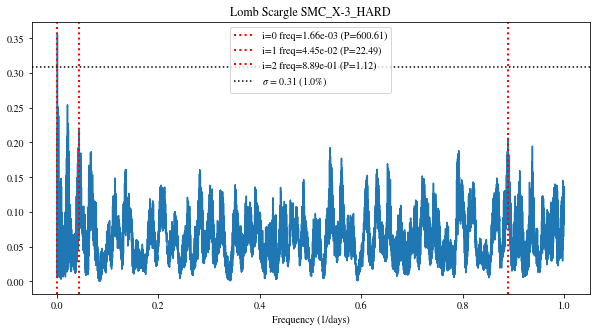

Loading XRT...
simbad_name=SMC_X-3 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/SMC_X-3/USERPROD_47829/lc/hardrat_SOFT_PC.csv
df shape=(89, 6) unique_obs=89
XRT FLAG SUMMARY
FLAG_RATE=0 = 2 / 89 (2.25%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.29 freq=1.62e-03 p=615.99 fap=0.00
pow=0.10 freq=6.32e-02 p=15.82 fap=0.25
pow=0.09 freq=8.64e-01 p=1.16 fap=0.30
LS success


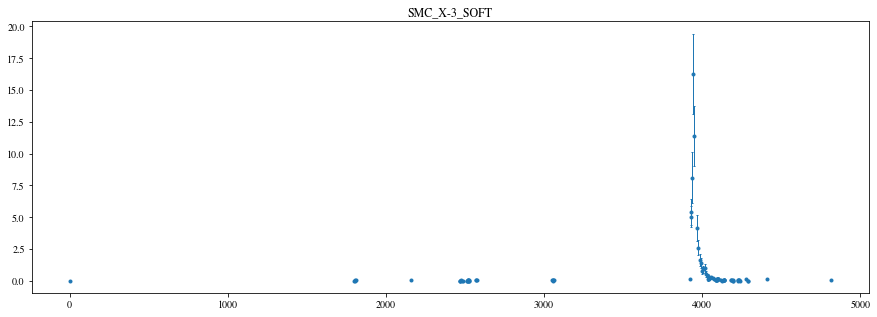

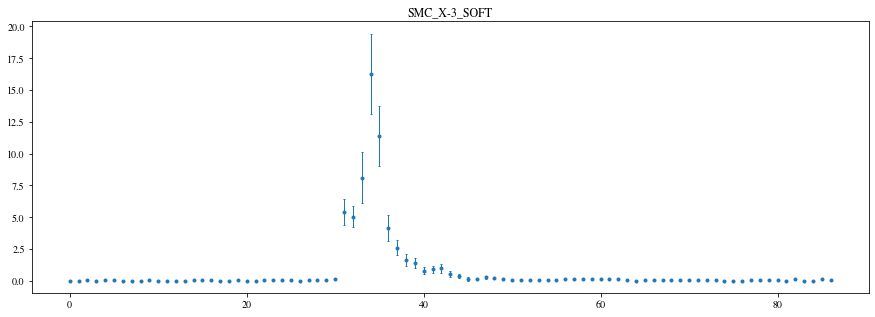

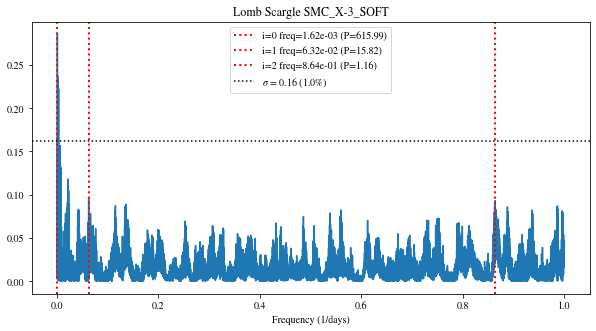

Loading XRT...
simbad_name=SS433 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/SS433/USERPROD_47830/lc/curve_PC.csv
df shape=(22, 7) unique_obs=22
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 22 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.88 freq=9.95e-01 p=1.00 fap=0.00
pow=0.76 freq=9.64e-01 p=1.04 fap=0.02
pow=0.74 freq=3.14e-01 p=3.19 fap=0.02
LS success


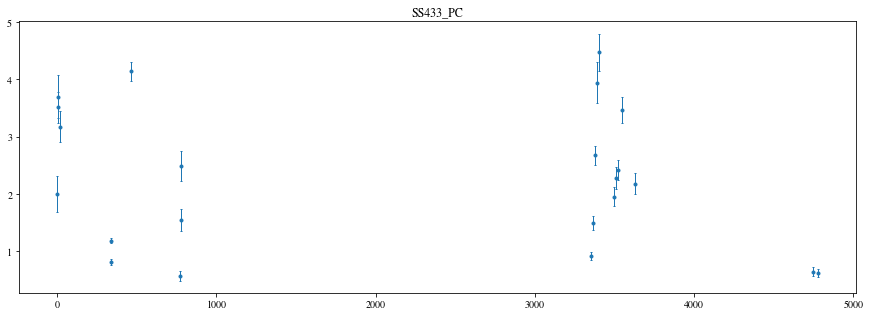

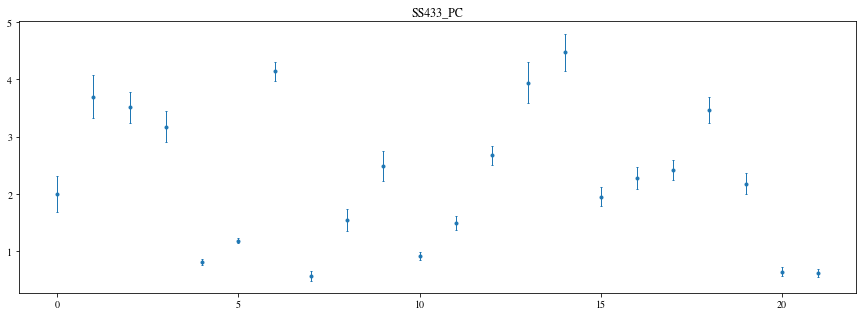

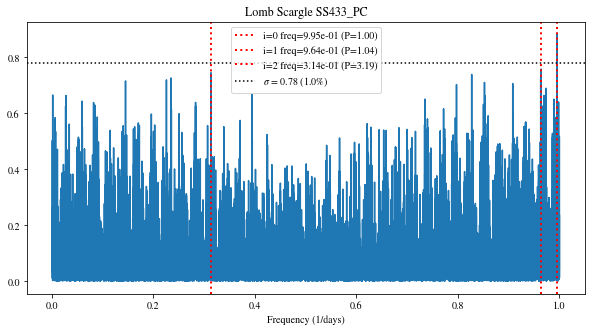

Loading XRT...
simbad_name=SS433 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/SS433/USERPROD_47830/lc/hardrat_HARD_PC.csv
df shape=(22, 6) unique_obs=22
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 22 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.93 freq=9.95e-01 p=1.00 fap=0.00
pow=0.75 freq=8.27e-01 p=1.21 fap=0.02
pow=0.74 freq=9.64e-01 p=1.04 fap=0.02
LS success


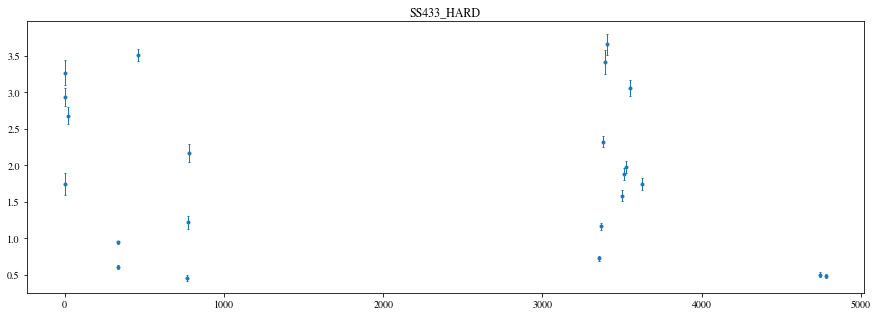

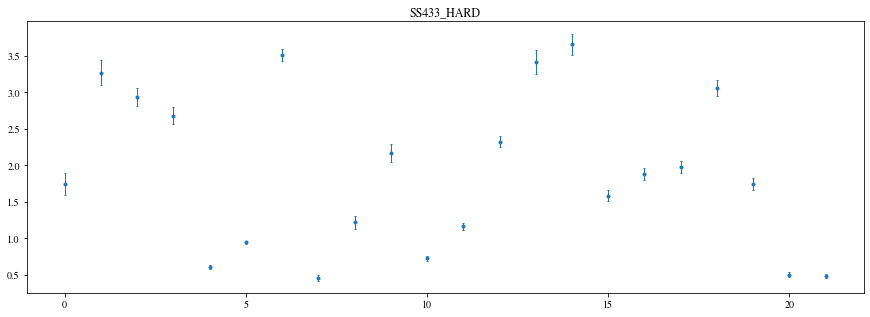

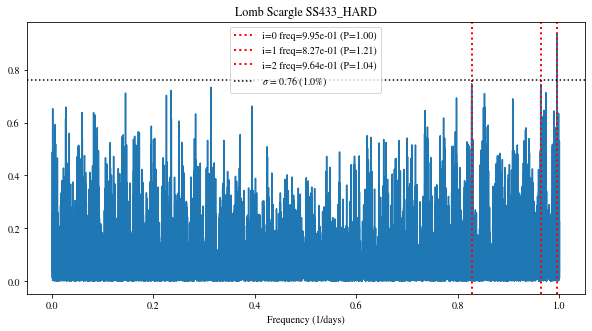

Loading XRT...
simbad_name=SS433 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/SS433/USERPROD_47830/lc/hardrat_SOFT_PC.csv
df shape=(22, 6) unique_obs=22
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 22 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.78 freq=2.26e-01 p=4.43 fap=0.01
pow=0.75 freq=9.64e-01 p=1.04 fap=0.01
pow=0.74 freq=9.08e-01 p=1.10 fap=0.01
LS success


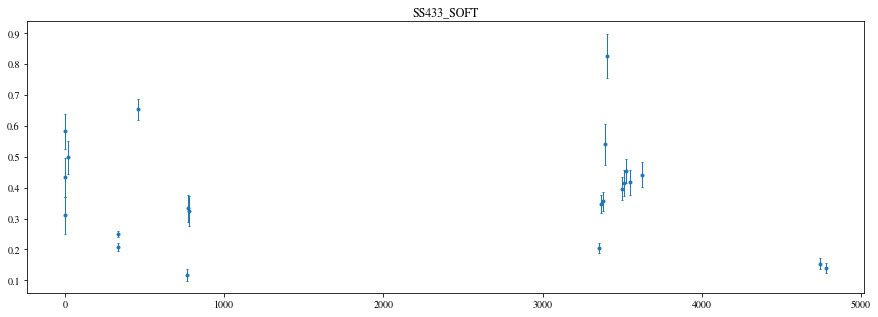

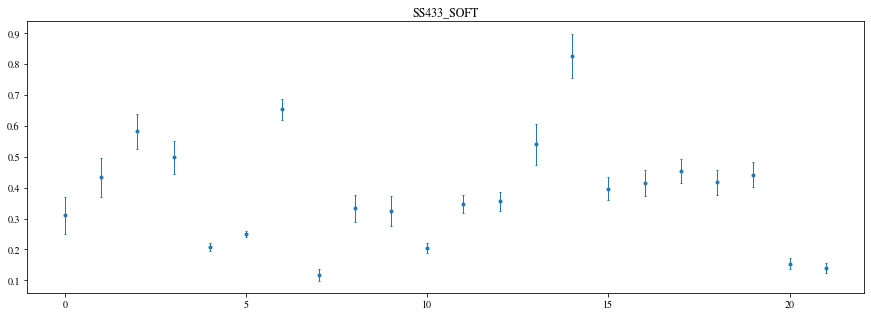

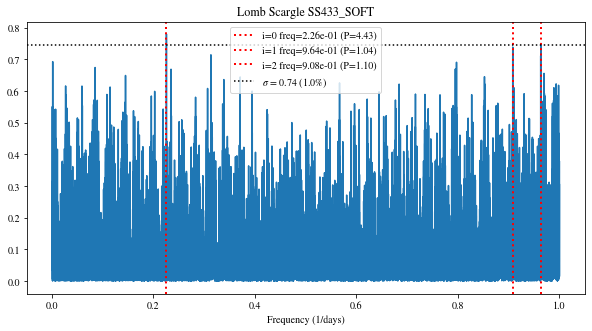

Loading XRT...
simbad_name=SWIFT_J0243.6+6124 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/SWIFT_J0243.6+6124/USERPROD_47831/lc/curve_PC.csv
df shape=(44, 7) unique_obs=44
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 44 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
No peaks found
LS failed


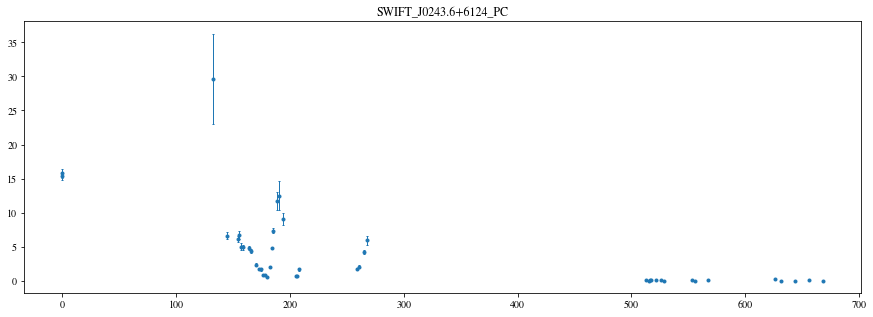

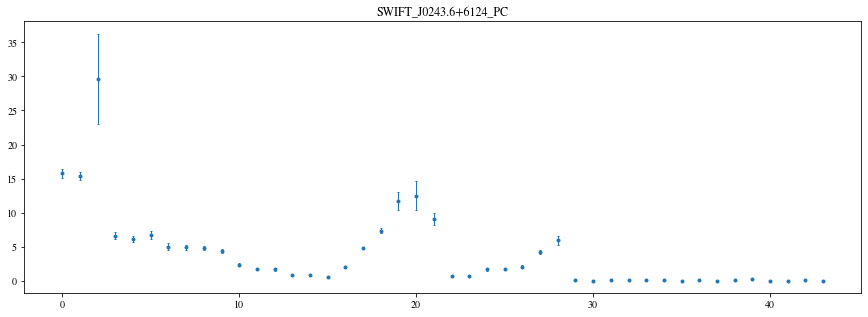

Loading XRT...
simbad_name=SWIFT_J0243.6+6124 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/SWIFT_J0243.6+6124/USERPROD_47831/lc/hardrat_HARD_PC.csv
df shape=(44, 6) unique_obs=44
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 44 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
No peaks found
LS failed


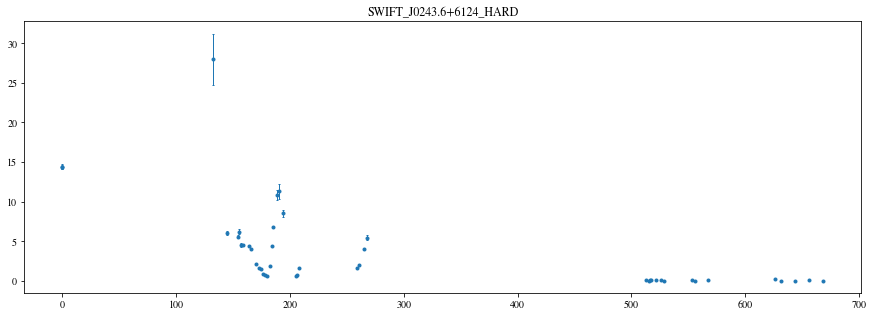

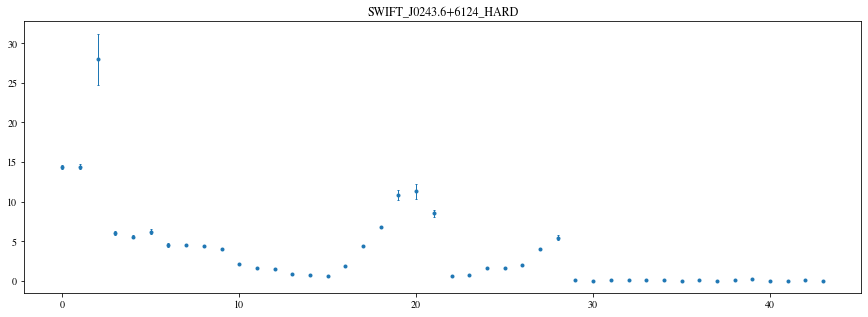

Loading XRT...
simbad_name=SWIFT_J0243.6+6124 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/SWIFT_J0243.6+6124/USERPROD_47831/lc/hardrat_SOFT_PC.csv
df shape=(44, 6) unique_obs=44
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 44 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
No peaks found
LS failed


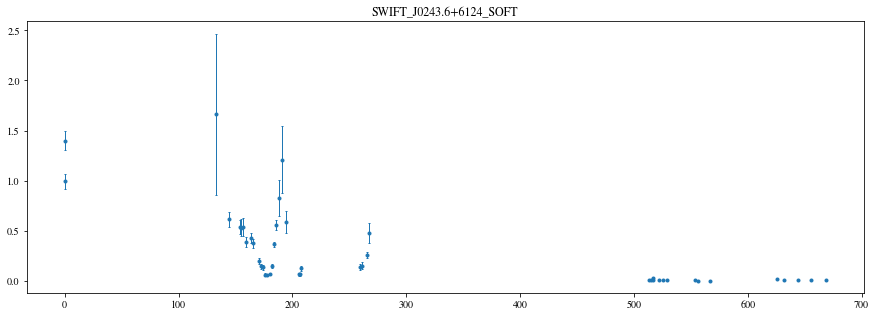

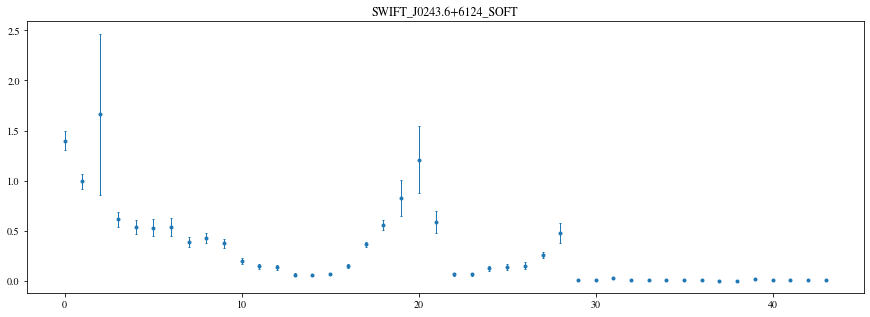

Loading XRT...
simbad_name=NAME_UGC_6456_ULX curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_UGC_6456_ULX/USERPROD_47832/lc/curve_PC.csv
df shape=(12, 7) unique_obs=12
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 12 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.85 freq=8.81e-01 p=1.14 fap=0.02
pow=0.80 freq=6.84e-01 p=1.46 fap=0.05
pow=0.78 freq=4.84e-01 p=2.07 fap=0.06
LS success


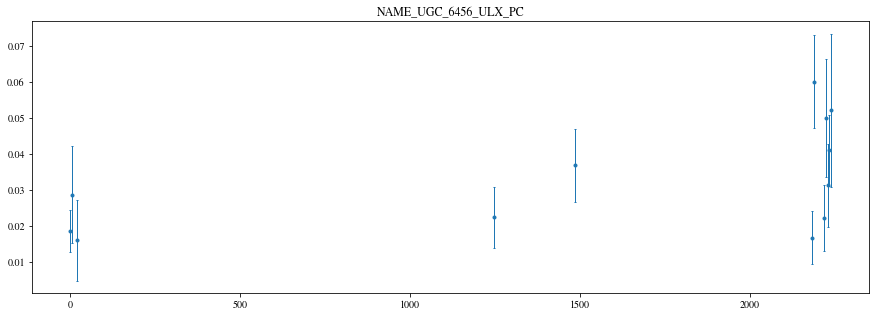

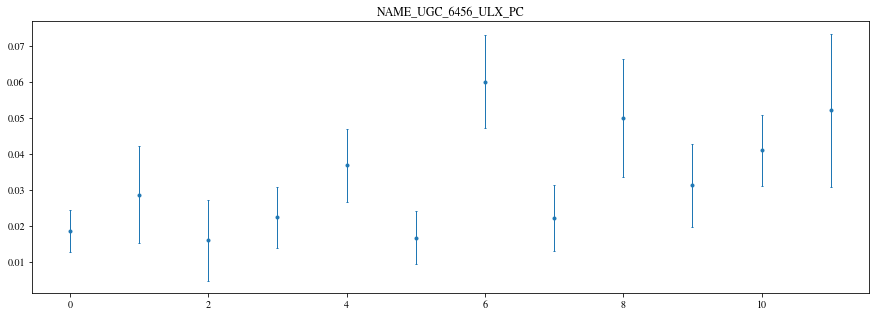

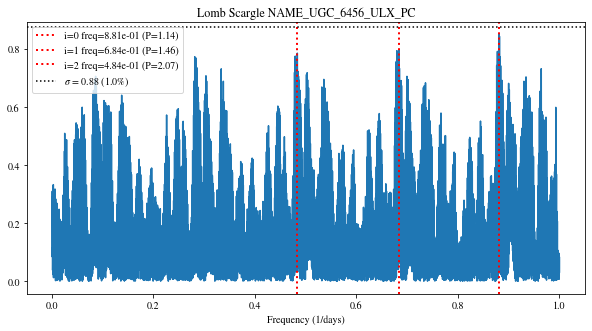

Loading XRT...
simbad_name=NAME_UGC_6456_ULX curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_UGC_6456_ULX/USERPROD_47832/lc/hardrat_HARD_PC.csv
df shape=(12, 6) unique_obs=12
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 12 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.87 freq=8.76e-01 p=1.14 fap=0.01
pow=0.73 freq=6.77e-01 p=1.48 fap=0.09
pow=0.69 freq=4.46e-01 p=2.24 fap=0.12
LS success


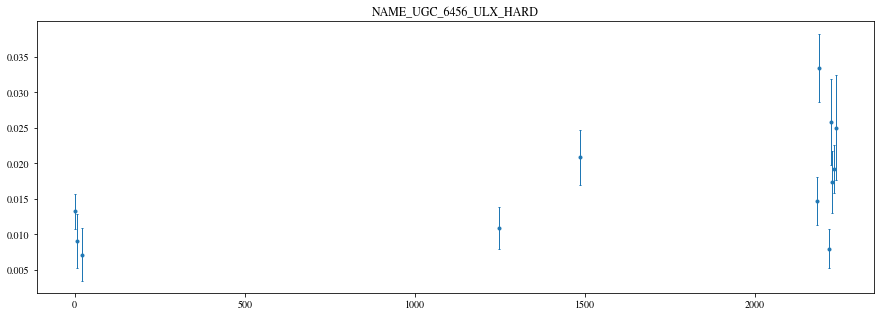

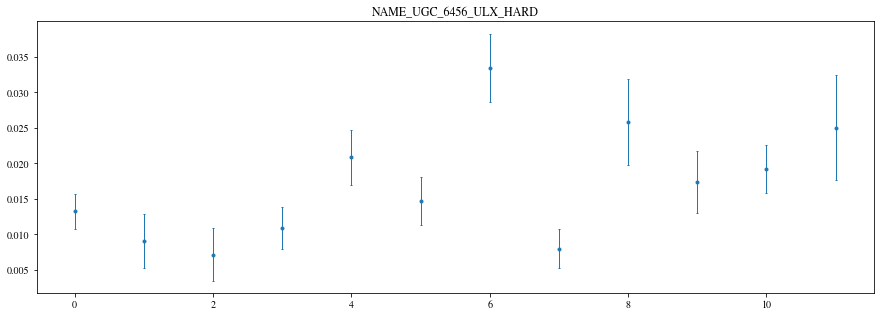

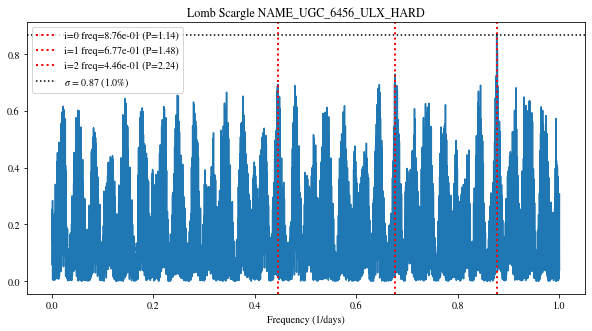

Loading XRT...
simbad_name=NAME_UGC_6456_ULX curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_UGC_6456_ULX/USERPROD_47832/lc/hardrat_SOFT_PC.csv
df shape=(12, 6) unique_obs=12
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 12 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.94 freq=7.03e-01 p=1.42 fap=0.00
pow=0.93 freq=3.05e-01 p=3.28 fap=0.01
pow=0.91 freq=5.06e-01 p=1.98 fap=0.02
LS success


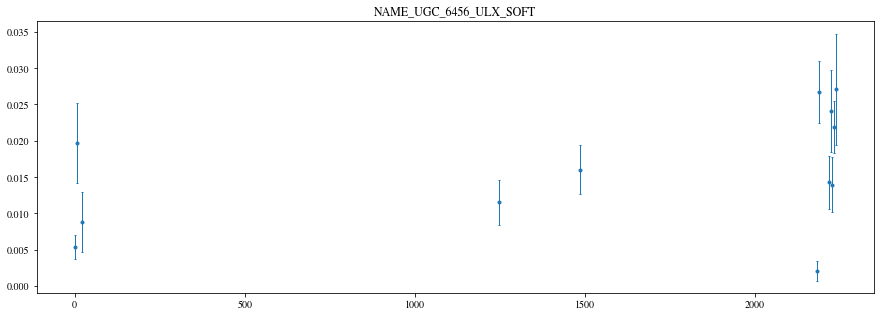

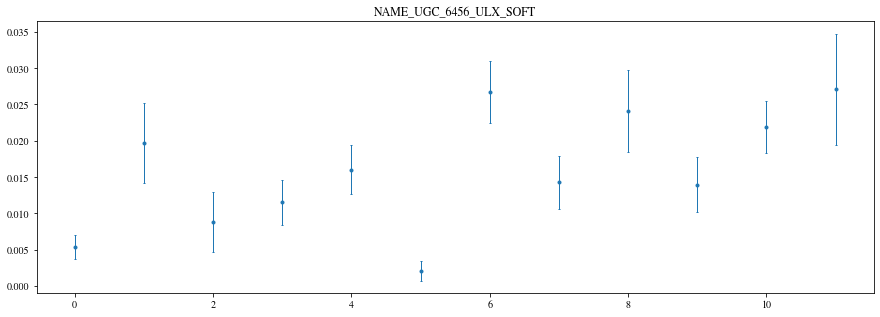

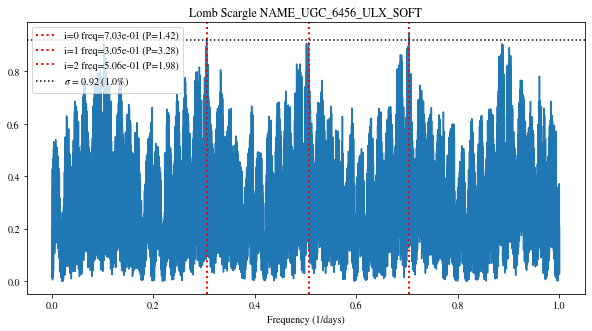

Loading XRT...
simbad_name=NOVA_Cyg_1989 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NOVA_Cyg_1989/USERPROD_47833/lc/curve_PC.csv
df shape=(129, 7) unique_obs=129
XRT FLAG SUMMARY
FLAG_RATE=0 = 3 / 129 (2.33%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.25 freq=4.35e-03 p=230.06 fap=0.00
pow=0.08 freq=5.07e-01 p=1.97 fap=0.10
pow=0.06 freq=7.57e-01 p=1.32 fap=0.31
LS success


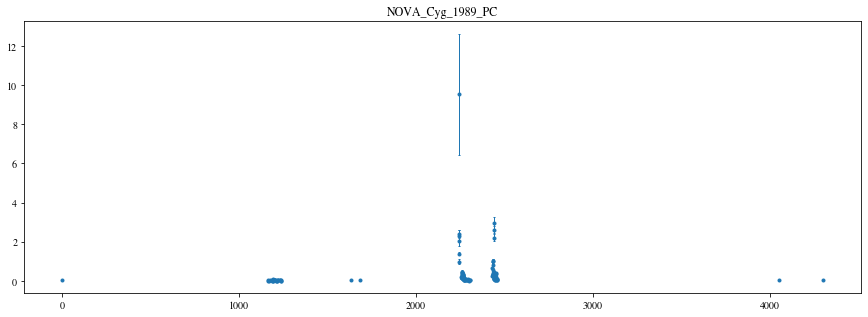

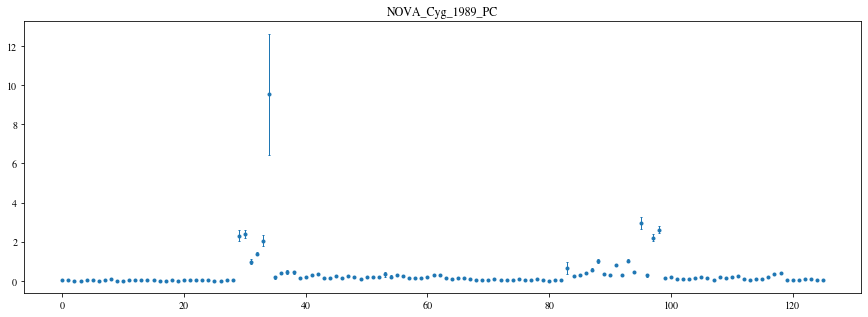

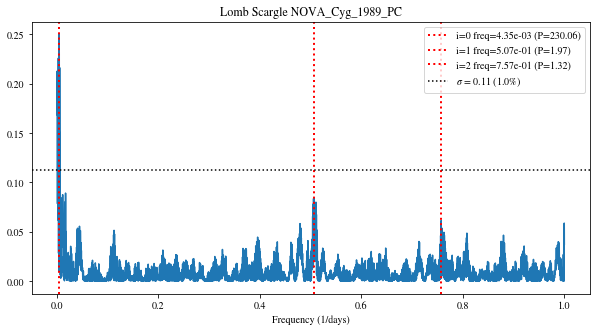

Loading XRT...
simbad_name=NOVA_Cyg_1989 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NOVA_Cyg_1989/USERPROD_47833/lc/hardrat_HARD_PC.csv
df shape=(100, 6) unique_obs=100
XRT FLAG SUMMARY
FLAG_RATE=0 = 3 / 100 (3.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.31 freq=1.14e-02 p=87.87 fap=0.00
pow=0.09 freq=2.44e-01 p=4.09 fap=0.18
pow=0.09 freq=8.82e-01 p=1.13 fap=0.25
LS success


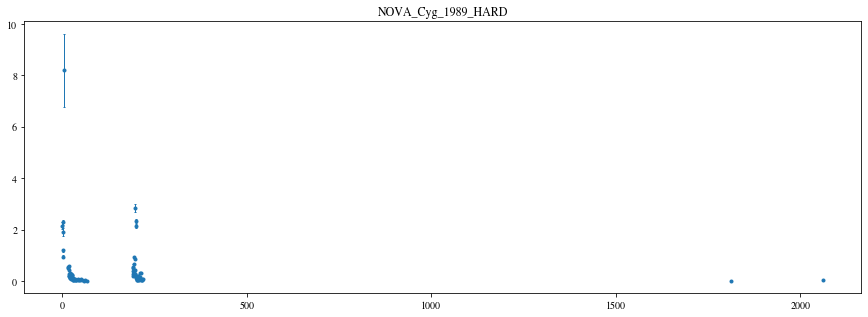

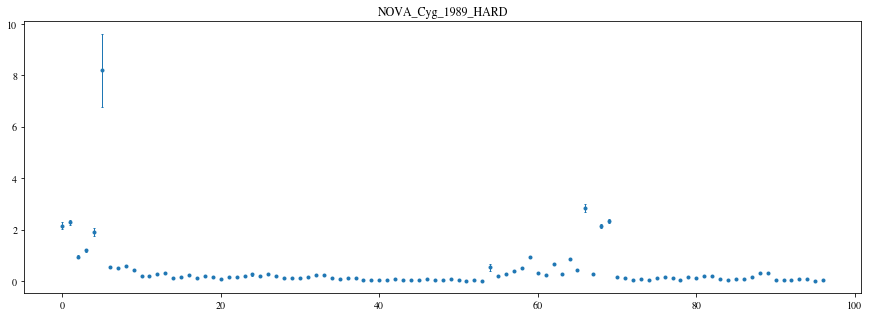

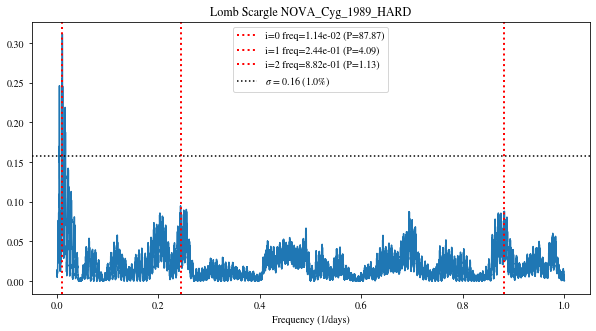

Loading XRT...
simbad_name=NOVA_Cyg_1989 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NOVA_Cyg_1989/USERPROD_47833/lc/hardrat_SOFT_PC.csv
df shape=(100, 6) unique_obs=100
XRT FLAG SUMMARY
FLAG_RATE=0 = 3 / 100 (3.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
No peaks found
LS failed


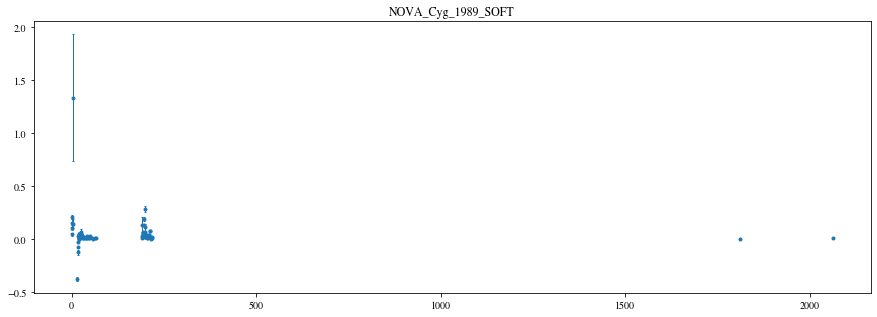

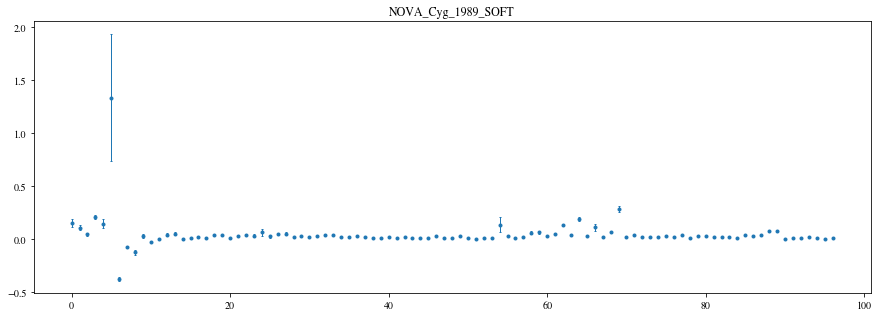

Loading XRT...
simbad_name=[LB2005]_NGC_5236_X11 curve=PC pandas=False
Could not load [LB2005]_NGC_5236_X11 PC
Loading XRT...
simbad_name=[LB2005]_NGC_5236_X11 curve=HARD pandas=False
Could not load [LB2005]_NGC_5236_X11 HARD
Loading XRT...
simbad_name=[LB2005]_NGC_5236_X11 curve=SOFT pandas=False
Could not load [LB2005]_NGC_5236_X11 SOFT
Loading XRT...
simbad_name=NAME_M83_ULX-1 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_M83_ULX-1/USERPROD_48180/lc/curve_PC.csv
df shape=(38, 7) unique_obs=38
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 38 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.63 freq=1.95e-03 p=511.56 fap=0.00
pow=0.46 freq=2.86e-01 p=3.50 fap=0.01
pow=0.42 freq=3.29e-01 p=3.04 fap=0.01
LS success


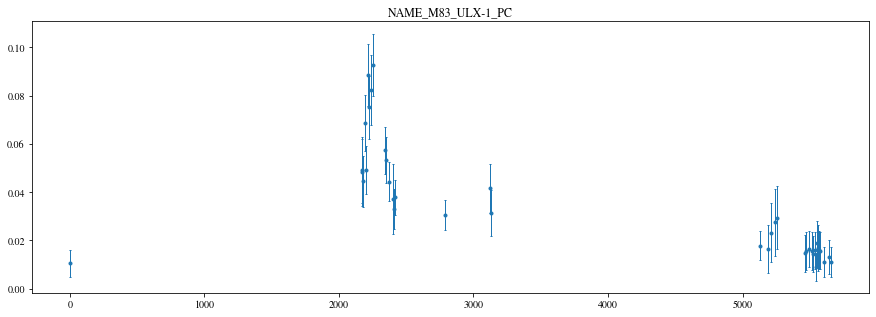

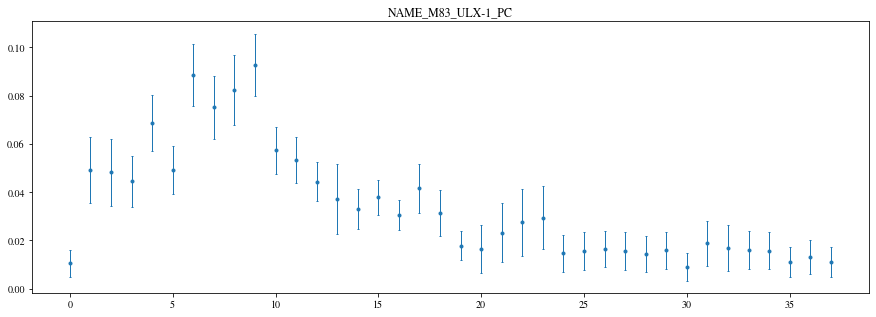

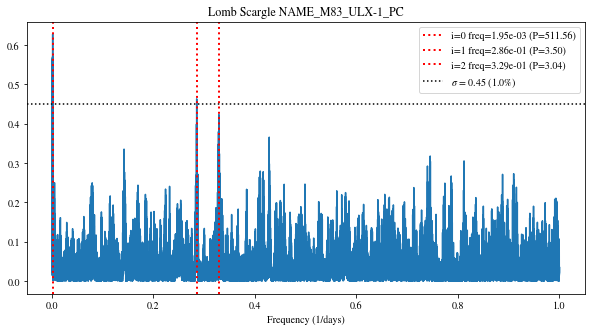

Loading XRT...
simbad_name=NAME_M83_ULX-1 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_M83_ULX-1/USERPROD_48180/lc/hardrat_HARD_PC.csv
df shape=(38, 6) unique_obs=38
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 38 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.73 freq=1.99e-03 p=502.47 fap=0.00
pow=0.58 freq=3.30e-01 p=3.03 fap=0.02
pow=0.54 freq=4.18e-01 p=2.40 fap=0.05
LS success


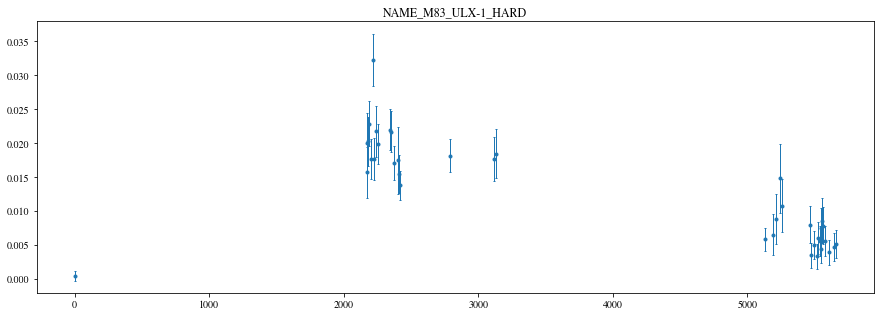

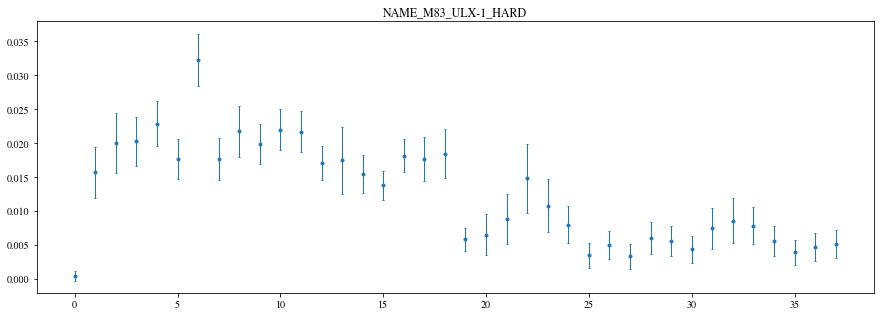

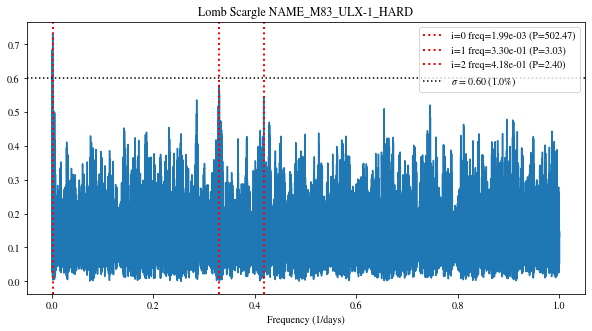

Loading XRT...
simbad_name=NAME_M83_ULX-1 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_M83_ULX-1/USERPROD_48180/lc/hardrat_SOFT_PC.csv
df shape=(38, 6) unique_obs=38
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 38 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.49 freq=1.07e-03 p=933.95 fap=0.00
pow=0.38 freq=2.86e-01 p=3.50 fap=0.01
pow=0.36 freq=4.28e-01 p=2.33 fap=0.01
LS success


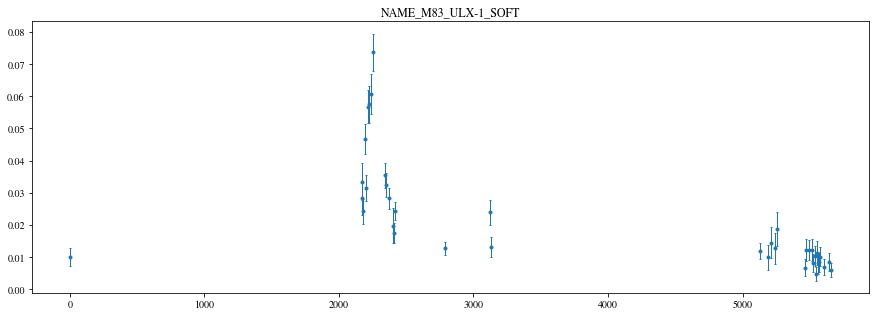

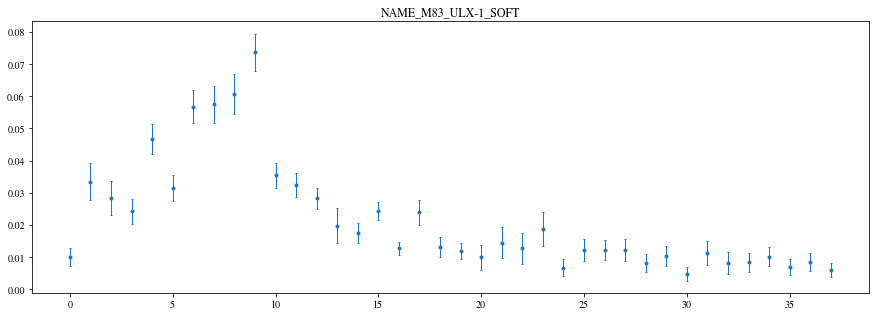

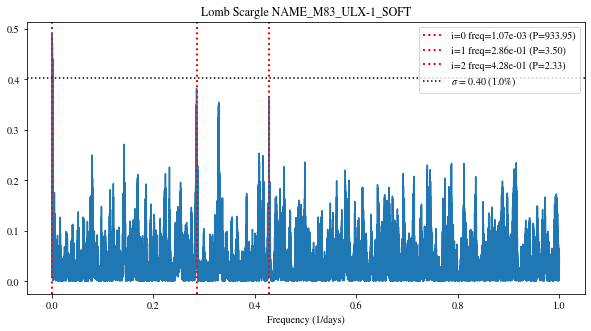

Loading XRT...
simbad_name=NAME_NGC_1365-X1 curve=PC pandas=False
Could not load NAME_NGC_1365-X1 PC
Loading XRT...
simbad_name=NAME_NGC_1365-X1 curve=HARD pandas=False
Could not load NAME_NGC_1365-X1 HARD
Loading XRT...
simbad_name=NAME_NGC_1365-X1 curve=SOFT pandas=False
Could not load NAME_NGC_1365-X1 SOFT
Loading XRT...
simbad_name=[SK2009]_X2 curve=PC pandas=False
Could not load [SK2009]_X2 PC
Loading XRT...
simbad_name=[SK2009]_X2 curve=HARD pandas=False
Could not load [SK2009]_X2 HARD
Loading XRT...
simbad_name=[SK2009]_X2 curve=SOFT pandas=False
Could not load [SK2009]_X2 SOFT
Loading XRT...
simbad_name=NAME_IC_10_X-1 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_IC_10_X-1/USERPROD_48341/lc/curve_PC.csv
df shape=(103, 7) unique_obs=103
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 103 (0.97%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.44 freq=6.89e-01 p=1.45 fap=0.00
pow=0.33 freq=7.87e-03 p=127.08 fap=0.01

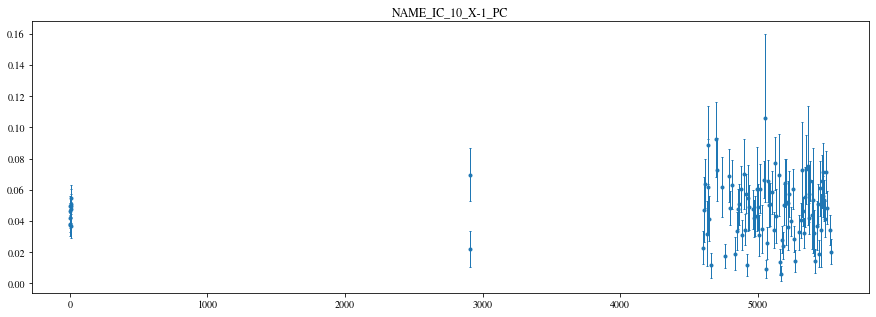

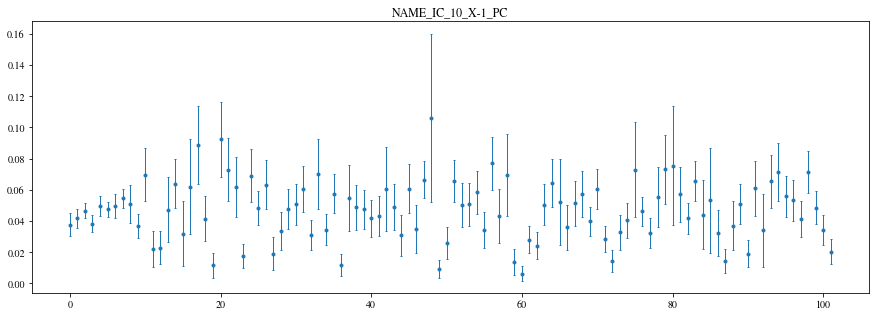

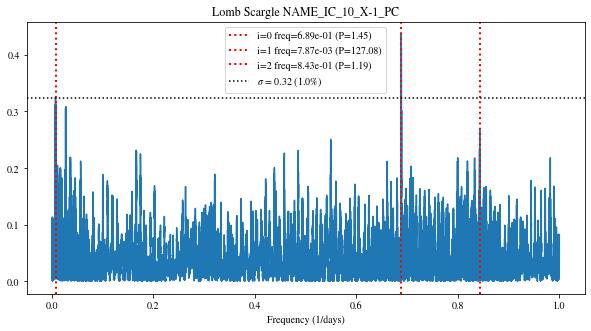

Loading XRT...
simbad_name=NAME_IC_10_X-1 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_IC_10_X-1/USERPROD_48341/lc/hardrat_HARD_PC.csv
df shape=(103, 6) unique_obs=103
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 103 (0.97%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.41 freq=6.89e-01 p=1.45 fap=0.00
pow=0.35 freq=2.80e-02 p=35.71 fap=0.01
pow=0.31 freq=8.43e-01 p=1.19 fap=0.04
LS success


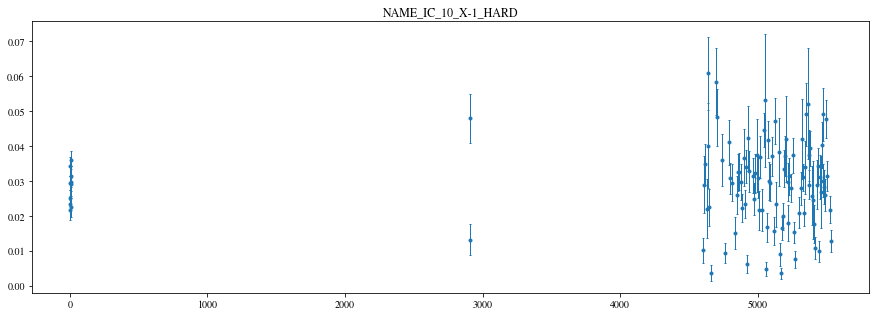

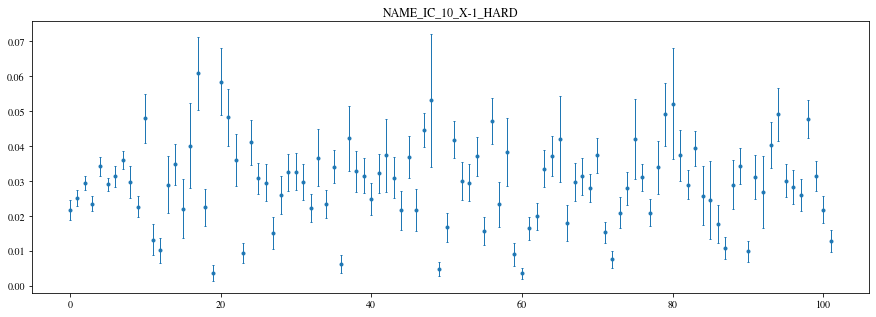

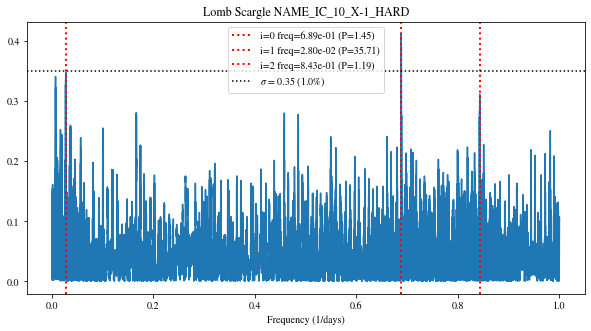

Loading XRT...
simbad_name=NAME_IC_10_X-1 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/NAME_IC_10_X-1/USERPROD_48341/lc/hardrat_SOFT_PC.csv
df shape=(103, 6) unique_obs=103
XRT FLAG SUMMARY
FLAG_RATE=0 = 1 / 103 (0.97%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.41 freq=6.89e-01 p=1.45 fap=0.00
pow=0.28 freq=8.05e-03 p=124.23 fap=0.01
pow=0.23 freq=8.00e-01 p=1.25 fap=0.09
LS success


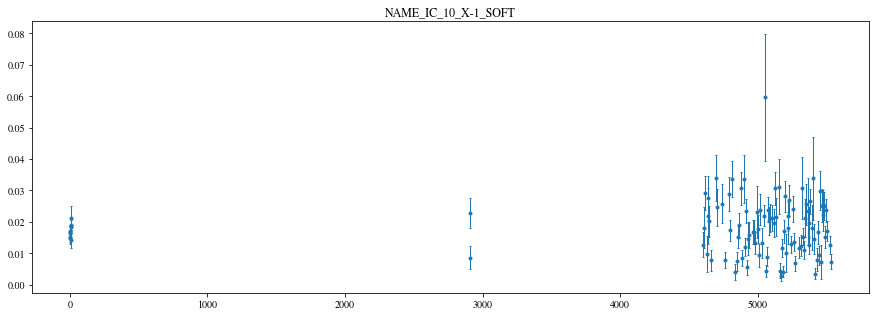

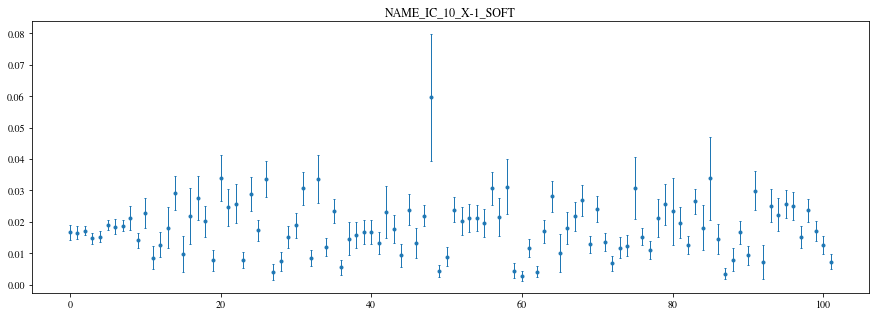

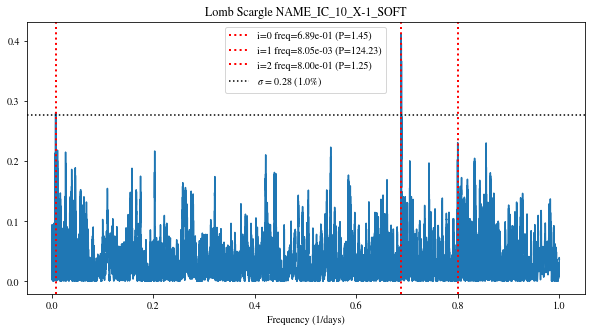

Loading XRT...
simbad_name=[WMR2006]_NGC4945_XMM1 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[WMR2006]_NGC4945_XMM1/USERPROD_48342/lc/curve_PC.csv
df shape=(50, 7) unique_obs=50
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 50 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00


/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


pow=0.41 freq=9.22e-01 p=1.08 fap=0.01
pow=0.39 freq=1.54e-02 p=65.00 fap=0.02
pow=0.36 freq=1.68e-01 p=5.95 fap=0.05
LS success


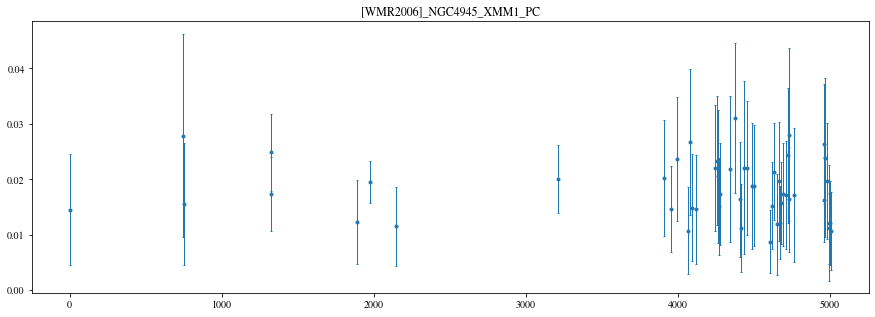

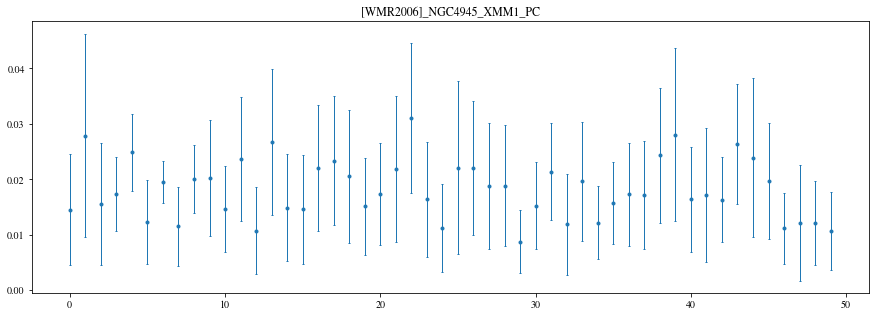

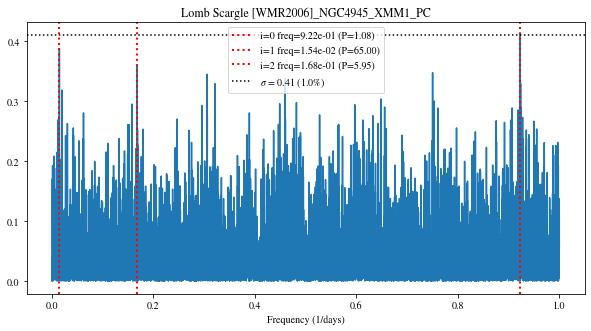

Loading XRT...
simbad_name=[WMR2006]_NGC4945_XMM1 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[WMR2006]_NGC4945_XMM1/USERPROD_48342/lc/hardrat_HARD_PC.csv
df shape=(50, 6) unique_obs=50
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 50 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.46 freq=3.22e-01 p=3.11 fap=0.01
pow=0.40 freq=6.49e-01 p=1.54 fap=0.03
pow=0.39 freq=9.22e-01 p=1.08 fap=0.03
LS success


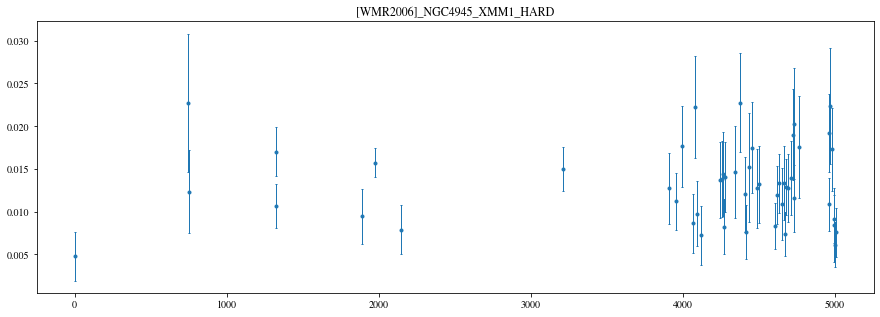

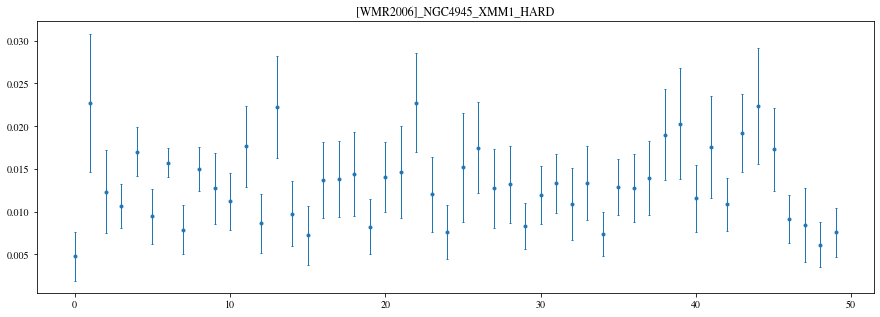

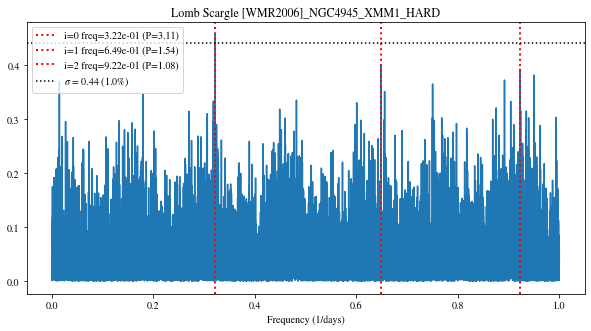

Loading XRT...
simbad_name=[WMR2006]_NGC4945_XMM1 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[WMR2006]_NGC4945_XMM1/USERPROD_48342/lc/hardrat_SOFT_PC.csv
df shape=(50, 6) unique_obs=50
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 50 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00


/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


pow=3831.00 freq=8.48e-01 p=1.18 fap=0.00
pow=593.09 freq=8.73e-01 p=1.15 fap=0.00
pow=377.65 freq=9.72e-01 p=1.03 fap=0.00
LS success


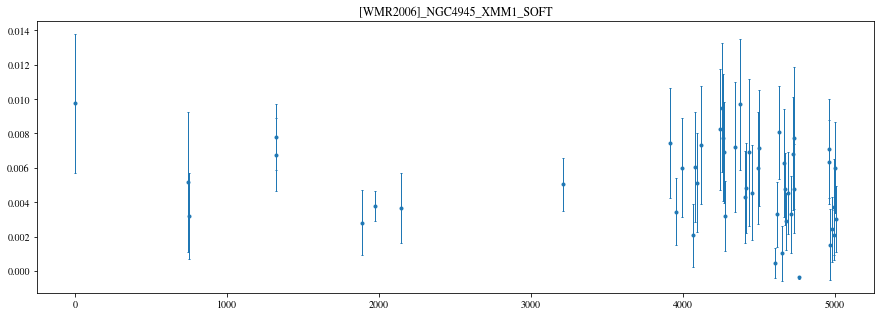

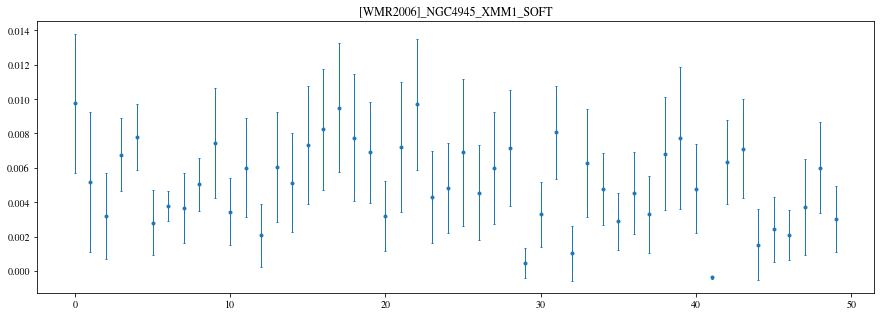

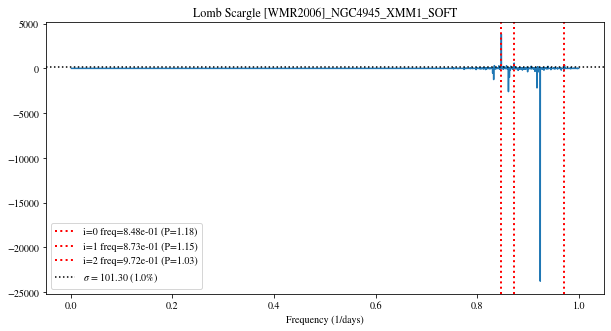

Loading XRT...
simbad_name=[LM2005]_NGC_4559_ULX1 curve=PC pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_4559_ULX1/USERPROD_50436/lc/curve_PC.csv
df shape=(89, 7) unique_obs=89
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 89 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.31 freq=1.40e-01 p=7.16 fap=0.00
pow=0.28 freq=4.39e-03 p=227.94 fap=0.00
pow=0.22 freq=2.90e-01 p=3.45 fap=0.00
LS success


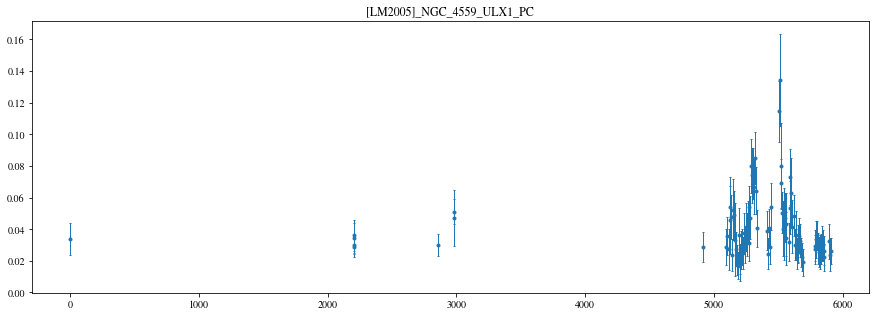

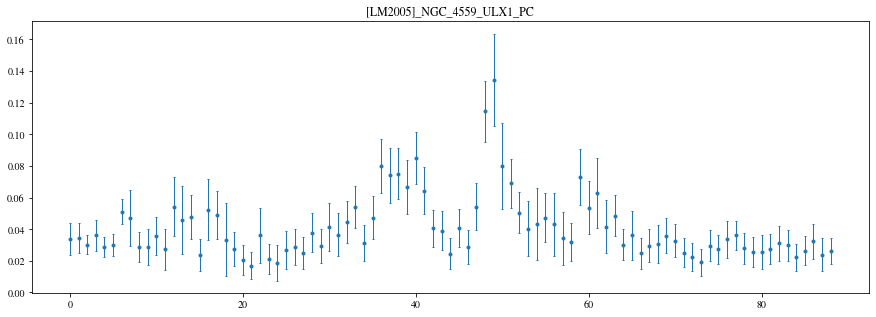

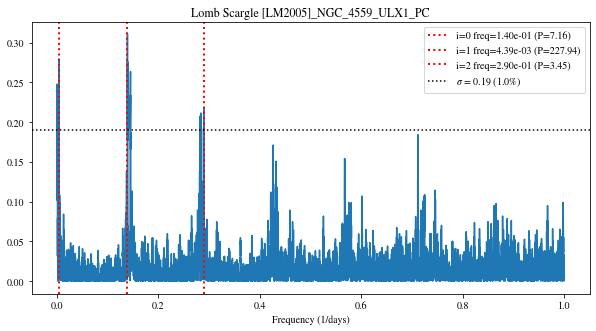

Loading XRT...
simbad_name=[LM2005]_NGC_4559_ULX1 curve=HARD pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_4559_ULX1/USERPROD_50436/lc/hardrat_HARD_PC.csv
df shape=(89, 6) unique_obs=89
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 89 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.31 freq=4.22e-01 p=2.37 fap=0.00
pow=0.27 freq=4.29e-03 p=233.34 fap=0.02
pow=0.27 freq=2.90e-01 p=3.45 fap=0.02
LS success


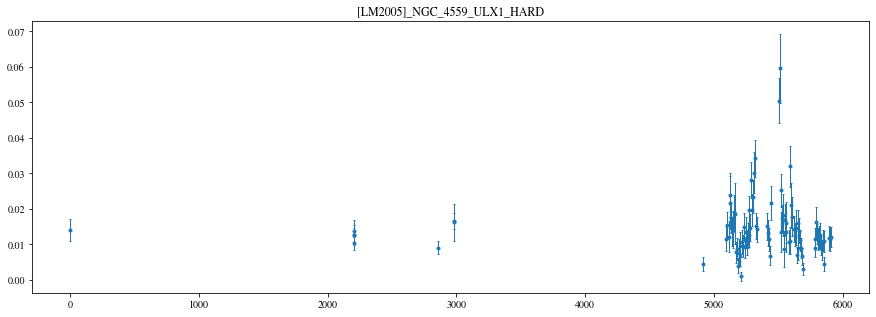

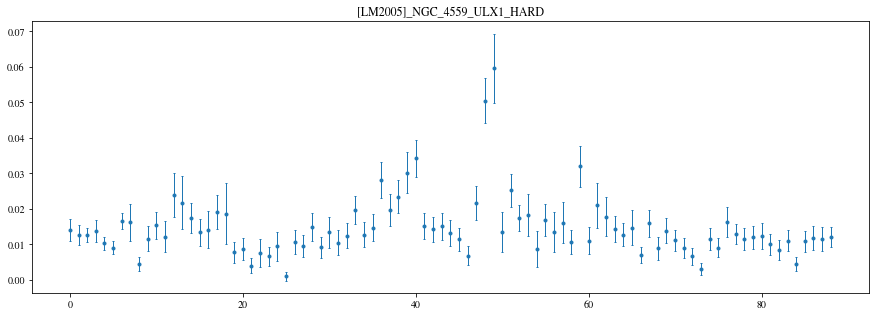

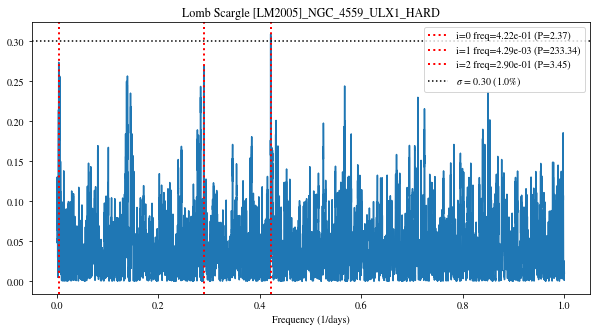

Loading XRT...
simbad_name=[LM2005]_NGC_4559_ULX1 curve=SOFT pandas=False
Loading file: /mnt/d/anticorr_data/UKSSDC/[LM2005]_NGC_4559_ULX1/USERPROD_50436/lc/hardrat_SOFT_PC.csv
df shape=(89, 6) unique_obs=89
XRT FLAG SUMMARY
FLAG_RATE=0 = 0 / 89 (0.00%)
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.31 freq=1.40e-01 p=7.16 fap=0.00
pow=0.26 freq=4.39e-03 p=227.94 fap=0.00
pow=0.25 freq=4.26e-01 p=2.35 fap=0.00
LS success


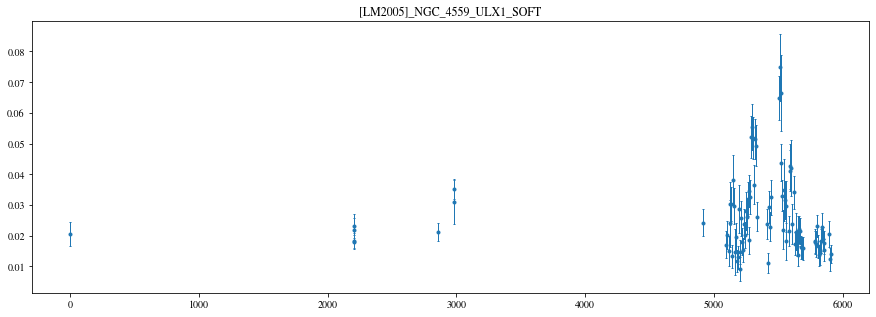

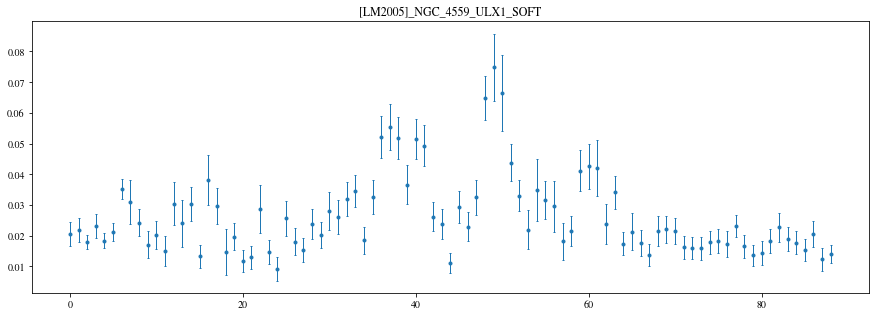

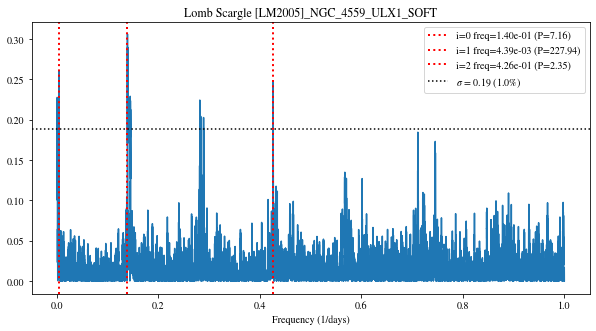

In [5]:
all_res = []
for simbad_name, local_name in source_names_dict.items():
    readable_name = source_names_readable[simbad_name]
    simbad_name_glob = simbad_name.translate(str.maketrans(to_replace)) # Used to fix globbing square brackets
    for curve in ['PC', 'HARD', 'SOFT']:
        try:
            tab = load_xrt(simbad_name, curve=curve, pandas=False)
        except:
            print(f'Could not load {simbad_name} {curve}')
            continue
        lc = LightCurve(tab['MJD_0'], tab['RATE'], tab['RATE_ERR'])
        lc.set_name(f'{simbad_name}_{curve}')
        try:
            res = lc.analyse()
        except:
            res = {}
        res['simbad_name'] = simbad_name
        res['readable_name'] = readable_name
        
        res['curve'] = curve
        lc.plot_all()
        all_res.append(res)


In [6]:
lc.ls

In [7]:
from scipy.signal import find_peaks
distance = int(len(lc.ls.frequency) * 0.025)
find_peaks(lc.ls.power, height=lc.ls.z_fal.value/2, distance=distance)

(array([  100,  4093,  7079,  8300, 12559, 13734, 16731, 17738, 20978,
        21988, 26249, 27433, 28518, 29424]),
 {'peak_heights': array([0.26102776, 0.3062148 , 0.09706525, 0.22437858, 0.24656361,
         0.09892952, 0.13494905, 0.12711402, 0.18457091, 0.17316043,
         0.10924643, 0.09521849, 0.09713314, 0.09757253])})

In [8]:
df = pd.DataFrame(all_res)
df.to_csv('../tables/xrt_lc_analysis.csv')
df.round(2).to_latex('../tables/xrt_lc_analysis.tex',
           columns=['readable_name', 'curve', 'ndata', 'mean', 'std', 'sigma_xs', 'F_var', 'kurtosis', 'skew', 't_diff_mean'],
           index=False)
df

/tmp/ipykernel_1690/3236388512.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.round(2).to_latex('../tables/xrt_lc_analysis.tex',


ndata      mean       std       max       min     max/min      sigma_xs  \
0    144.0  0.022445  0.009664  0.059724  0.000262  228.375970 -2.685011e-05   
1    144.0  0.001578  0.001481  0.007323 -0.000741   -9.882591 -2.694435e-07   
2    144.0  0.020886  0.009420  0.052401  0.000560   93.573214  6.148054e-05   
3    689.0  0.281299  0.115421  0.706100  0.091247    7.738302  1.046788e-02   
4    683.0  0.163085  0.075120  0.446610  0.052214    8.553453  5.253991e-03   
..     ...       ...       ...       ...       ...         ...           ...   
97    50.0  0.013173  0.004519  0.022763  0.004756    4.786165  1.948679e-06   
98    50.0  0.005153  0.002399  0.009749 -0.000364  -26.782967 -1.670723e-06   
99    89.0  0.040588  0.019975  0.134378  0.016981    7.913477  2.127087e-04   
100   89.0  0.014570  0.008558  0.059505  0.001028   57.884241  5.694782e-05   
101   89.0  0.026166  0.012964  0.074851  0.009266    8.078027  1.392864e-04   

        F_var   kurtosis  von_neumann  ...  ls_freq[1]  ls_period[1]  \
0         NaN   1.207881     1.314407  ...    0.272594      3.668466   
1         NaN   1.138655     1.895673  ...    0.272594      0.238260   
2    0.375411   0.475530     1.243842  ...    0.272549      3.669060   
3    0.363715  -0.798014     0.383416  ...    0.334187      2.992336   
4    0.444459  -0.495889     0.428546  ...    0.334658      2.988122   
..        ...        ...          ...  ...         ...           ...   
97   0.105974  -0.468952     2.043155  ...    0.648892      1.541089   
98        NaN  -0.628490     1.849714  ...    0.872847      1.145676   
99   0.359328   5.743417     0.593069  ...    0.004387    227.938774   
100  0.517930  10.024227     1.071589  ...    0.004286    233.343437   
101  0.451048   2.439447     0.626169  ...    0.004387    227.938774   

     ls_fap[1]   ls_pow[2]  ls_freq[2]  ls_period[2]   ls_fap[2]  \
0        0.050    0.200998    0.903617      1.106664    0.178000   
1       28.000    1.106664    0.903617      0.200998  101.036057   
2        0.015    0.166910    0.959641      1.042057    0.171000   
3        0.110    0.038002    0.057629     17.352270    0.169000   
4        0.003    0.030861    0.057619     17.355257    0.075000   
..         ...         ...         ...           ...         ...   
97       0.025    0.392364    0.922433      1.084089    0.026000   
98       0.001  377.650973    0.971939      1.028871    0.003000   
99       0.000    0.217461    0.289856      3.449994    0.001000   
100      0.018    0.269625    0.289889      3.449591    0.018000   
101      0.000    0.246564    0.426391      2.345264    0.001000   

                simbad_name     readable_name  curve  
0          ESO_243-49_HLX-1  ESO 243-49 HLX-1     PC  
1          ESO_243-49_HLX-1  ESO 243-49 HLX-1   HARD  
2          ESO_243-49_HLX-1  ESO 243-49 HLX-1   SOFT  
3      NAME_Holmberg_IX_X-1   Holmberg IX X-1     PC  
4      NAME_Holmberg_IX_X-1   Holmberg IX X-1   HARD  
..                      ...               ...    ...  
97   [WMR2006]_NGC4945_XMM1     NGC4945 XMM-1   HARD  
98   [WMR2006]_NGC4945_XMM1     NGC4945 XMM-1   SOFT  
99   [LM2005]_NGC_4559_ULX1     NGC4559 ULX-1     PC  
100  [LM2005]_NGC_4559_ULX1     NGC4559 ULX-1   HARD  
101  [LM2005]_NGC_4559_ULX1     NGC4559 ULX-1   SOFT  

[102 rows x 33 columns]

In [9]:
all_rate = []
all_rate_err = []
for name in np.unique(df['readable_name']):
    rate = {}
    rate_err = {}
    rate['readable_name'] = name    
    rate_err['readable_name'] = name    
    for curve in ['PC', 'HARD', 'SOFT']:
        
        #print(name, filt)
        sub = df[df['readable_name'] == name]
        sub = sub[sub['curve'] == curve]
        #print(len(sub))

        try:
            rate[curve] = sub['mean'].values[0]
            rate_err[curve] = sub['std'].values[0]
            
        except IndexError:
            rate[curve] = 0
            rate_err[curve] = 0
        #print(res)
    all_rate.append(rate)
    all_rate_err.append(rate_err)
    
    
df_rates = pd.DataFrame(all_rate)
df_rates_err = pd.DataFrame(all_rate_err)
df_rates = df_rates.set_index('readable_name')
df_rates_err = df_rates_err.set_index('readable_name')
df_rates = df_rates.sort_values('PC')


In [19]:
df_rates_dim = df_rates[df_rates['PC'] < 0.25]
df_rates_err_dim = df_rates_err.loc[df_rates_dim.index]

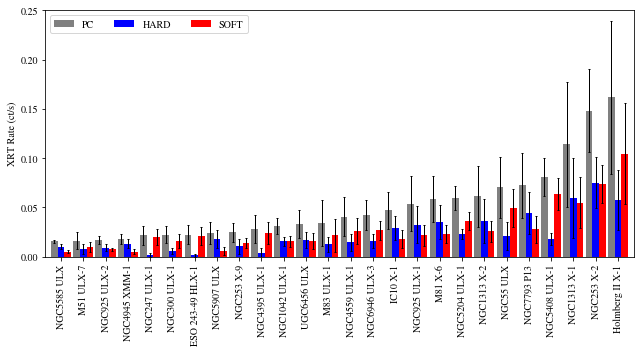

In [21]:
curve_colors = {'HARD' : 'blue',
                'SOFT' : 'red',
                'PC'   : 'grey'}
fig, ax = plt.subplots(1,1, figsize=(9,5))
df_rates_dim.plot.bar(ax=ax, yerr=df_rates_err_dim, color=curve_colors, width=0.9, rot=90, error_kw=dict(lw=1, capsize=1, capthick=1))
ax.set_ylim(0, 0.25)
ax.legend(loc='upper left', ncol=7)
ax.set_xlabel('')

ax.set_ylabel('XRT Rate (ct/s)')
plt.tight_layout()
plt.savefig('../figures/XRT_rates.png')
plt.savefig('../figures/XRT_rates.pdf')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


IndexError: list index out of range

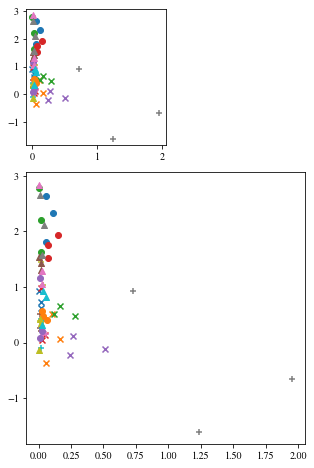

In [14]:
x = 'mean'
y = 'skew'
fig, ax = plt.subplots(figsize=(5,5))
axins = ax.inset_axes([0, 1.1, 0.5, 0.5])

markers = ['x']*5 + ['+']*5 + ['o']*5 + ['^']*5

for i, name in enumerate(np.unique(df['readable_name'])):
    sub = df[df['readable_name'] == name]
    print(i)
    ax.scatter(sub[x], sub[y], label=name, marker=markers[i])
    axins.scatter(sub[x], sub[y], marker=markers[i])
ax.legend(loc='upper right', bbox_to_anchor =[1.5,1,0,0])
ax.set_xlabel(x)
ax.set_ylabel(y)



x1, x2, y1, y2 = -0.1, 0.5, -0.5, 3.0


axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
ax.indicate_inset_zoom(axins, edgecolor="black")

In [ ]:
x = 'mean'
y = 'F_var'
fig, ax = plt.subplots(figsize=(5,5))
axins = ax.inset_axes([0, 1.1, 0.5, 0.5])

markers = ['x']*5 + ['+']*5 + ['o']*5 + ['^']*5

for i, name in enumerate(np.unique(df['readable_name'])):
    sub = df[df['readable_name'] == name]
    print(i)
    ax.scatter(sub[x], sub[y], label=name, marker=markers[i])
    axins.scatter(sub[x], sub[y], marker=markers[i])
ax.legend(loc='upper right', bbox_to_anchor =[1.5,1,0,0])
ax.set_xlabel(x)
ax.set_ylabel(y)



x1, x2, y1, y2 = -0.1, 0.5, -0.1, 1.0


axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
ax.indicate_inset_zoom(axins, edgecolor="black")

In [ ]:
x = 'mean'
y = 'F_var'
fig, ax = plt.subplots(figsize=(5,5))
axins = ax.inset_axes([0, 1.1, 0.5, 0.5])

markers = ['x']*5 + ['+']*5 + ['o']*5 + ['^']*5

for i, name in enumerate(np.unique(df['readable_name'])):
    sub = df[df['readable_name'] == name]
    print(i)
    ax.scatter(sub[x], sub[y], label=name, marker=markers[i])
    axins.scatter(sub[x], sub[y], marker=markers[i])
ax.legend(loc='upper right', bbox_to_anchor =[1.5,1,0,0])
ax.set_xlabel(x)
ax.set_ylabel(y)



x1, x2, y1, y2 = -0.1, 0.5, -0.1, 1.0


axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
ax.indicate_inset_zoom(axins, edgecolor="black")

In [ ]:
x = 'von_neumann'
y = 'skew'
fig, ax = plt.subplots(figsize=(5,5))
axins = ax.inset_axes([0, 1.1, 0.5, 0.5])

markers = ['x']*5 + ['+']*5 + ['o']*5 + ['^']*5

for i, name in enumerate(np.unique(df['readable_name'])):
    sub = df[df['readable_name'] == name]
    print(i)
    ax.scatter(sub[x], sub[y], label=name, marker=markers[i])
    axins.scatter(sub[x], sub[y], marker=markers[i])
ax.legend(loc='upper right', bbox_to_anchor =[1.5,1,0,0])
ax.set_xlabel(x)
ax.set_ylabel(y)



x1, x2, y1, y2 = 0.25, 2.75, -2, 2


axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
ax.indicate_inset_zoom(axins, edgecolor="black")

In [ ]:
df.columns

In [ ]:
x = 'ndata'
y = 't_diff_mean'
fig, ax = plt.subplots(figsize=(5,5))

markers = ['x']*5 + ['+']*5 + ['o']*5 + ['^']*5

for i, name in enumerate(np.unique(df['readable_name'])):
    sub = df[df['readable_name'] == name]
    print(i)
    ax.scatter(sub[x], sub[y], label=name, marker=markers[i])
ax.legend(loc='upper right', bbox_to_anchor =[1.5,1,0,0])
ax.set_xlabel(x)
ax.set_ylabel(y)



x1, x2, y1, y2 = -0.1, 0.5, -0.1, 1.0
